In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import pearsonr as pcor
from scipy.stats import fisher_exact
import statsmodels.api as sm
from statsmodels.formula.api import ols

Size of gene sets.

In [3]:
gene_set_sizes=None
for dname in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

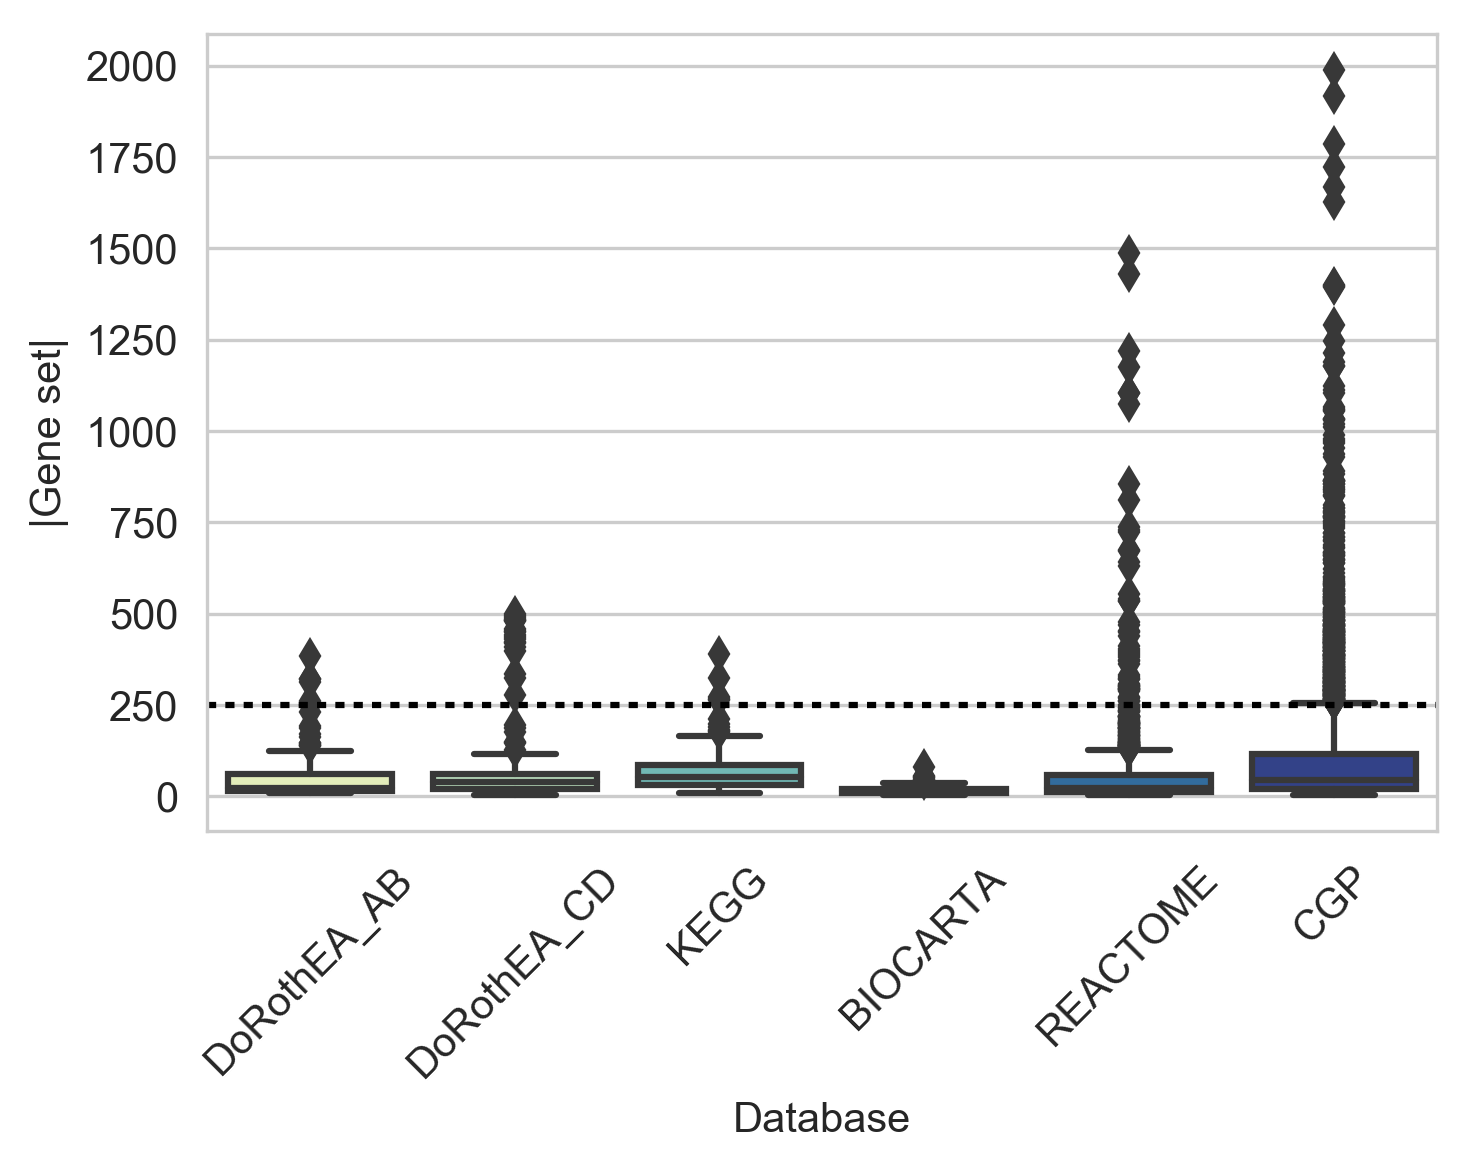

In [4]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(range(6),['DoRothEA_AB','DoRothEA_CD','KEGG','BIOCARTA','REACTOME','CGP'],rotation=45)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1.pdf')

Gene set similarity

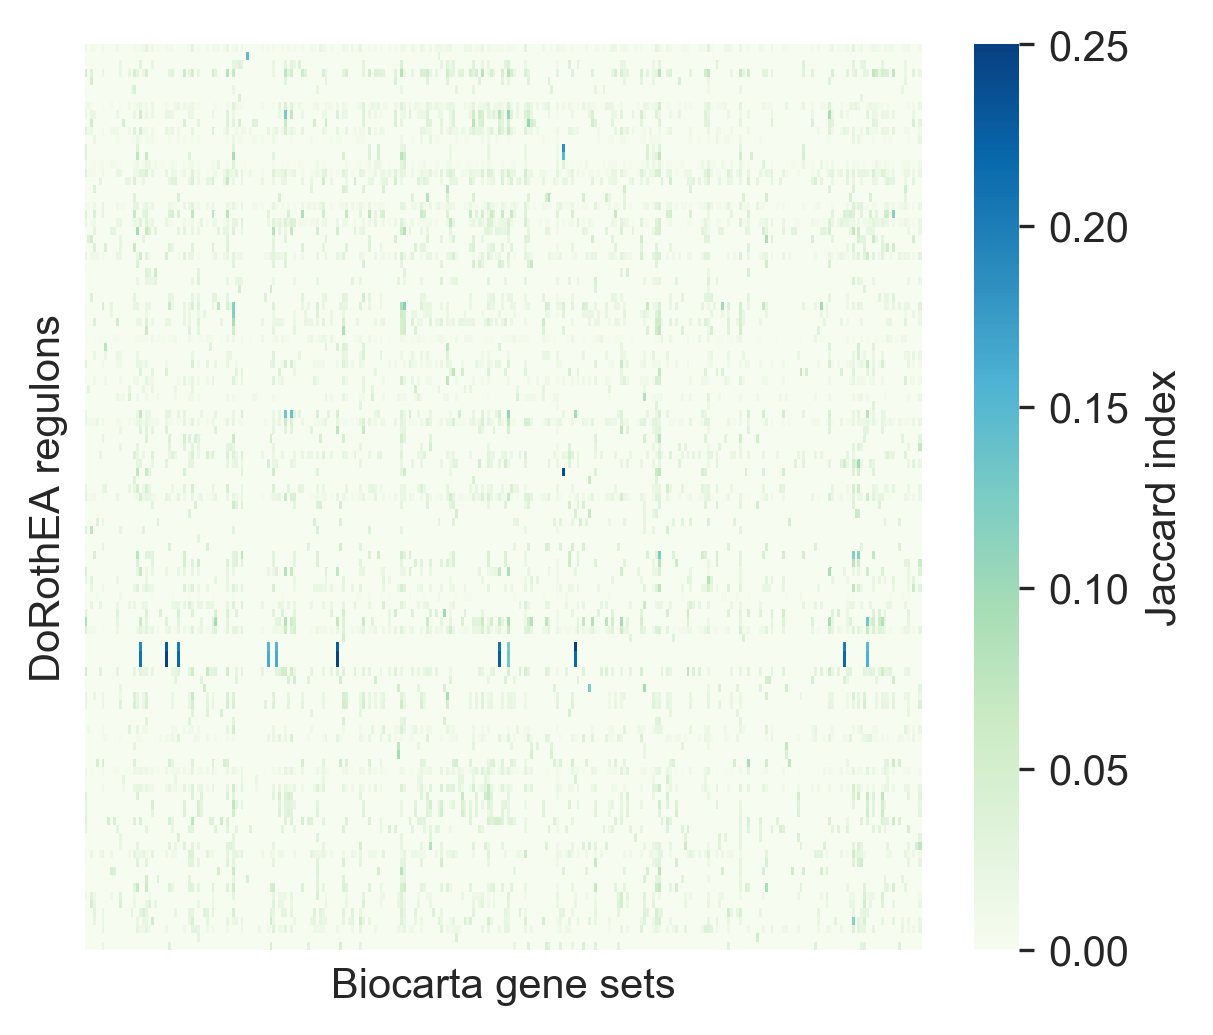

In [5]:
data=pd.read_csv('../results/similarity/BEST_dorothea_AB_filtered_BIOCARTA_filtered_jaccard.csv',
                 sep=',',header=0,index_col=0)
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='GnBu',cbar_kws={'label': 'Jaccard index'})
plt.xticks([])
plt.yticks([])
plt.xlabel('Biocarta gene sets')
plt.ylabel('DoRothEA regulons')
plt.savefig('../figures/raw/Fig2A.pdf')

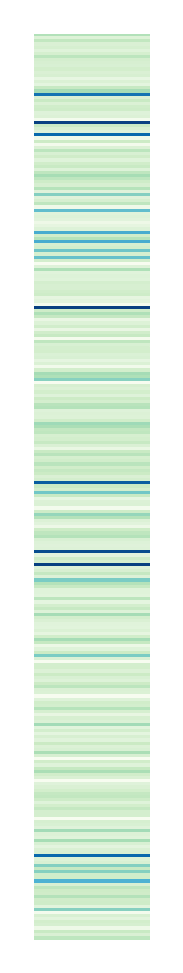

In [6]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai1.pdf')

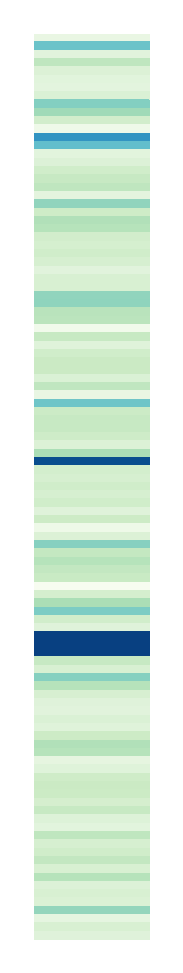

In [7]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(1)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai2.pdf')

Gene set similarity distribution

In [48]:
dname1='BEST_dorothea_CD'
metric='jaccard'

In [69]:
def make_similarity_distribution(fname,dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=False):
    similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
    for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
        #readl
        data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim1['Database']=dname2
        max_sim1['Similarity']=data
        max_sim1['Random']='Real'
        similarities=pd.concat([similarities,max_sim1])
        #random
        data=pd.read_csv('../results/similarity/%s_filtered_%s_random_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim2['Database']=dname2
        max_sim2['Similarity']=data
        max_sim2['Random']='Random'
        similarities=pd.concat([similarities,max_sim2])

        print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    sns.set_palette('YlGnBu',2)
    plt.figure(figsize=(5,4),dpi=300)
    sns.boxplot(x='Database',y='Similarity',hue='Random',data=similarities,)
    if metric=='jaccard':
        plt.ylabel('Jaccard index')
    else:
        plt.ylabel('Overlap coefficient')
    if force_ylim:
        plt.ylim(0,1.0)
    plt.tight_layout()
    plt.savefig('../figures/raw/'+fname)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


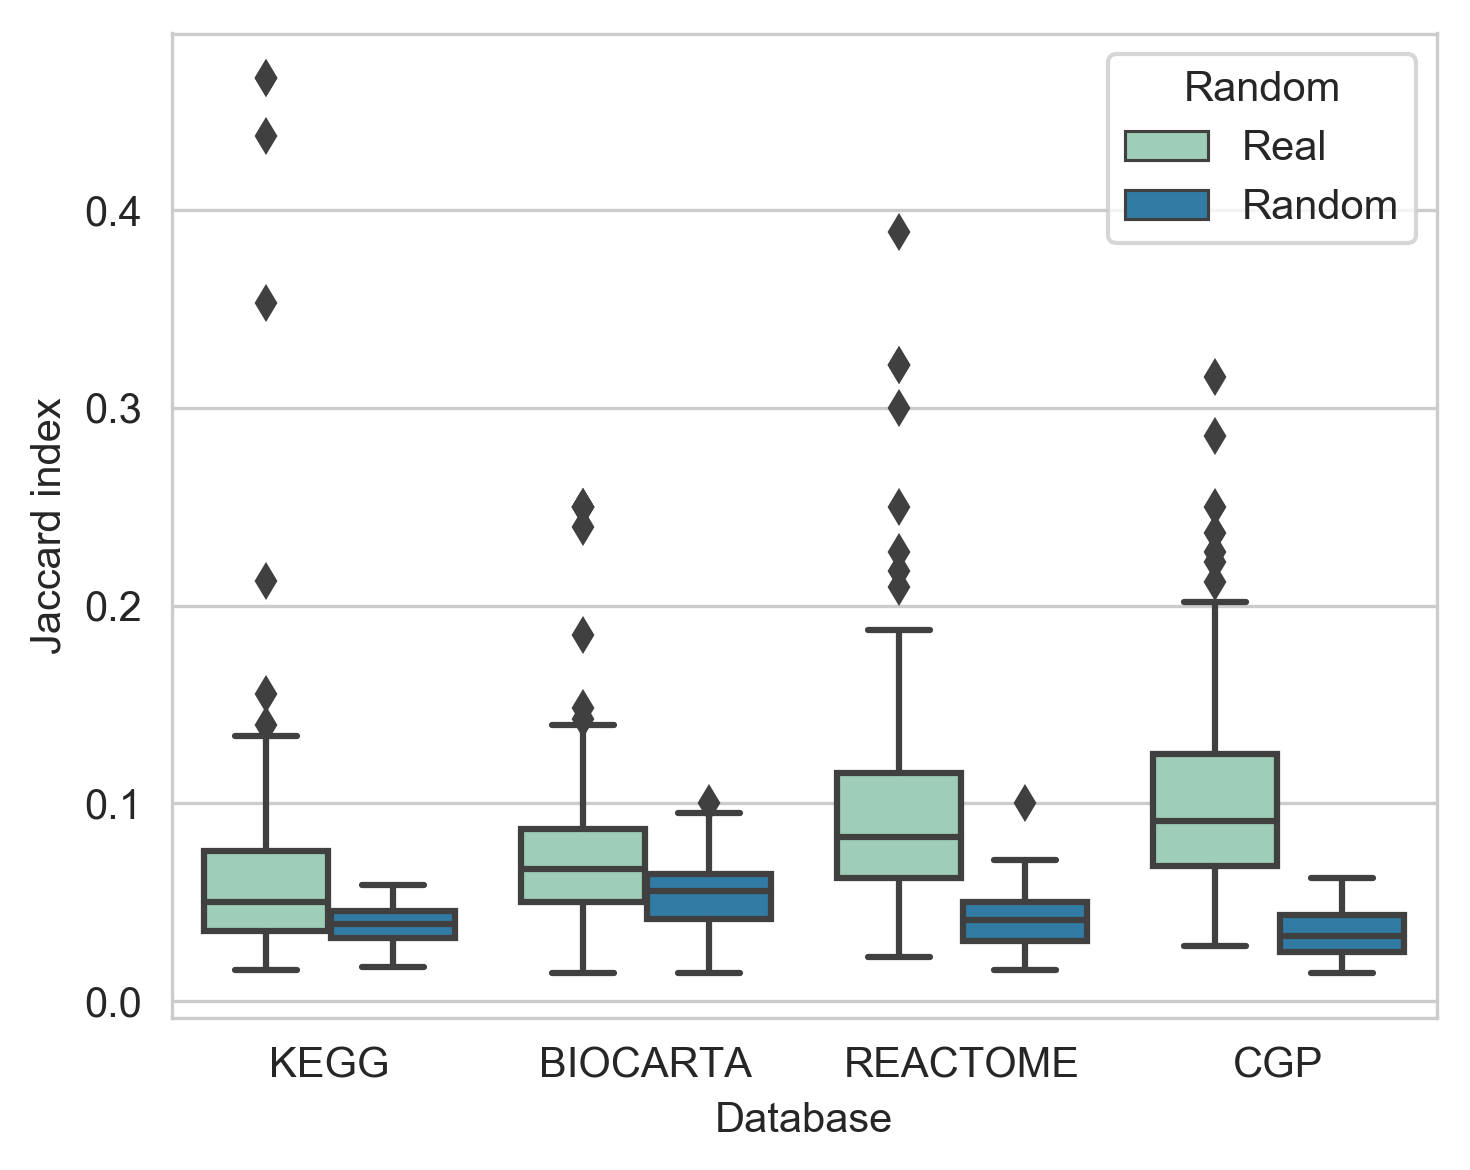

In [70]:
make_similarity_distribution('Fig2B.pdf')

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


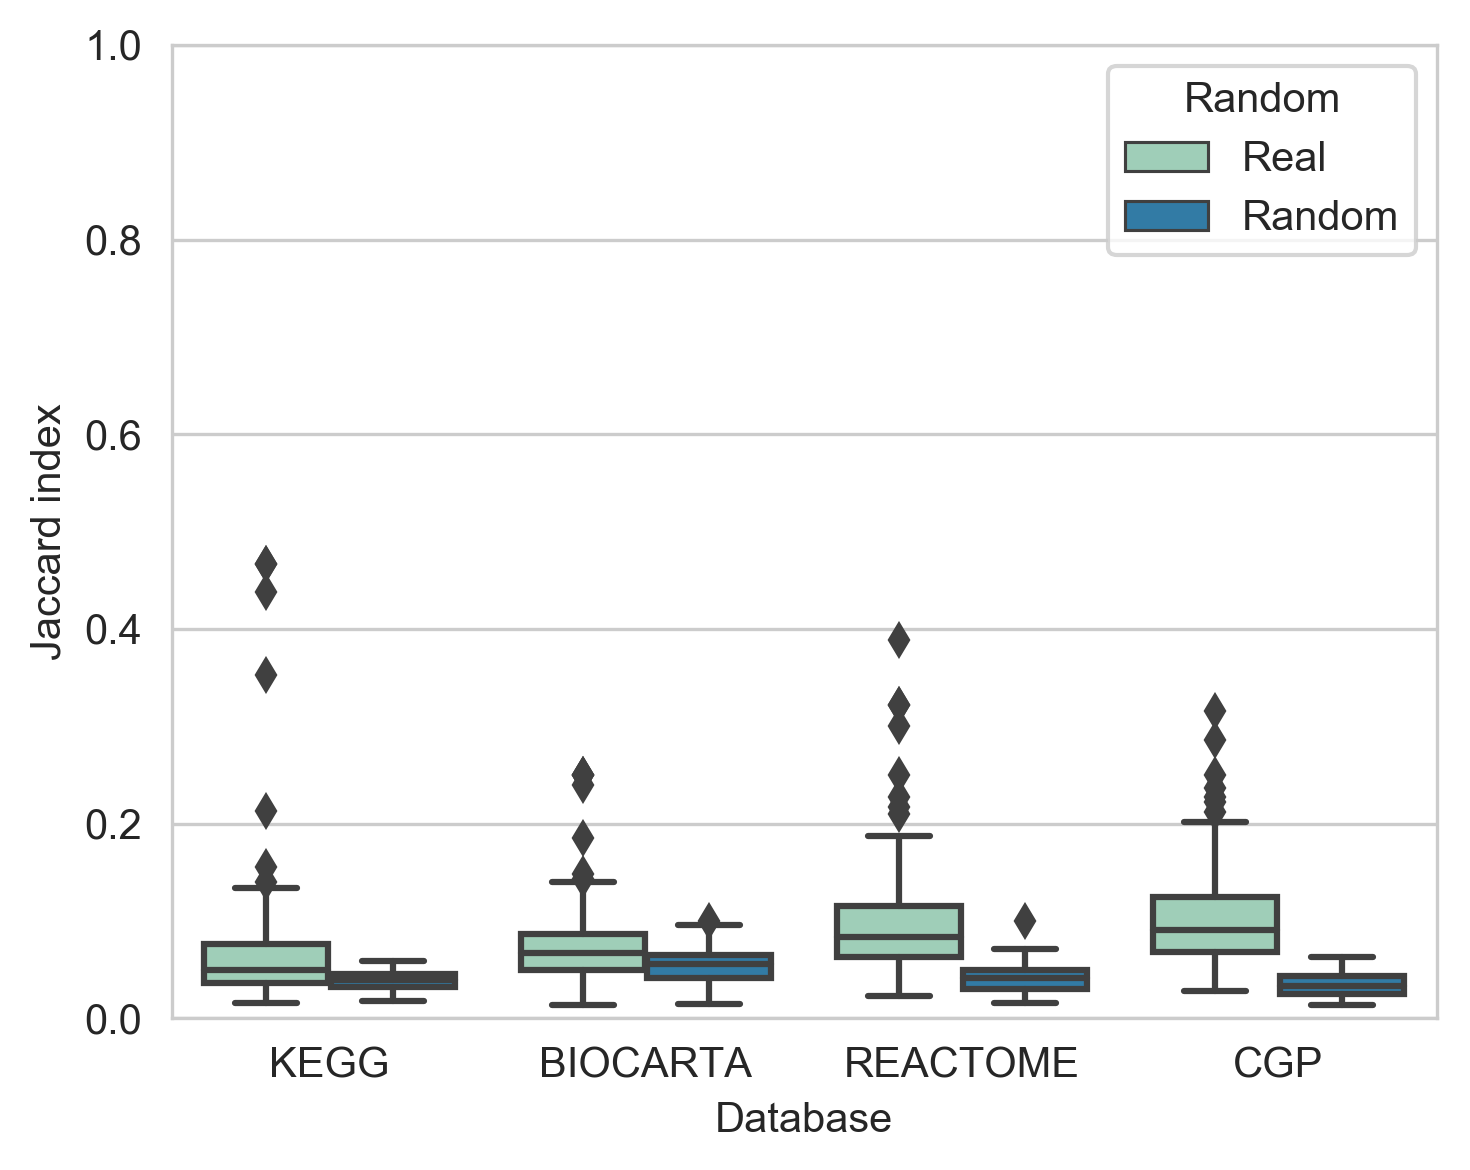

In [71]:
make_similarity_distribution('SFig2A.pdf',dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=True)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3220.0, pvalue=2.5218968221402894e-09)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=4997.0, pvalue=0.020534276748425517)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=855.5, pvalue=1.120069377082686e-28)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=261.5, pvalue=1.315089708967561e-34)


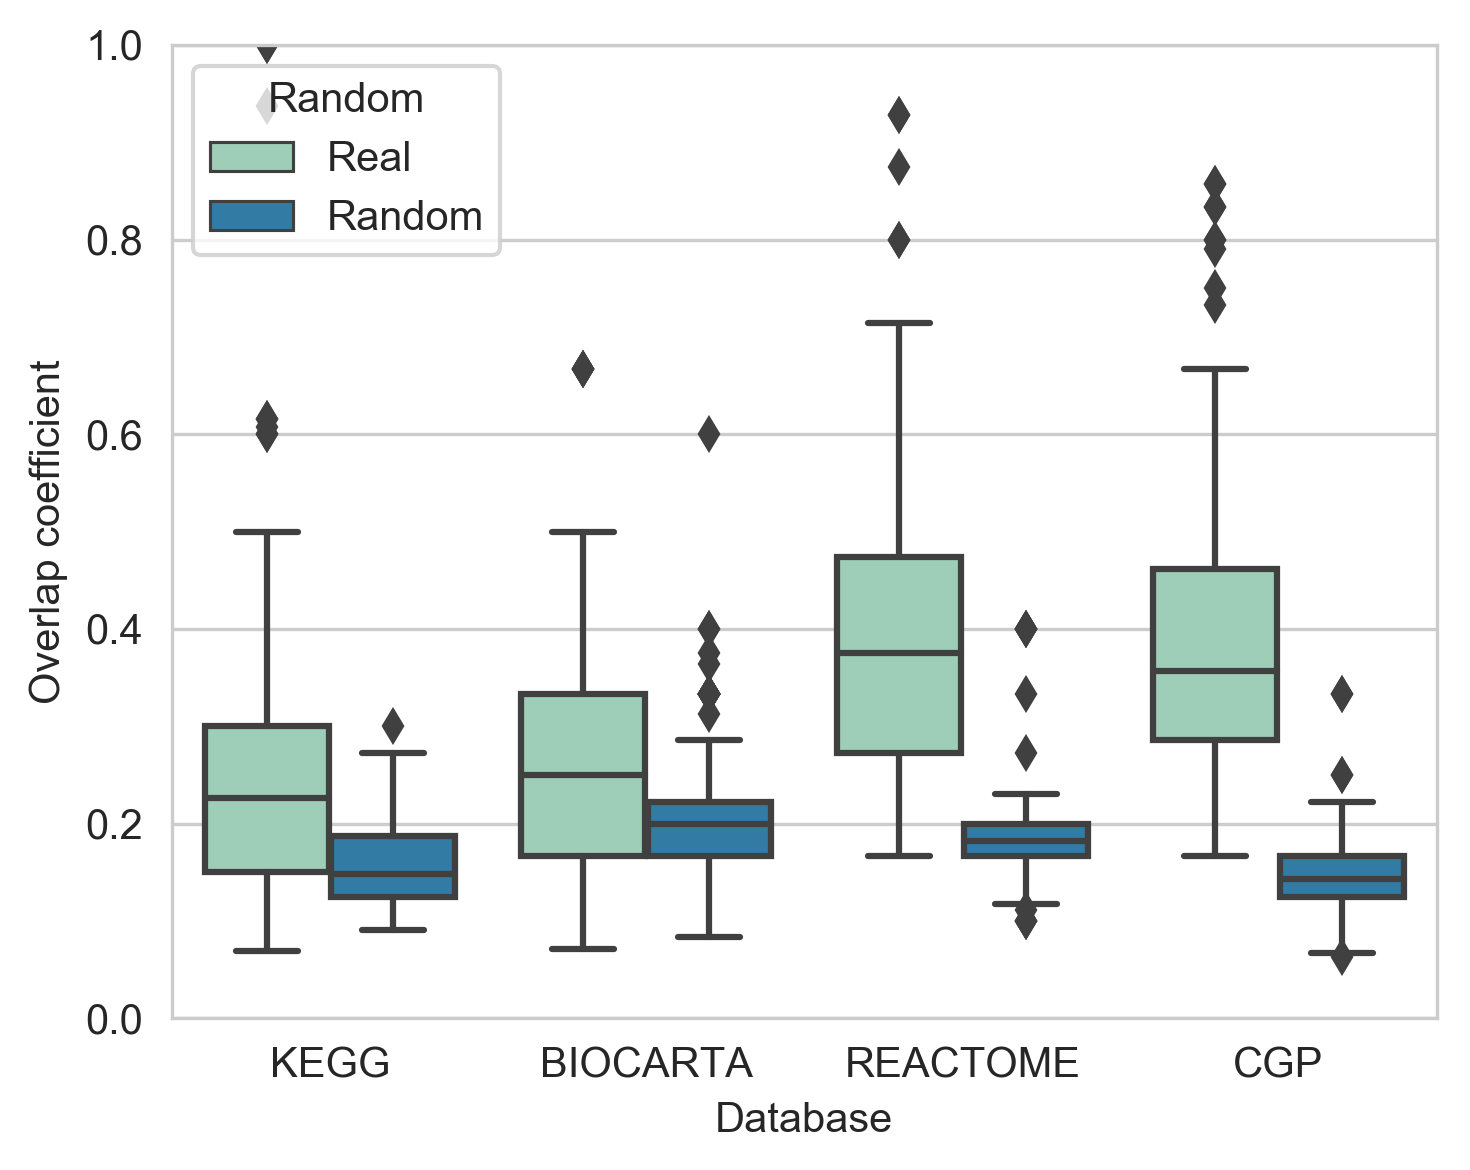

In [72]:
make_similarity_distribution('SFig2B.pdf',dname1='BEST_dorothea_AB',metric='overlap',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=26066.0, pvalue=0.001059444645452985)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=29125.5, pvalue=0.1214983383094177)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=19920.5, pvalue=2.5818771707499164e-12)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9899.0, pvalue=9.348774978947948e-40)


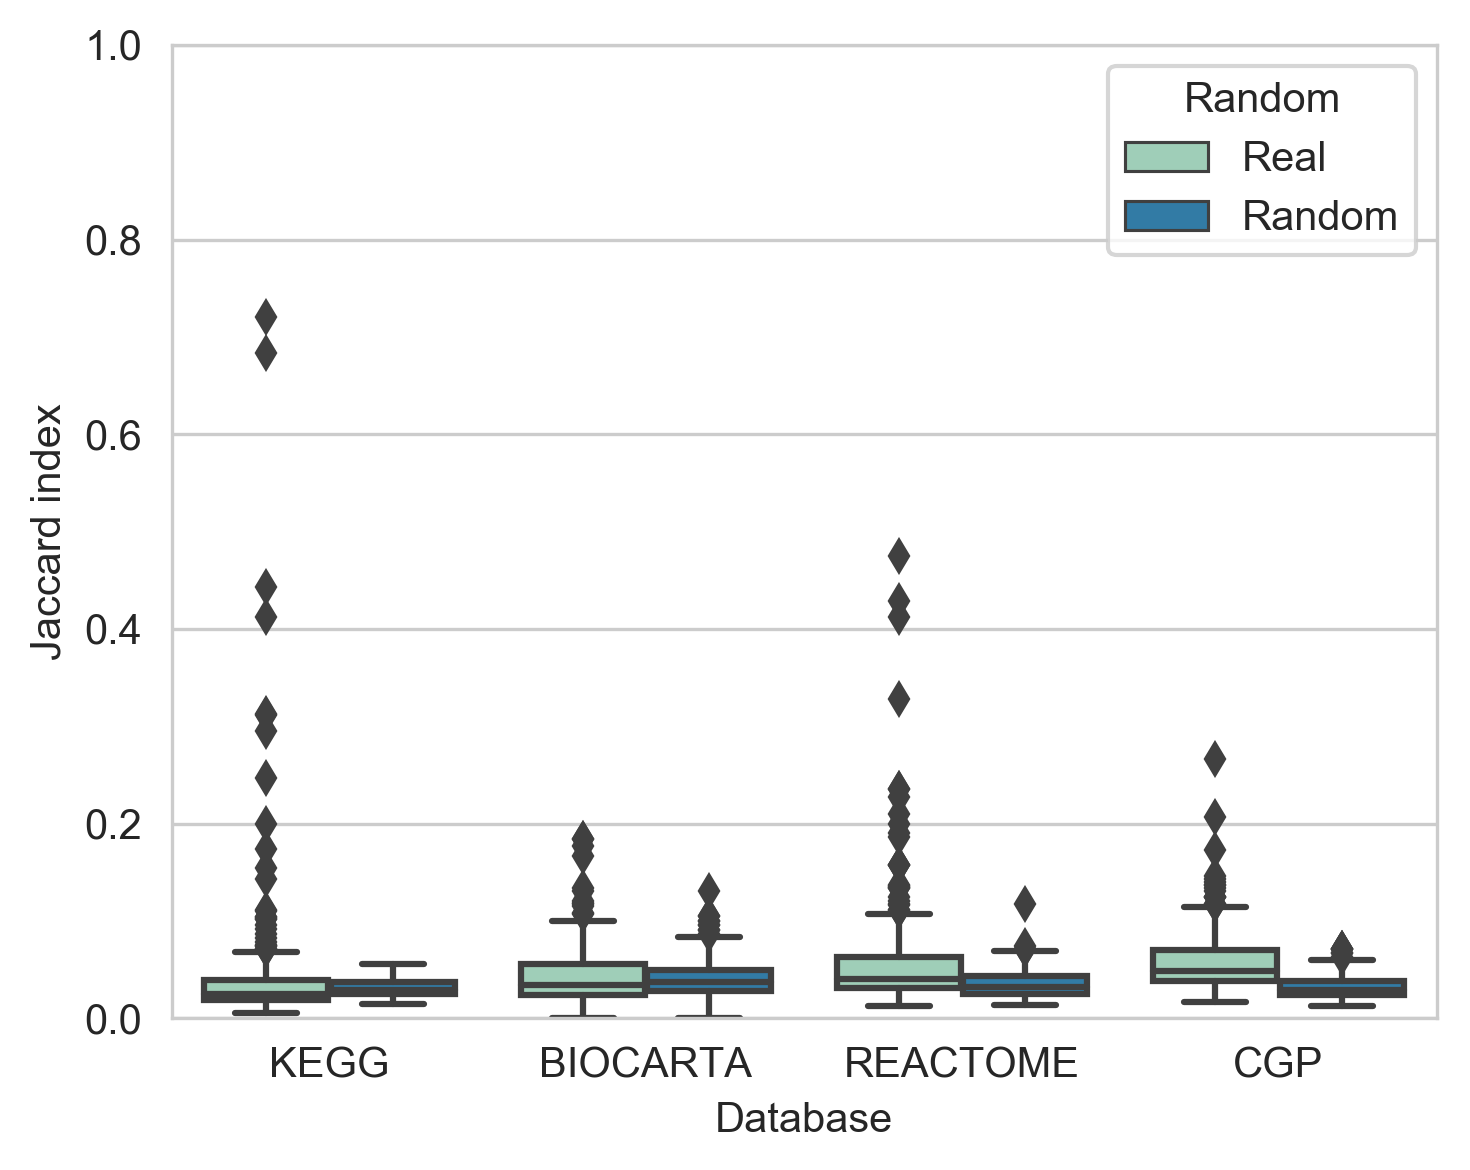

In [73]:
make_similarity_distribution('SFig2C.pdf',dname1='BEST_dorothea_CD',metric='jaccard',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=25948.0, pvalue=0.0008091049757990906)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=28088.5, pvalue=0.03289285384830791)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=16050.0, pvalue=2.331663257730446e-23)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9247.5, pvalue=5.14375156094892e-43)


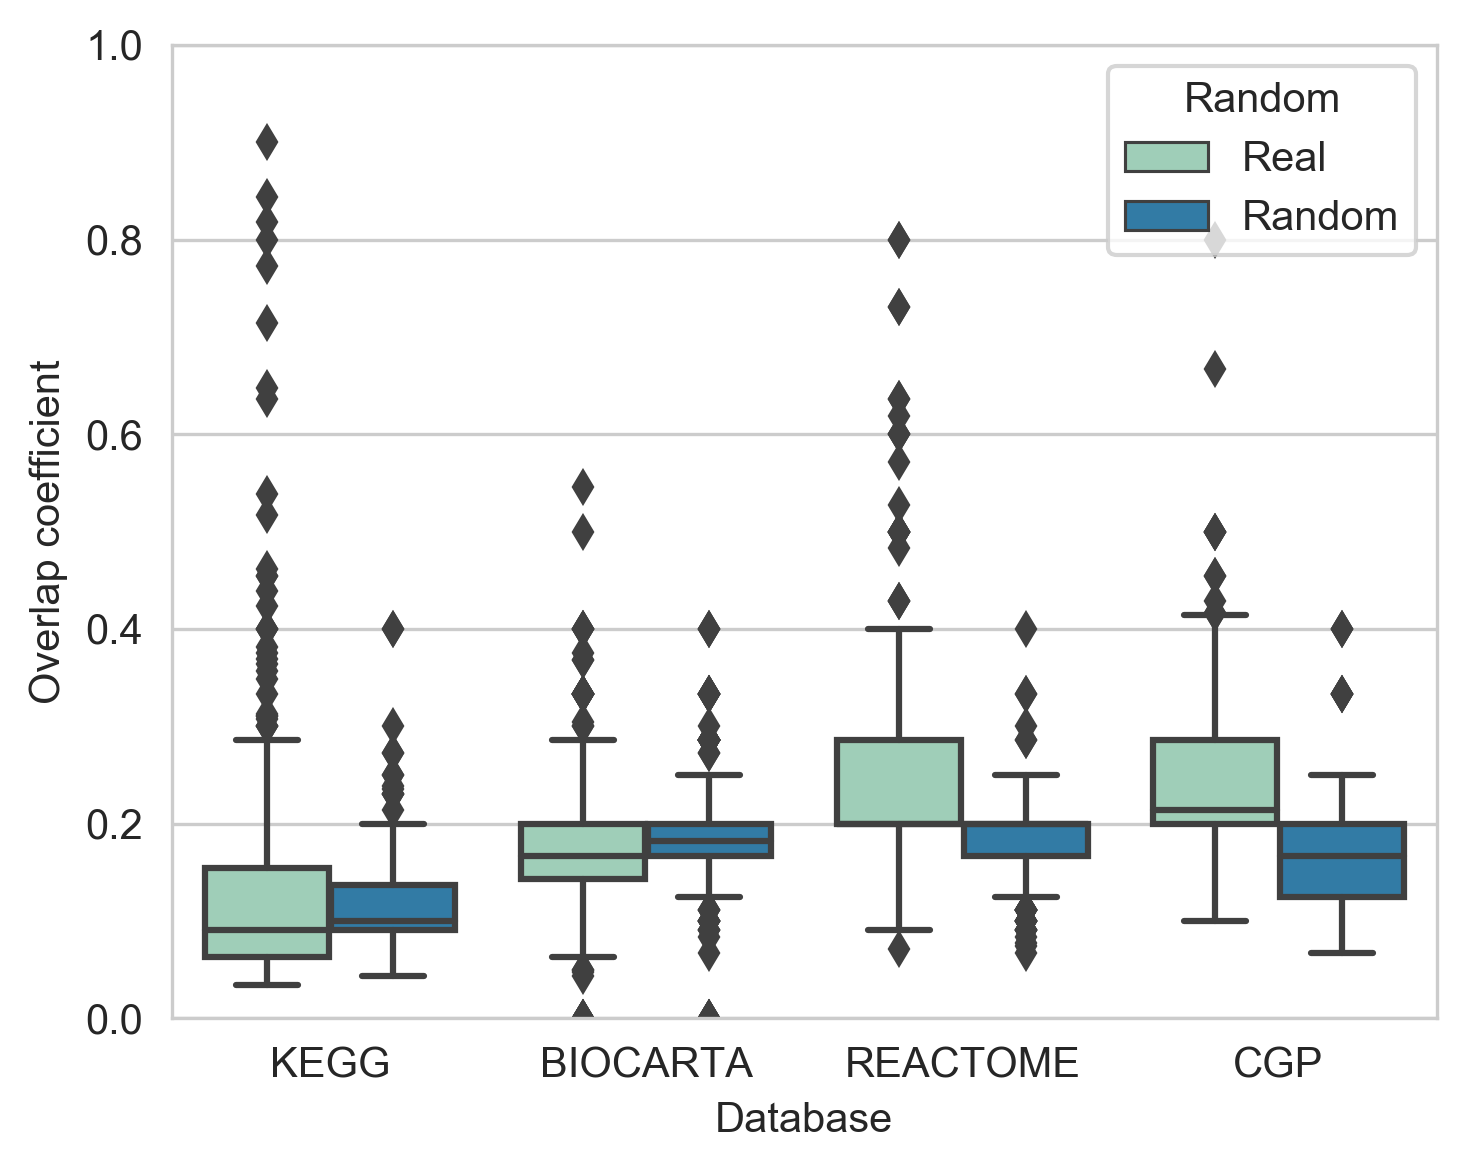

In [74]:
make_similarity_distribution('SFig2D.pdf',dname1='BEST_dorothea_CD',metric='overlap',force_ylim=True)

Shortest path distance

In [77]:
DM=pd.read_csv('../data/omnipath/DM_GC.csv',sep=',',header=0,index_col=0)
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

In [80]:
degree=(AM.sum()-1).astype(int)
degree_dict={}
for i in range(1,degree.max()+1):
    fil=degree==i
    degree_dict[i]=degree.index[fil]

In [118]:
def make_distance_distribution(fname,set_name='BEST_DoRothEA_AB',lab_name='DoRothEA'):
    gene_sets=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % set_name,
                          sep=',',header=0,index_col=0)
    #overlap with DM
    fil=np.in1d(gene_sets['Gene'],DM.index)
    gene_sets=gene_sets[fil]
    distances=[]
    bg=[]
    for gene_set in gene_sets['Set'].unique():
        fil=gene_sets['Set']==gene_set
        genes=gene_sets[fil]['Gene'].unique()
        if len(genes)>1:
            distances+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
            degree_counts=degree[genes].value_counts()
            genes=[]
            for d in degree_counts.index:
                genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
            bg+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('YlGnBu',3)
    plt.hist([DM.values[np.triu_indices_from(DM,1)],bg,distances],normed=True)
    plt.xlabel('Shortest path distance')
    plt.ylabel('Density')
    plt.xlim(1,10)
    plt.legend(['all distances','degree matched background',lab_name+ ' distances'])
    plt.savefig('../figures/raw/'+fname)
    print('p value vs. all distances:',mwu(DM.values[np.triu_indices_from(DM,1)],distances))
    print('p value vs. bg distances:',mwu(bg,distances))

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9534279550.5, pvalue=0.0)


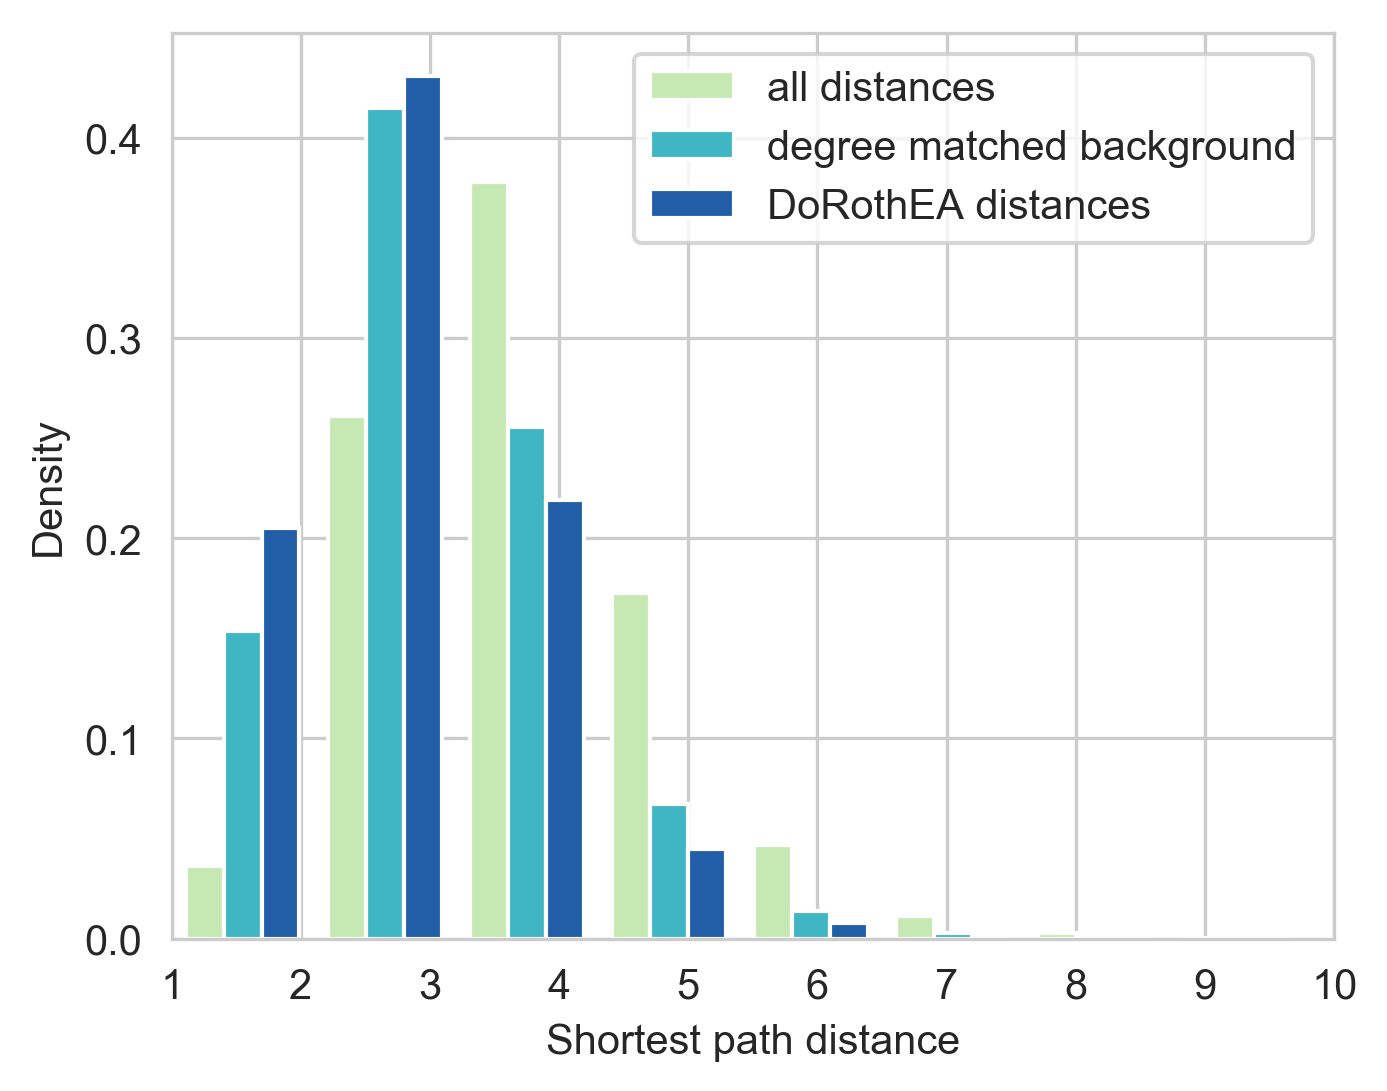

In [119]:
make_distance_distribution('Fig2C.pdf')

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9621477243.5, pvalue=0.0)


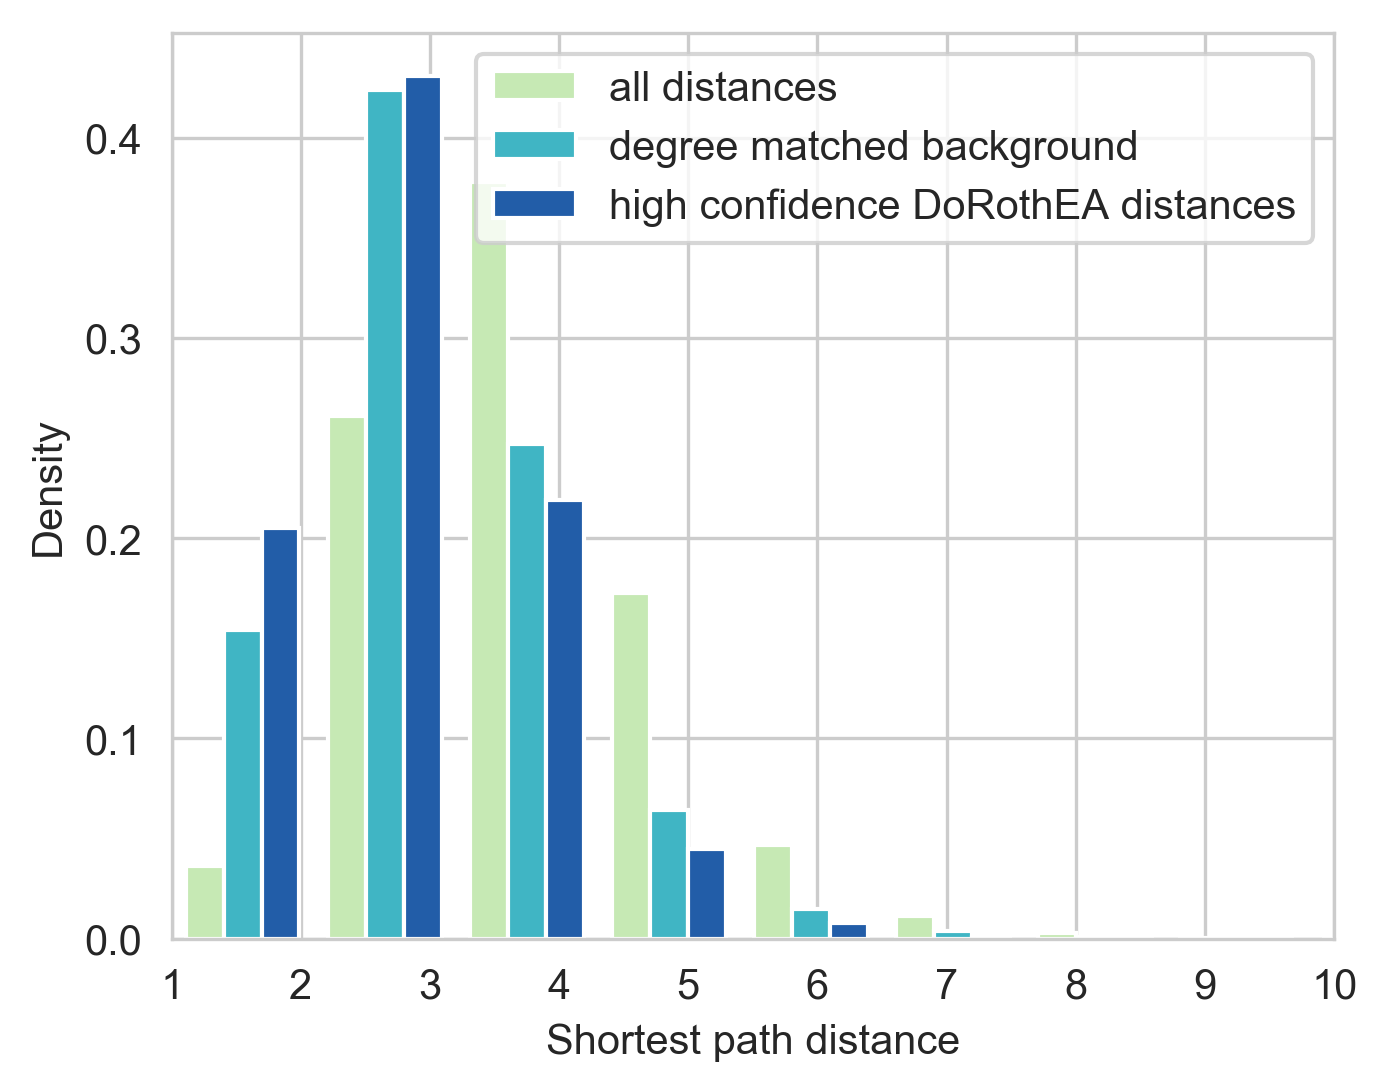

In [122]:
make_distance_distribution('SFig3A.pdf',set_name='BEST_DoRothEA_AB',lab_name='high confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=1875202701318.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8588397534.5, pvalue=0.0)


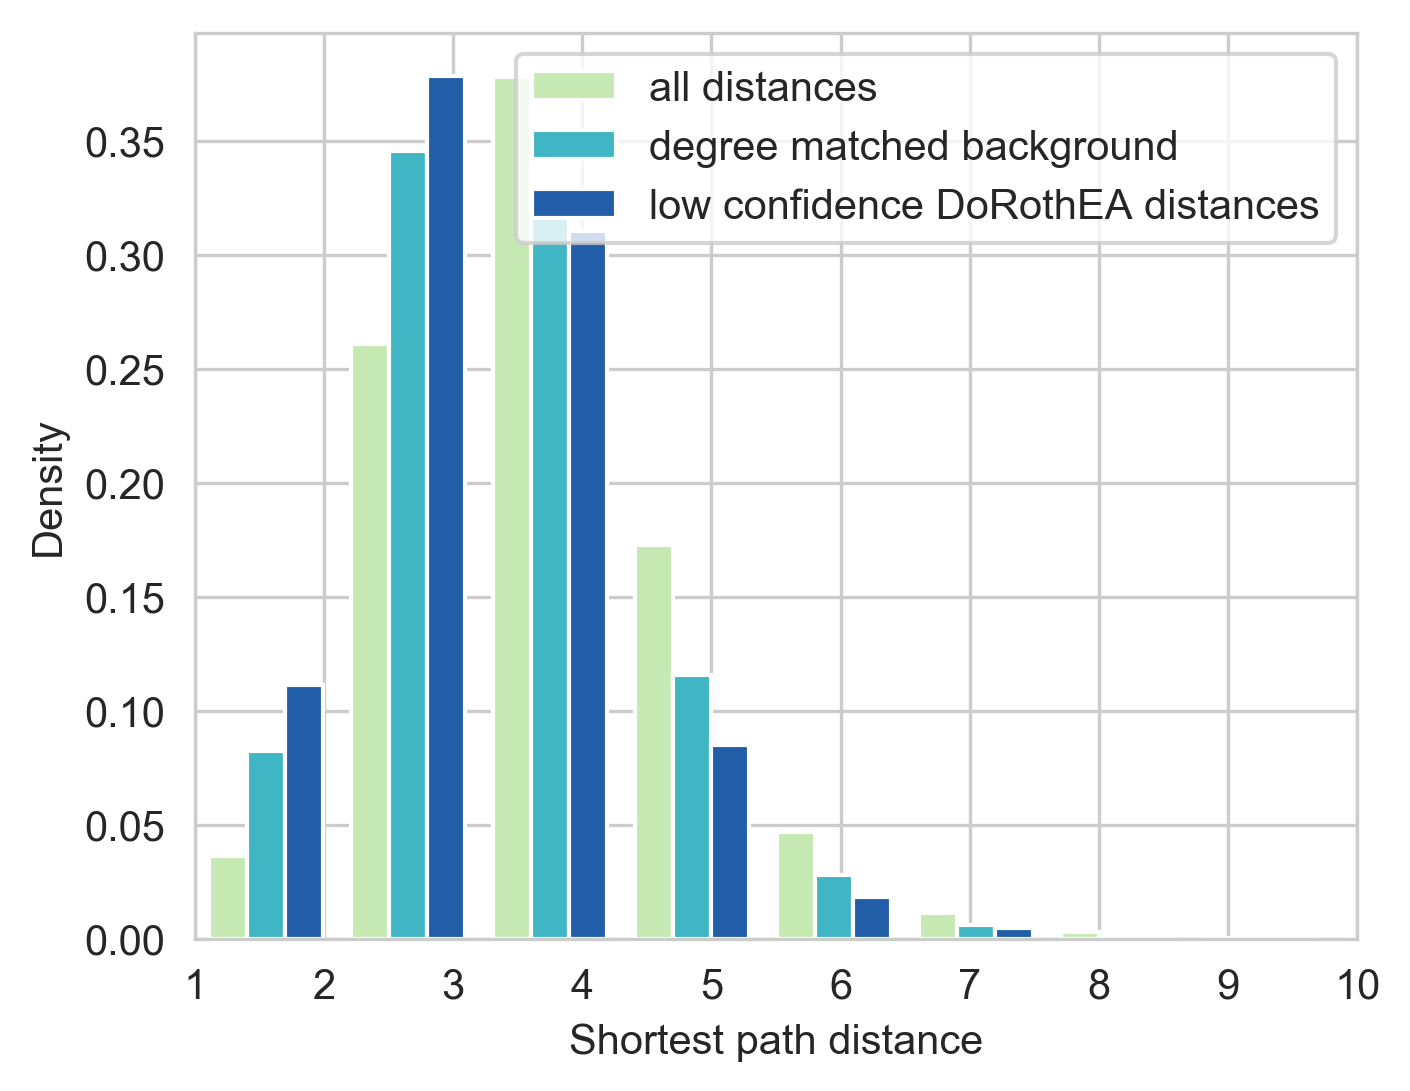

In [123]:
make_distance_distribution('SFig3B.pdf',set_name='BEST_DoRothEA_CD',lab_name='low confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=3004285610259.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=55209633449.0, pvalue=0.0)


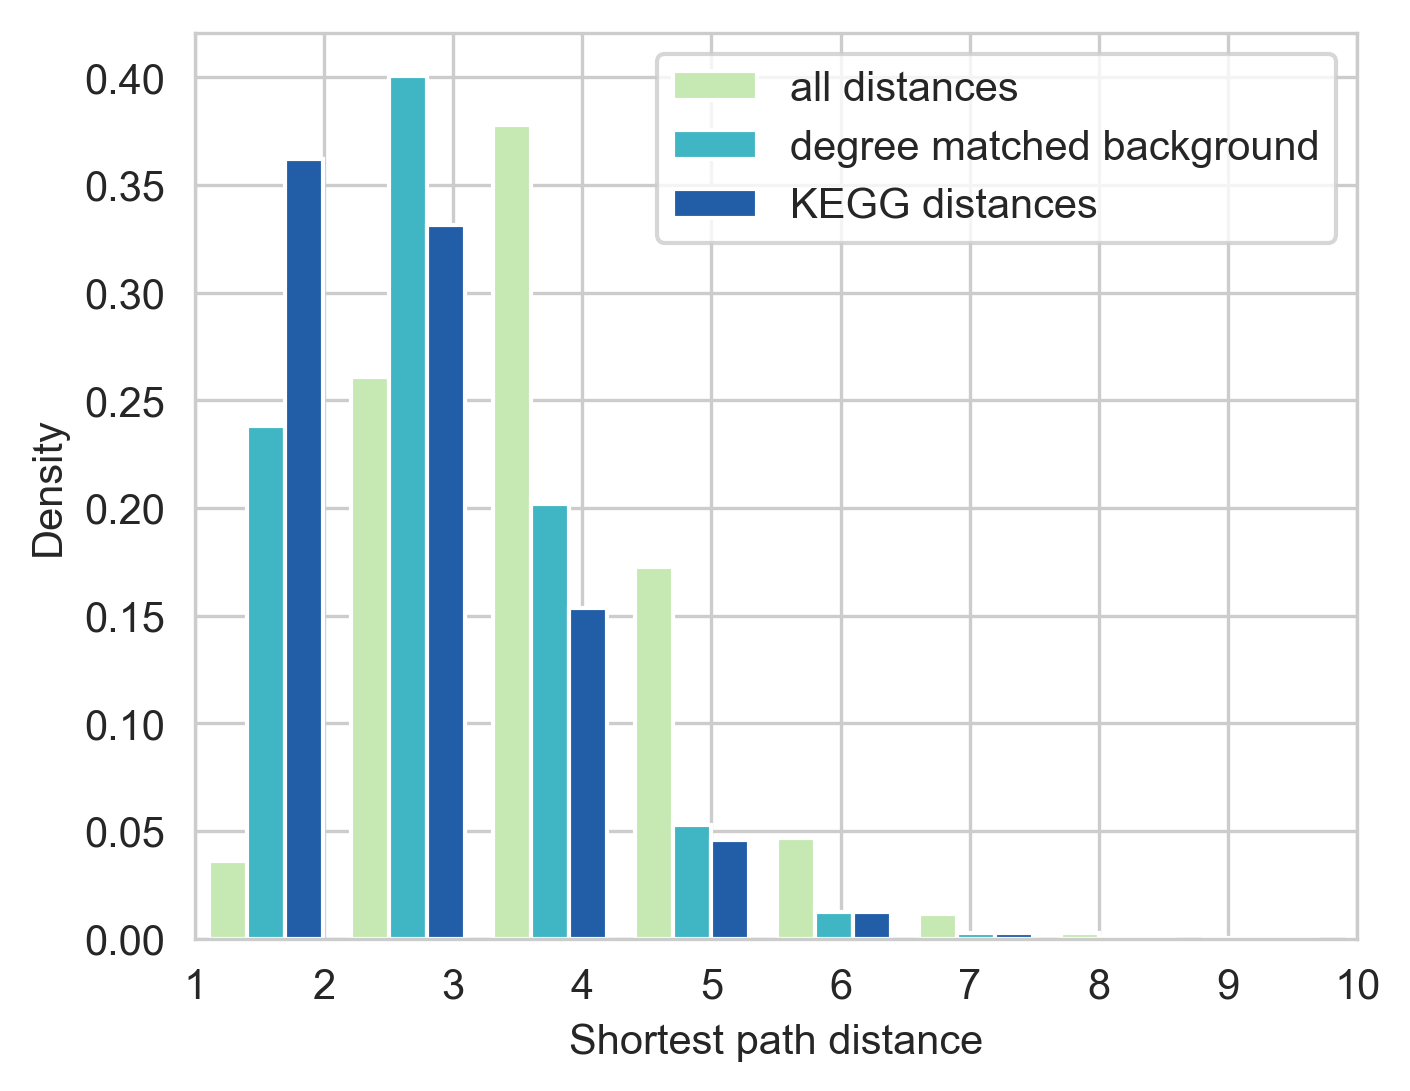

In [124]:
make_distance_distribution('SFig3C.pdf',set_name='KEGG',lab_name='KEGG')

p value vs. all distances: MannwhitneyuResult(statistic=148364150091.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=827976822.5, pvalue=0.0)


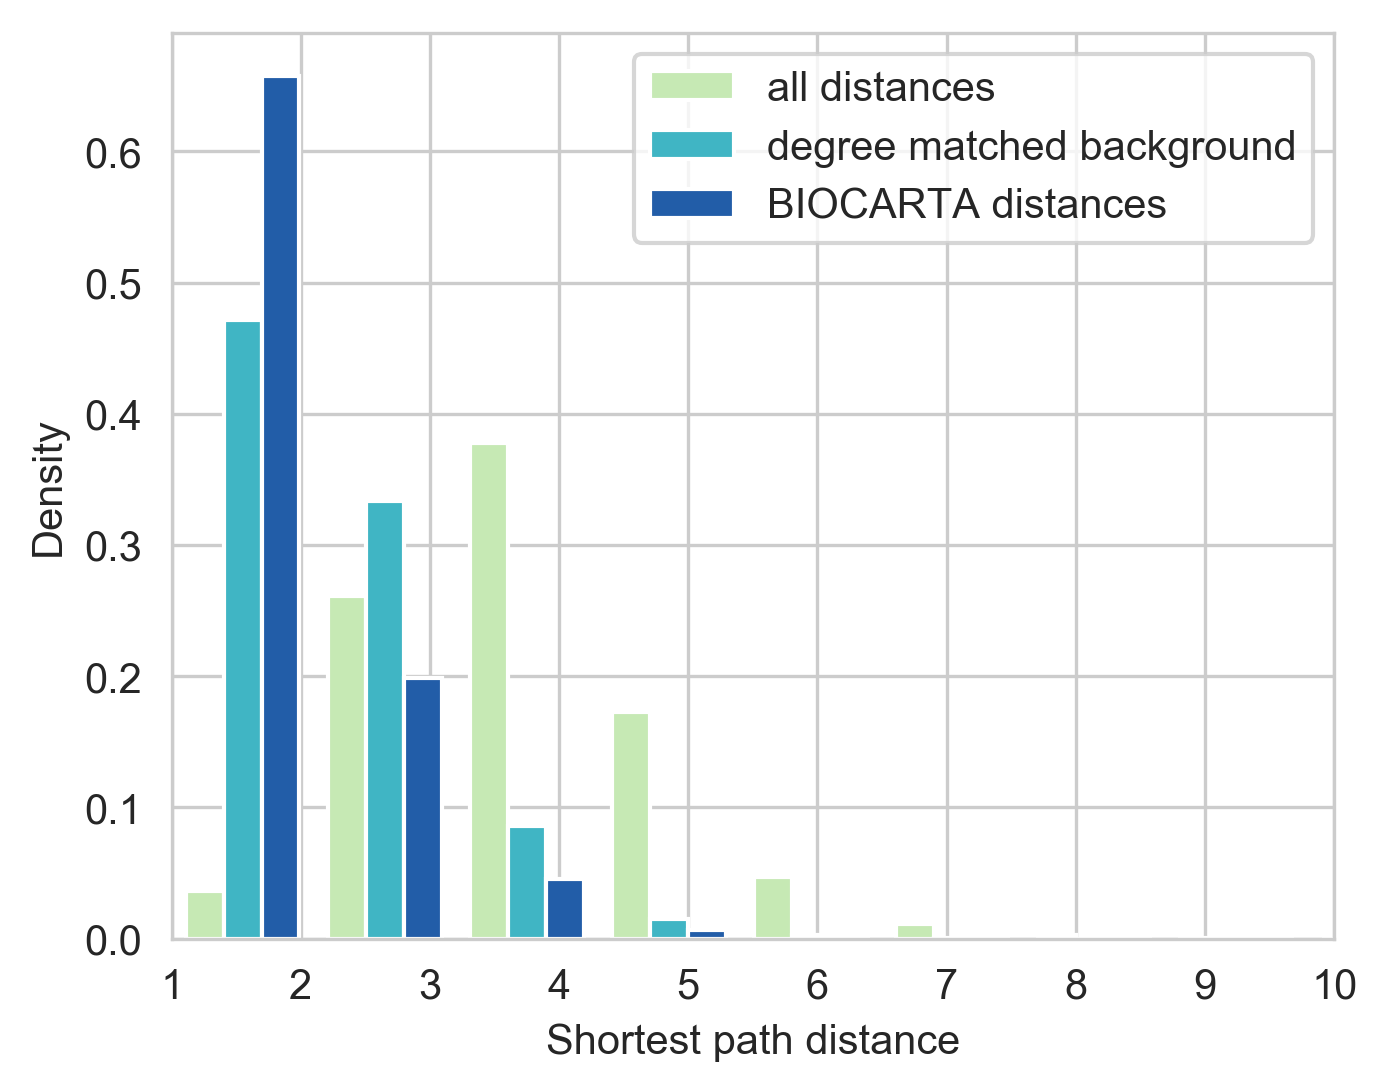

In [128]:
make_distance_distribution('SFig3D.pdf',set_name='BIOCARTA',lab_name='BIOCARTA')

p value vs. all distances: MannwhitneyuResult(statistic=12792509248376.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=790719361316.5, pvalue=0.0)


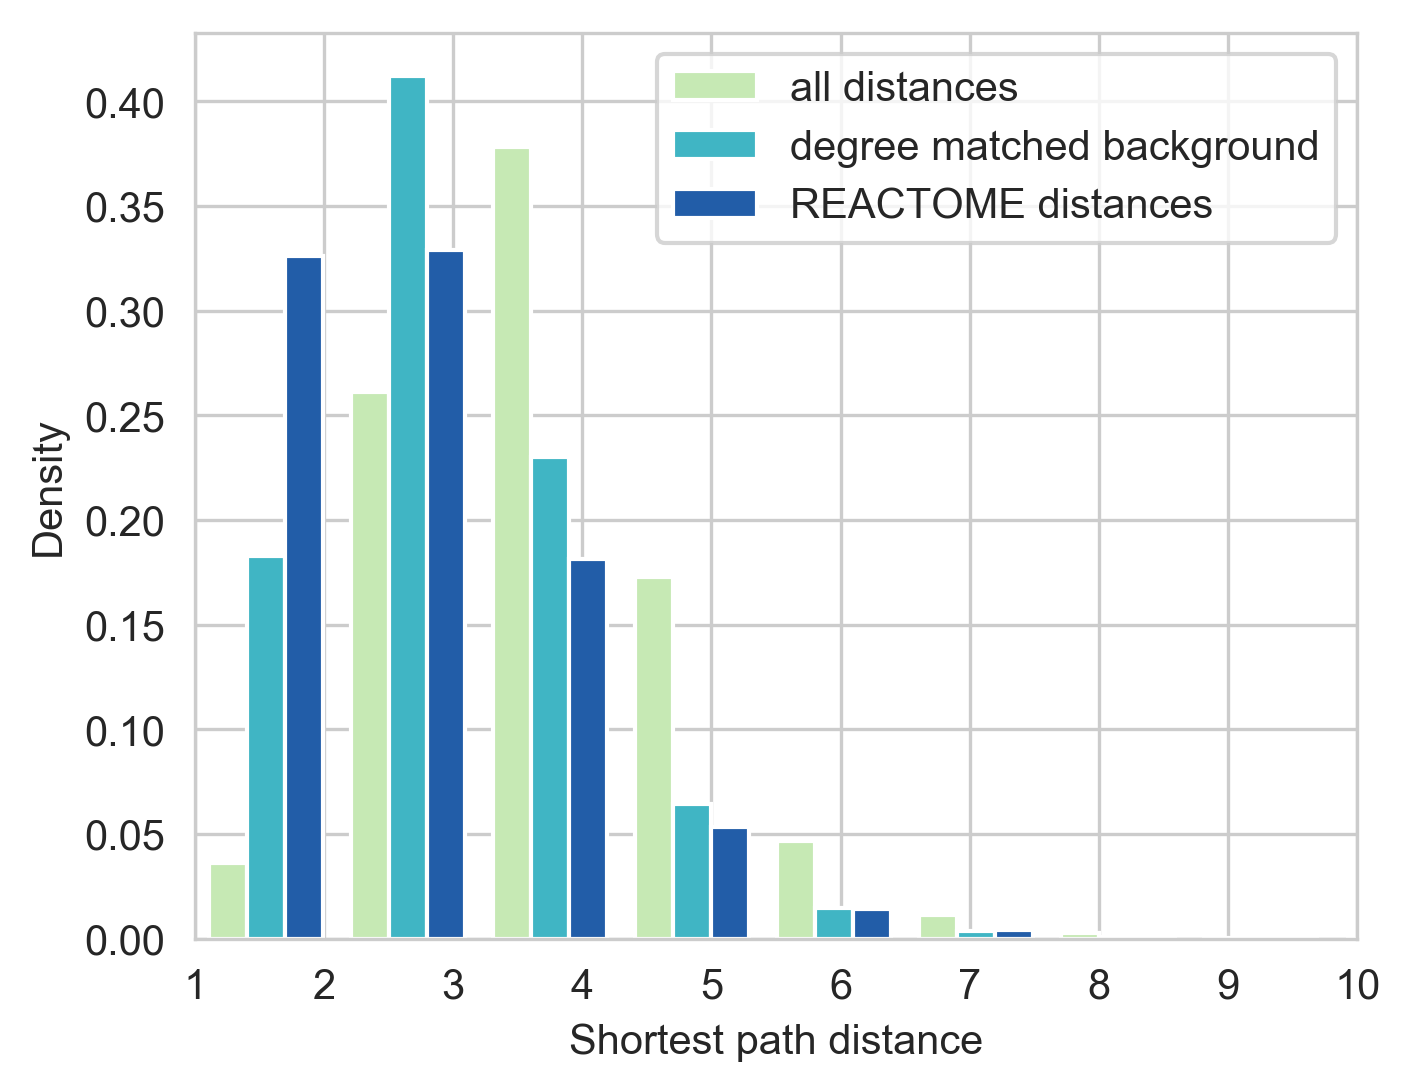

In [129]:
make_distance_distribution('SFig3E.pdf',set_name='REACTOME',lab_name='REACTOME')

p value vs. all distances: MannwhitneyuResult(statistic=62225351048753.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8544221811389.5, pvalue=0.0)


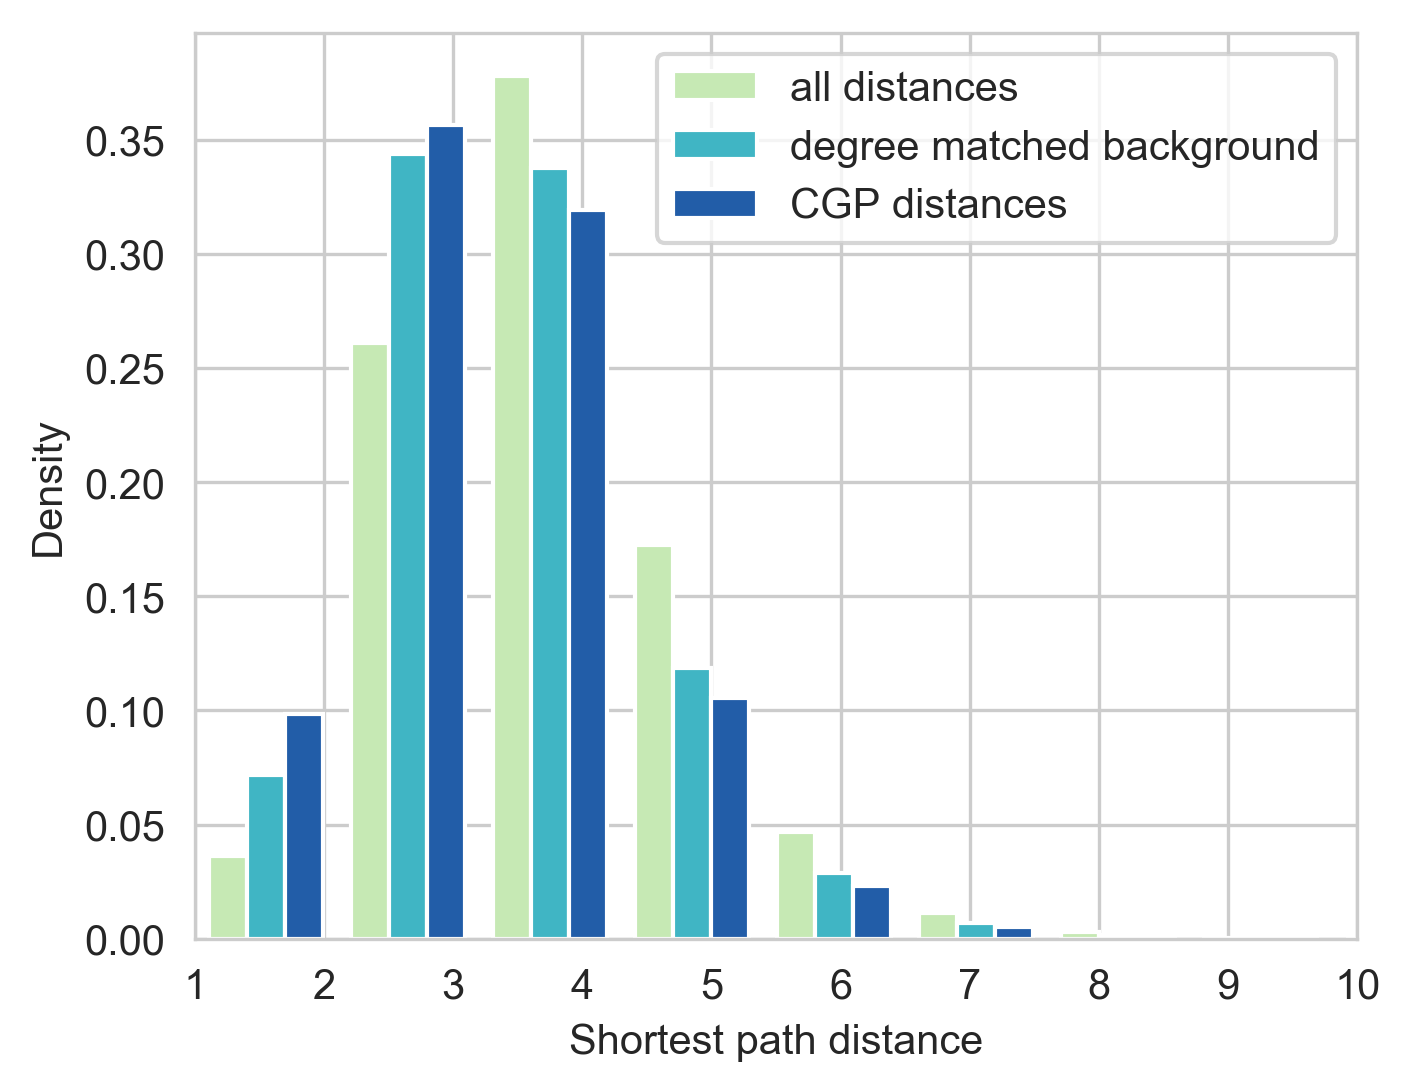

In [130]:
make_distance_distribution('SFig3F.pdf',set_name='CGP',lab_name='CGP')

Benchmark data

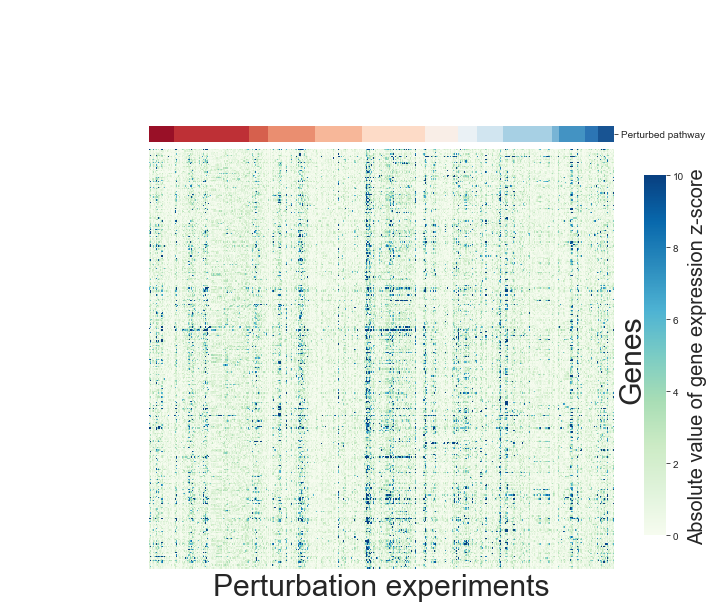

In [134]:
data=pd.read_csv('../results/benchmark/datasets/progeny_data.csv',sep=',',header=0,index_col=0).abs()
data[data<-10]=-10
data[data>10]=10
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
meta.columns=['Perturbed pathway']
col_col=dict(zip(meta['Perturbed pathway'].unique(), sns.color_palette('RdBu',14)))
g=sns.clustermap(data.iloc[:300,],cmap='GnBu',col_colors=meta['Perturbed pathway'].map(col_col),
               row_cluster=False,col_cluster=False,
               cbar_pos=(0.9, .25, .03, .5),rasterized=True)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xlabel('Perturbation experiments',size=30)
g.ax_heatmap.set_ylabel('Genes',size=30)
g.ax_cbar.set_ylabel('Absolute value of gene expression z-score',size=20)
plt.savefig('../figures/raw/Fig3A1.pdf')

In [14]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC

0.867385458682387 0.6752249457027615


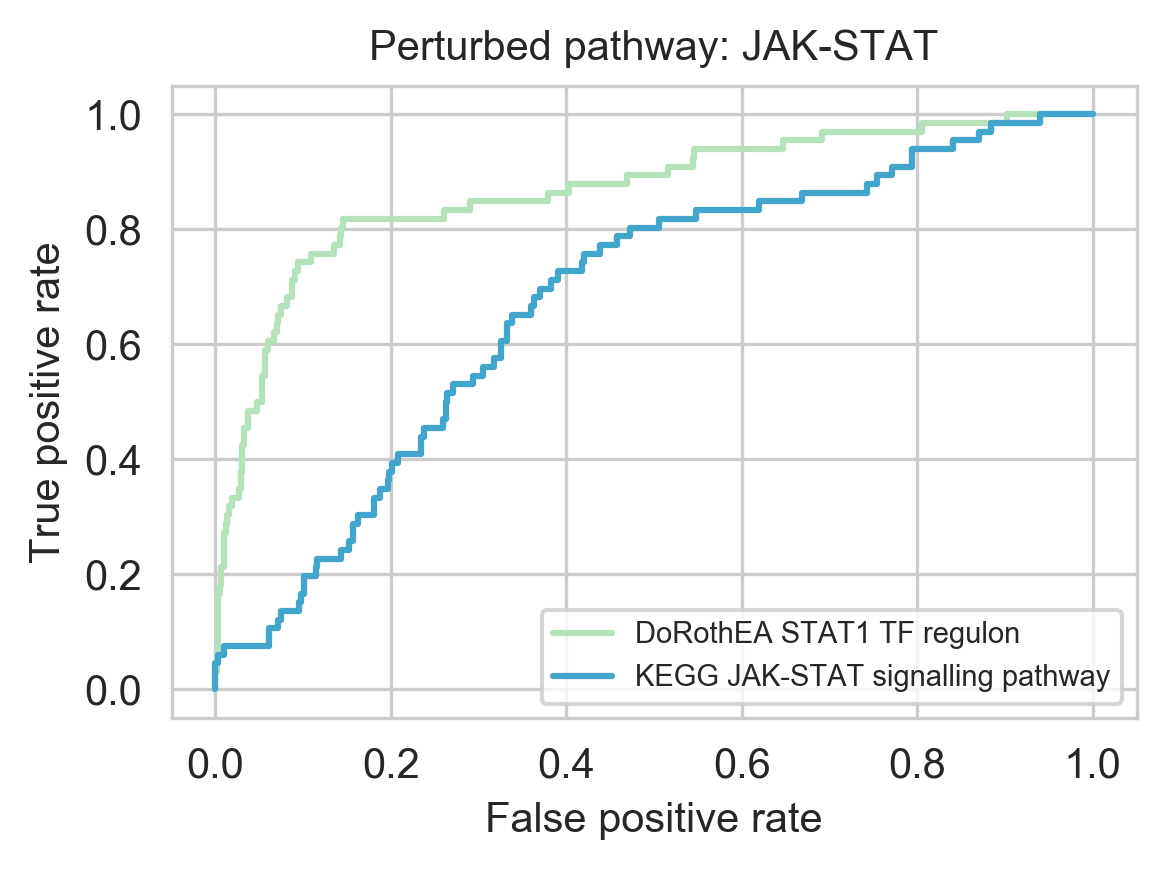

In [16]:
dorothea=pd.read_csv('../results/benchmark/scores/progeny/single/BEST_dorothea_AB_filtered_abs.csv',
                     sep=',',header=0,index_col=0)
kegg=pd.read_csv('../results/benchmark/scores/progeny/single/KEGG_filtered_abs.csv',
                     sep=',',header=0,index_col=0)
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
y_pr1=dorothea.loc['STAT1']
y_pr2=kegg.loc['KEGG_JAK_STAT_SIGNALING_PATHWAY']
y_tr=(meta['pathway']=='JAK-STAT')*1
fpr1,tpr1,th=ROC(y_true=y_tr,y_score=y_pr1)
fpr2,tpr2,th=ROC(y_true=y_tr,y_score=y_pr2)
auc1=AUC(fpr1,tpr1)
auc2=AUC(fpr2,tpr2)
sns.set_palette('GnBu',2)
plt.figure(figsize=(4,3),dpi=300)
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.xlabel('False positive rate',size=10)
plt.ylabel('True positive rate',size=10)
plt.title('Perturbed pathway: JAK-STAT',size=10)
plt.legend(['DoRothEA STAT1 TF regulon','KEGG JAK-STAT signalling pathway'],fontsize=7)
plt.tight_layout()
print(auc1,auc2)
plt.savefig('../figures/raw/Fig3A2.pdf')

In [17]:
data=pd.read_csv('../results/benchmark/z_scores/progeny/single/BEST_dorothea_AB_filtered_abs.csv',
                sep=',',header=0,index_col=0)
data=data.sort_index()

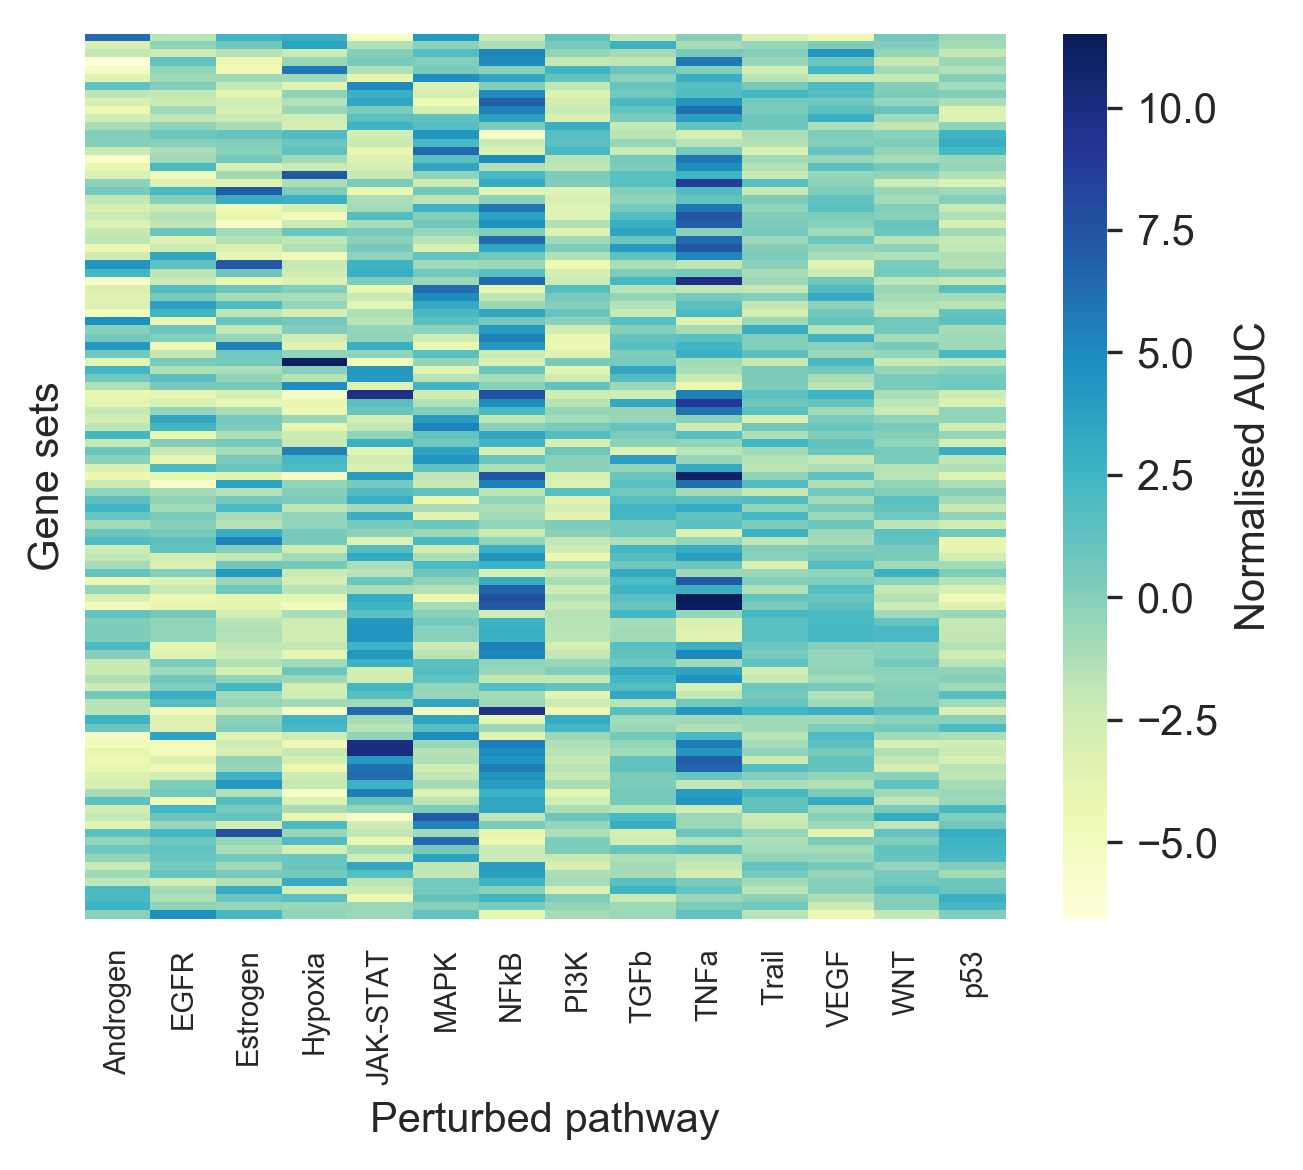

In [18]:
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data.T,cmap='YlGnBu',cbar_kws={'label': 'Normalised AUC'})
plt.xlabel('Perturbed pathway',size=10)
plt.ylabel('Gene sets',size=10)
plt.yticks([])
plt.xticks(size=7)
plt.tight_layout()
plt.savefig('../figures/raw/Fig3A3.pdf')

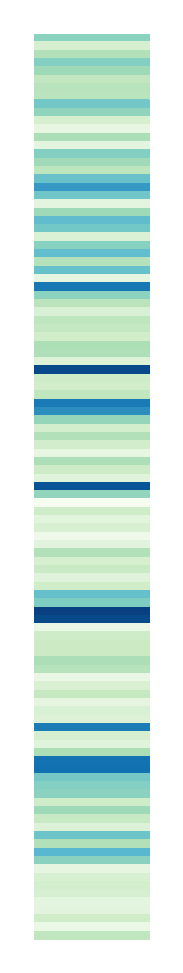

In [19]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.abs().max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig3A4.pdf')

In [135]:
def get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs'):
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','CGP','KEGG','BIOCARTA','REACTOME']
    scores=[]
    for fname in datasets:
        data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,'_random',abstype),
                         sep=',',header=0,index_col=0)
        scores+=list(data.values.reshape((1,-1))[0])
    scores=np.array(scores)
    th=np.std(scores)*2.5
    m=np.mean(scores)
    print(m)
    results=pd.DataFrame(columns=['Rtype','Dataset','Informative','Total'])
    for rtype in ['_random','_filtered']:
        for fname in datasets:
            data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,rtype,abstype),
                             sep=',',header=0,index_col=0)
            p=((data.abs()>th).sum(0)>0).sum()
            n=data.shape[1]
            temp=pd.DataFrame(index=[len(results)],columns=results.columns)
            temp.loc[len(results)]=[rtype,fname,p,n]
            results=pd.concat([results,temp])
    results['Prop']=results['Informative']/results['Total']
    results['Non_informative']=results['Total']-results['Informative']
    results=results.sort_values(['Dataset','Rtype'])
    results.index=range(len(results))
    return results

In [144]:
def plot_lollipop(results,fname=False):
    plt.figure(figsize=(5,4),dpi=300)
    colors=sns.color_palette('GnBu',2)
    fil=results['Rtype']=='_filtered'
    plt.hlines(y=results.index[fil], xmin=0, xmax=results['Prop'][fil], color=colors[0])
    plt.hlines(y=results.index[~fil], xmin=0, xmax=results['Prop'][~fil], color=colors[1])
    plt.plot(results['Prop'][fil],results.index[fil],'o',color=colors[0])
    plt.plot(results['Prop'][~fil],results.index[~fil],'o',color=colors[1])
    dnames=['high confidence\nDoRothEA','low confidence\nDoRothEA','BIOCARTA','CGP','KEGG','REACTOME']
    plt.yticks((results.index[fil]+results.index[~fil])/2,dnames)
    plt.xlabel('Informative / non-informative ratio',size=13)
    plt.legend(['Real','Random'])
    plt.tight_layout()
    if fname:
        plt.savefig('../figures/raw/'+fname+'.pdf')

In [137]:
def make_fisher_test(data):
    fil=results['Rtype']=='_filtered'
    a=results['Informative'][fil].sum()
    b=results['Informative'][~fil].sum()
    c=results['Non_informative'][fil].sum()
    d=results['Non_informative'][~fil].sum()
    print('vs. random:',fisher_exact([[a,b],[c,d]]))
    for dataset in data['Dataset'].unique():
        fil=results['Rtype']=='_filtered'
        fil1=(results['Dataset']=='BEST_dorothea_AB')&fil
        fil2=(results['Dataset']==dataset)&fil
        a=results['Informative'][fil1].sum()
        b=results['Informative'][fil2].sum()
        c=results['Non_informative'][fil1].sum()
        d=results['Non_informative'][fil2].sum()
        print('Dorothea vs. ',dataset,fisher_exact([[a,b],[c,d]]))

-0.013246926042144856
vs. random: (2.7603475602250813, 9.409076993897767e-122)
Dorothea vs.  BEST_dorothea_AB (1.0, 1.0)
Dorothea vs.  BEST_dorothea_CD (2.344710723795691, 0.0003797428092137405)
Dorothea vs.  BIOCARTA (1.454194792671167, 0.11285753068156079)
Dorothea vs.  CGP (1.4261395876678646, 0.07700462862129548)
Dorothea vs.  KEGG (1.6290408055113939, 0.05160847638619953)
Dorothea vs.  REACTOME (2.2303697734801684, 9.521660745376138e-05)


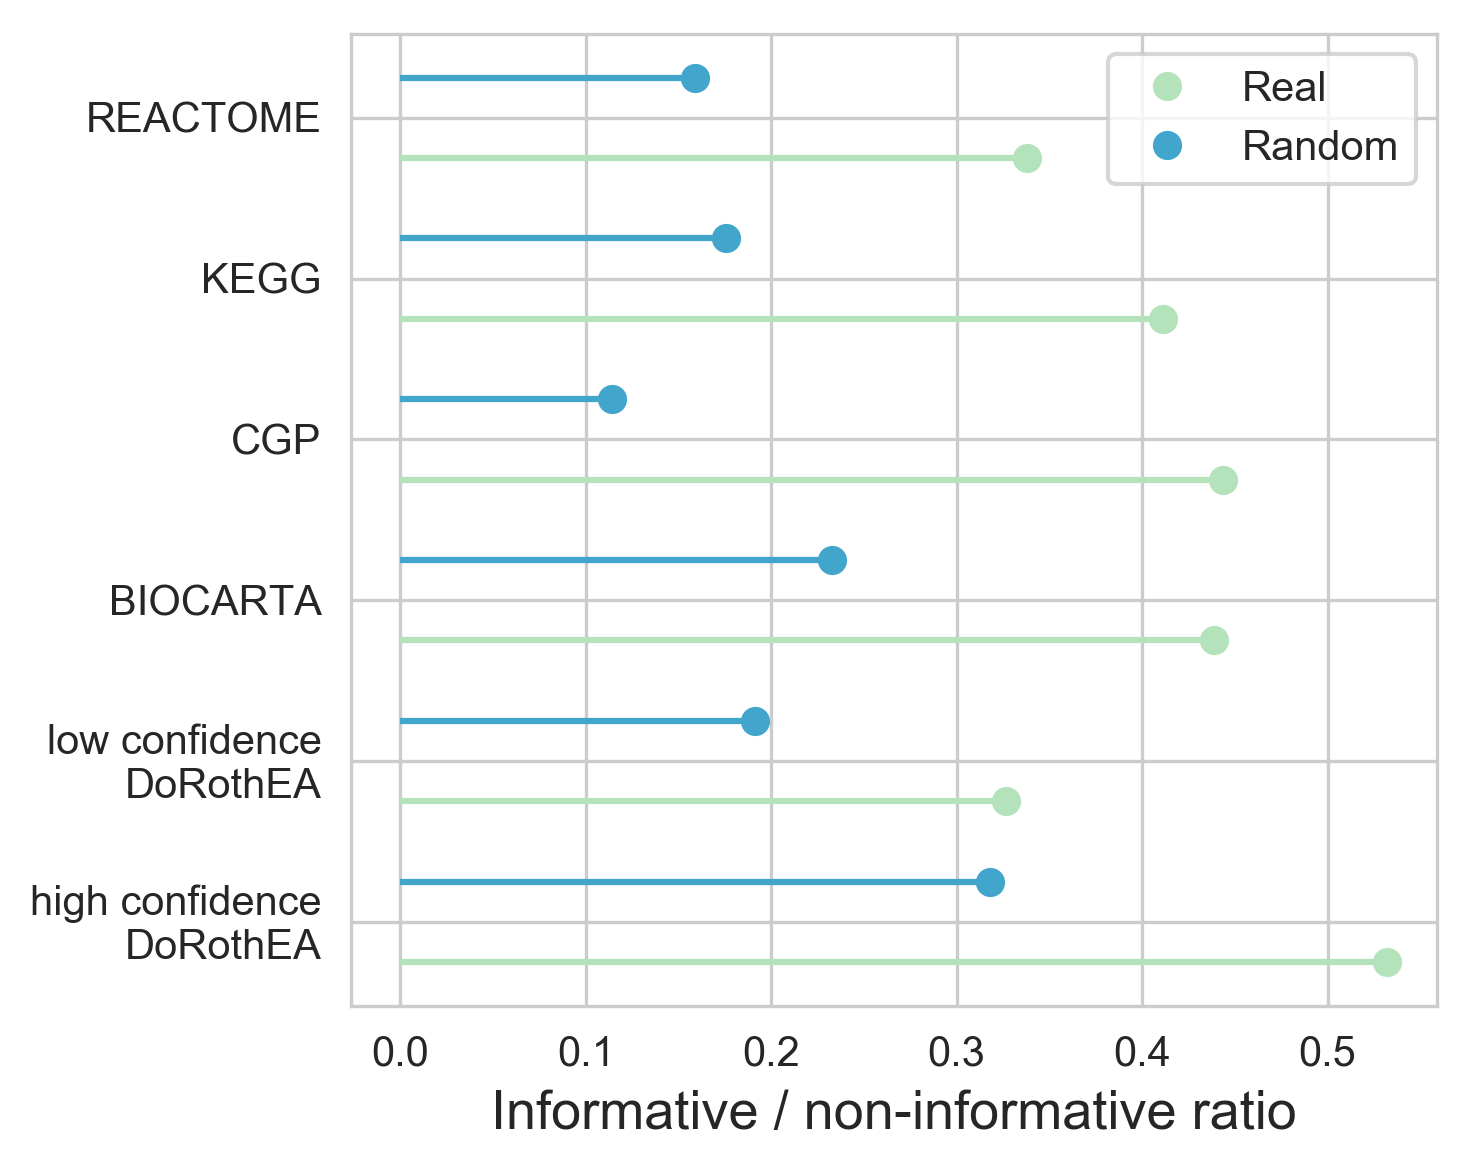

In [150]:
results=get_number_of_informative_gene_sets(bname='progeny',abstype='_abs')
plot_lollipop(results,'Fig3B')
make_fisher_test(results)

-0.02991655321601201
vs. random: (1.3835938615419014, 5.356454848062025e-16)
Dorothea vs.  BEST_dorothea_AB (1.0, 1.0)
Dorothea vs.  BEST_dorothea_CD (2.1850299401197604, 0.005058295266152969)
Dorothea vs.  BIOCARTA (2.9410919540229883, 4.753711536466407e-05)
Dorothea vs.  CGP (1.5421198156682028, 0.09275477740412211)
Dorothea vs.  KEGG (1.7457692307692307, 0.06732295438230555)
Dorothea vs.  REACTOME (3.0480163360560093, 2.0469321909684364e-06)


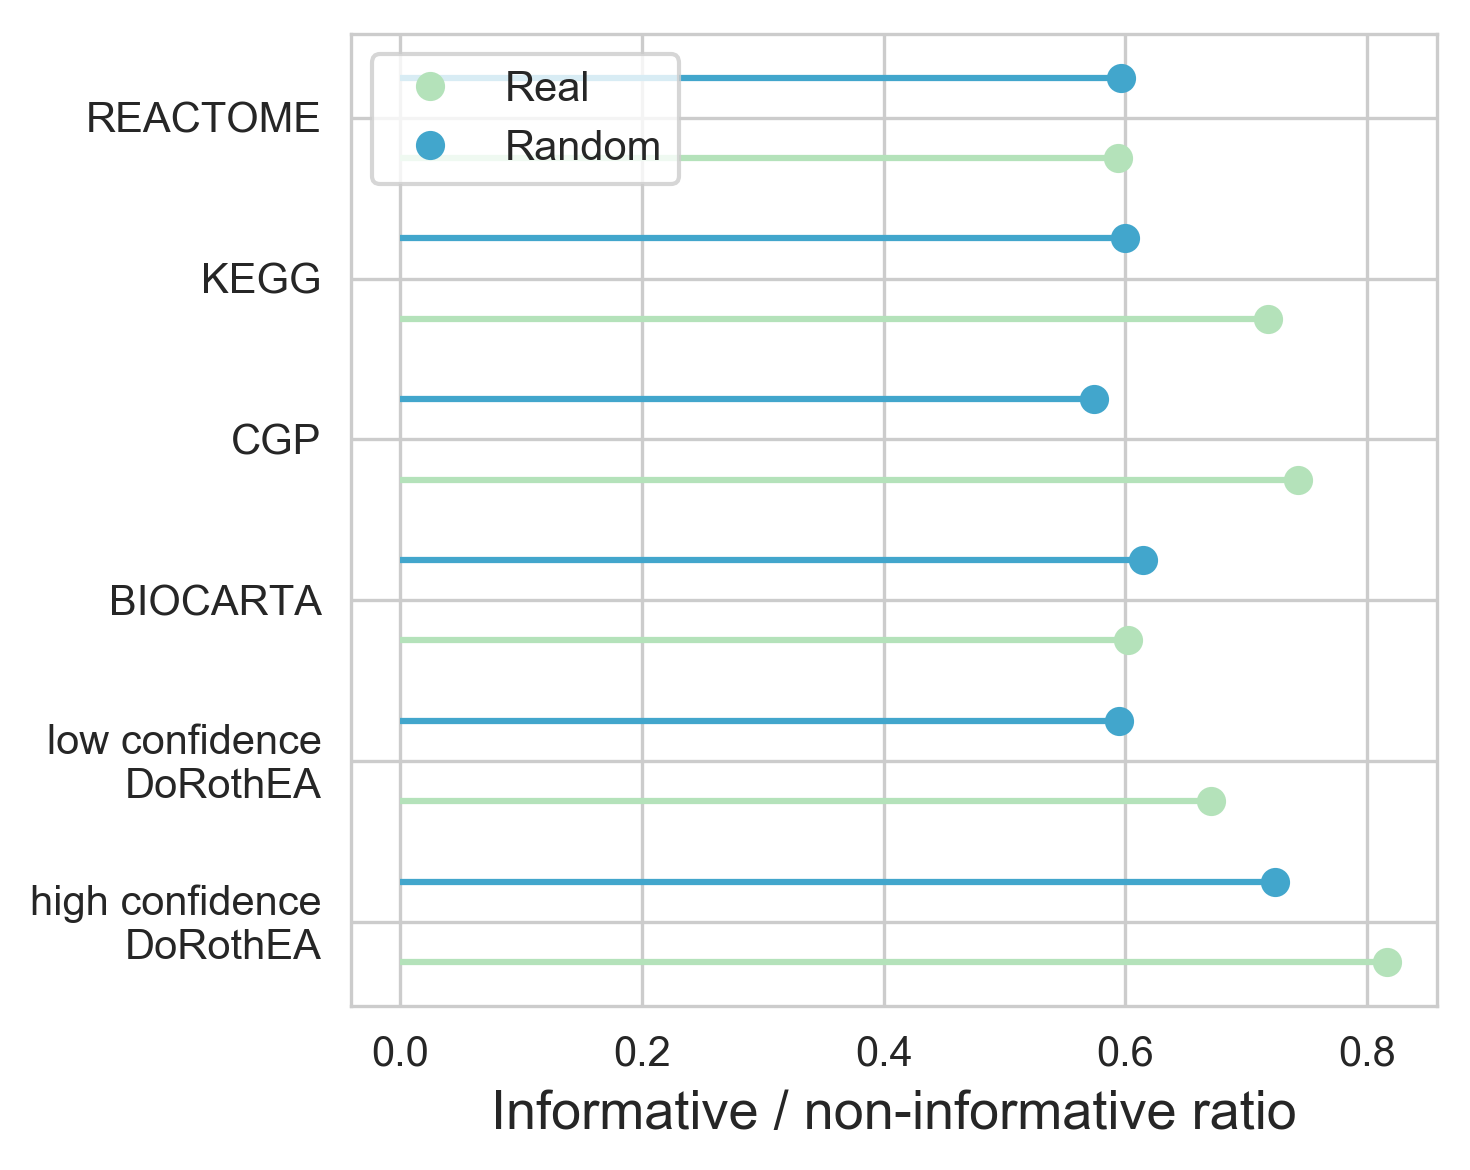

In [149]:
results=get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs')
plot_lollipop(results,'Fig3C')
make_fisher_test(results)

-0.04333389154584836


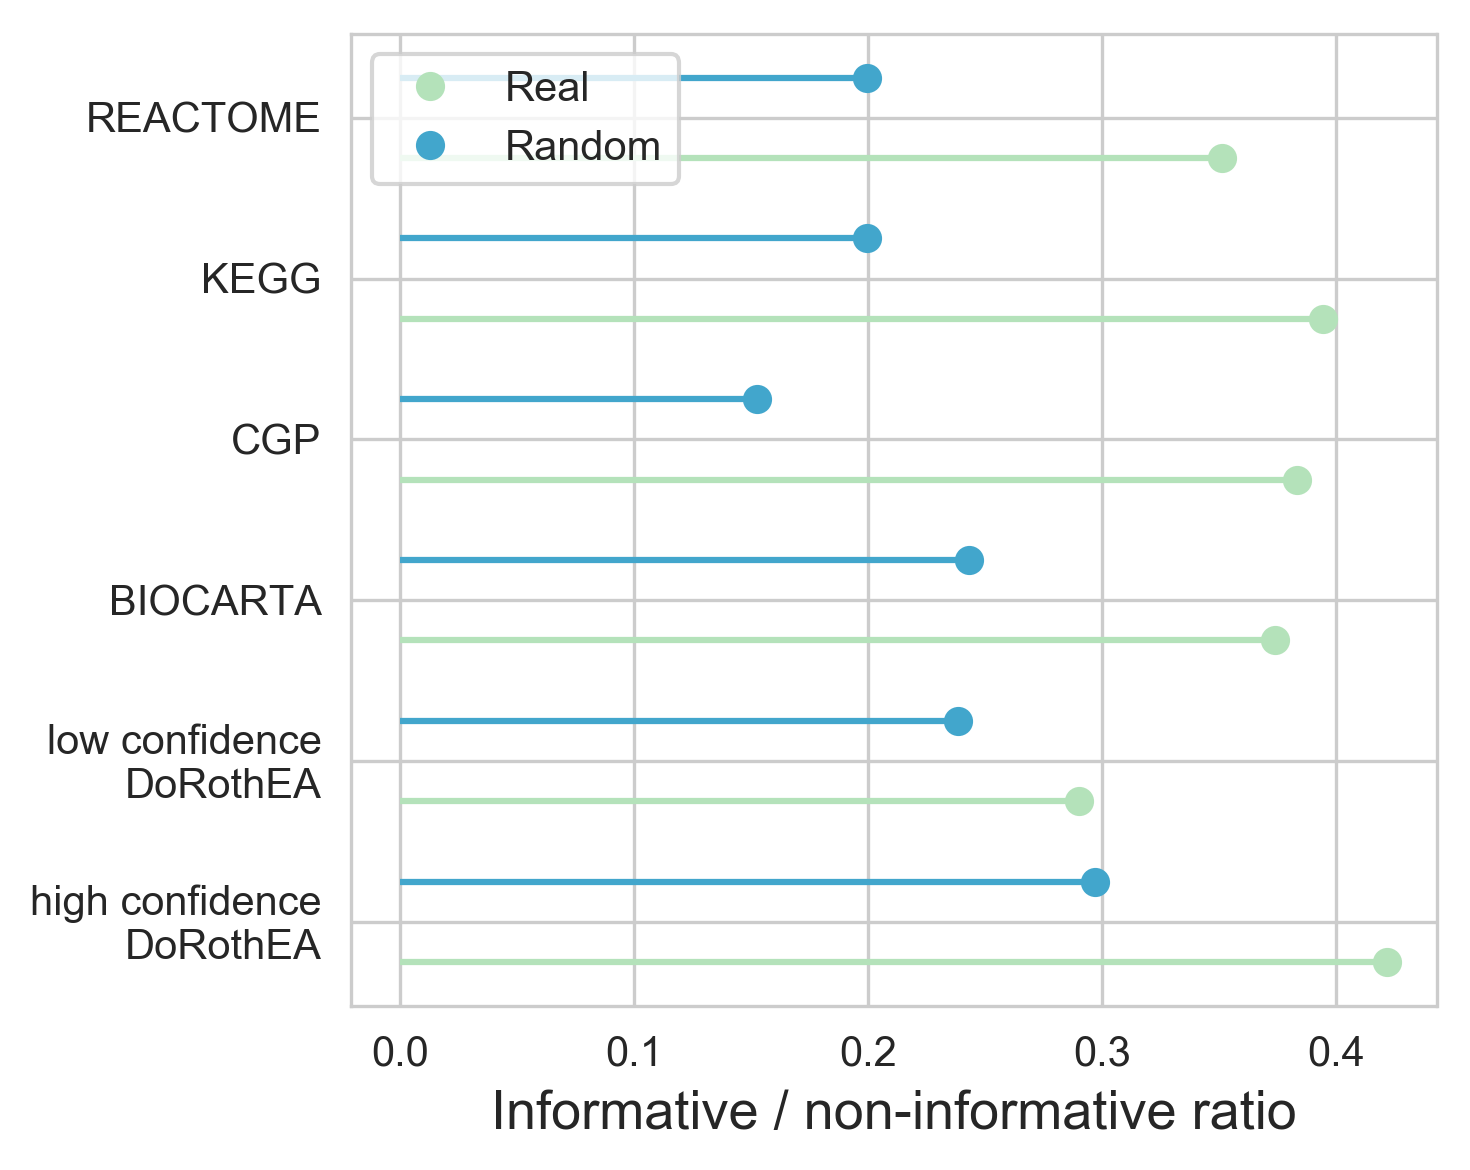

In [151]:
results=get_number_of_informative_gene_sets(bname='progeny',abstype='')
plot_lollipop(results,'SFig5A')

-0.21467888372146707


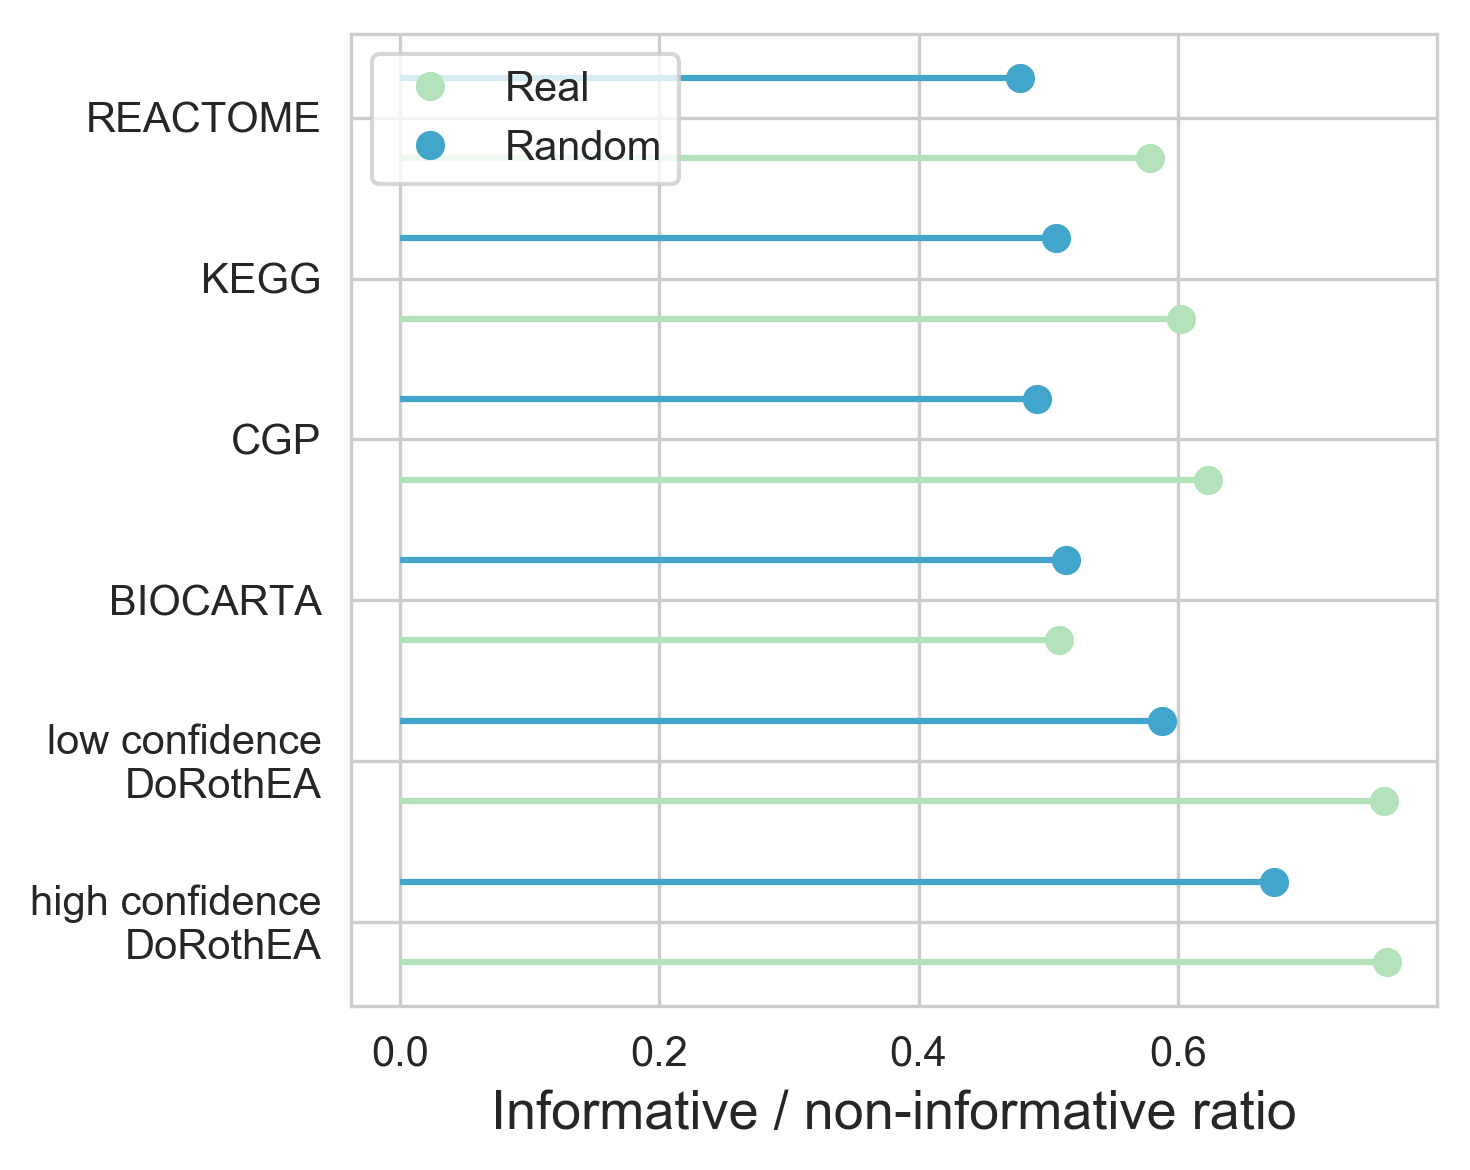

In [152]:
results=get_number_of_informative_gene_sets(bname='gdsc',abstype='')
plot_lollipop(results,'SFig5B')

In [45]:
def plot_informative_score(benchmark='progeny',add_abs=True,final_name='Fig3B'):
    results=pd.DataFrame(columns=['Database','Random','Setname','Score'])
    for i in range(len(datasets)):
        fname=datasets[i]
        if add_abs:
            fname+='_abs.csv'
        else:
            fname+='.csv'
        data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s' % (benchmark,fname) ,sep=',',header=0,index_col=0)
        data=pd.DataFrame(data.abs().max())
        data['Database']=dnames[i//2]
        if (i%2)==0:
            data['Random']='Real'
        else:
            data['Random']='Random'
        data['Setname']=data.index
        data.columns=['Score','Database','Random','Setname']
        data=data[results.columns]
        results=pd.concat([results,data])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('GnBu',2)
    sns.boxplot(x='Database',y='Score',hue='Random',data=results)
    plt.legend(loc=1)
    plt.xticks(rotation=45)
    plt.ylabel('Gene set informative score\n(normalised AUC)')
    plt.tight_layout()
    plt.savefig('../figures/raw/'+final_name+'.pdf')
    results.to_csv('../results/benchmark/'+final_name+'.csv',sep=',')

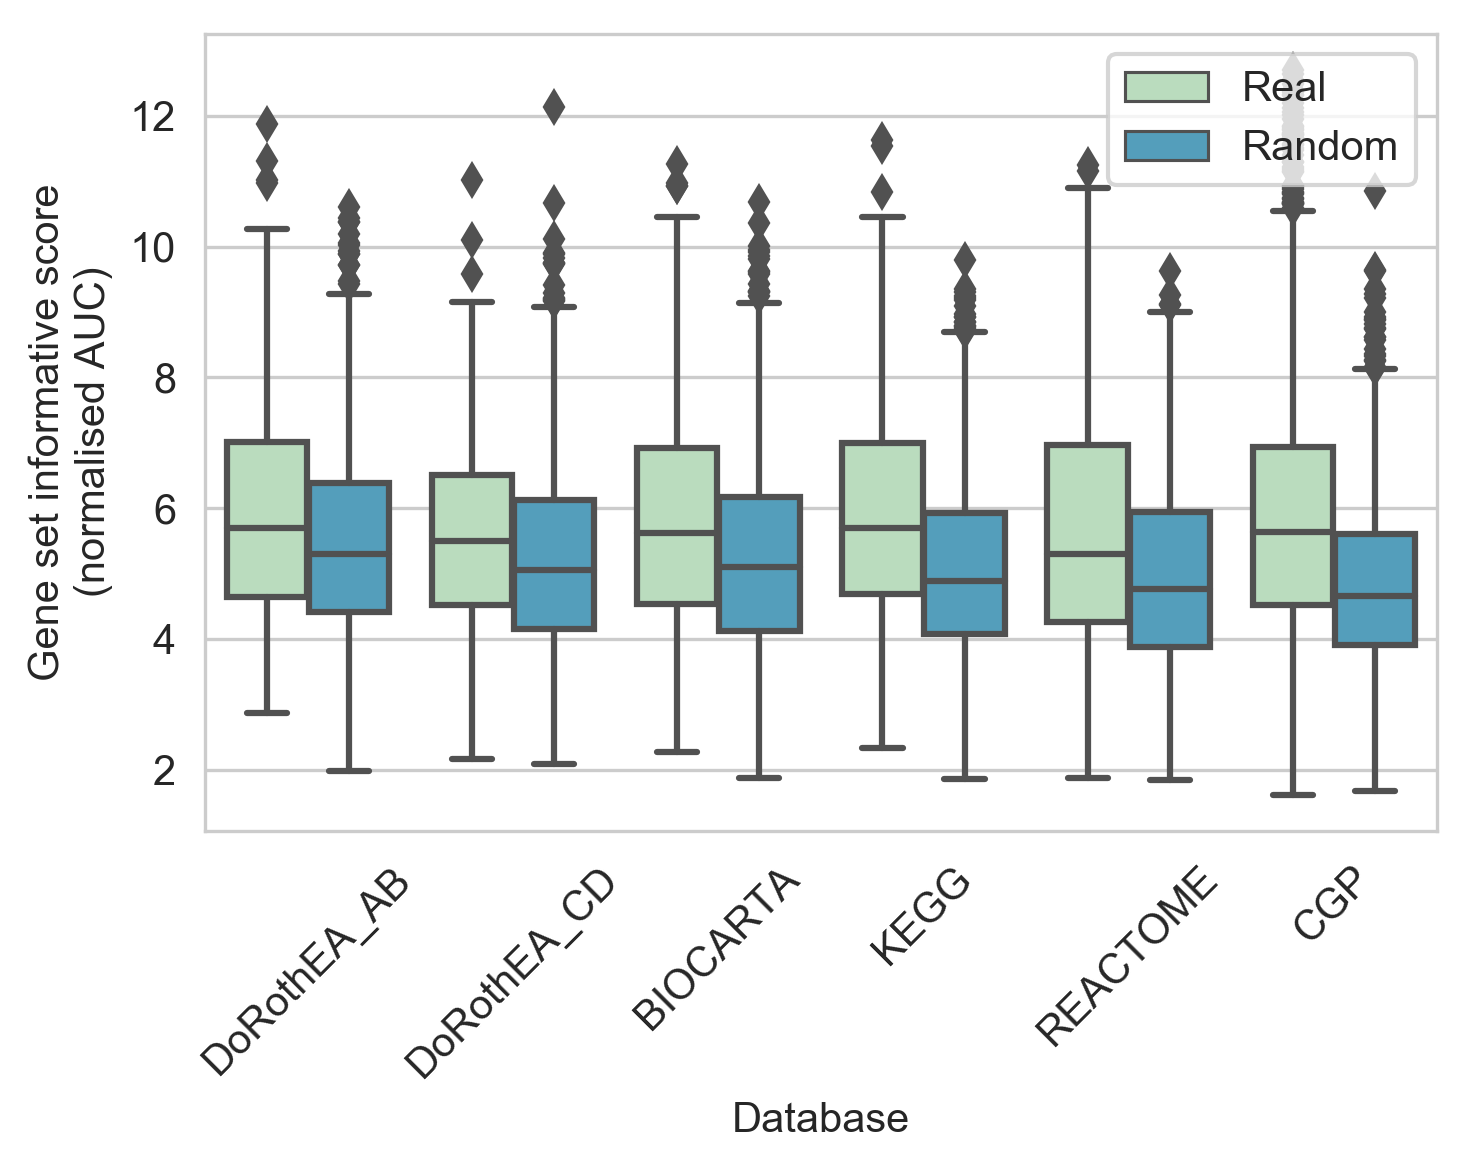

In [49]:
plot_informative_score(benchmark='progeny',add_abs=False,final_name='Fig3B')

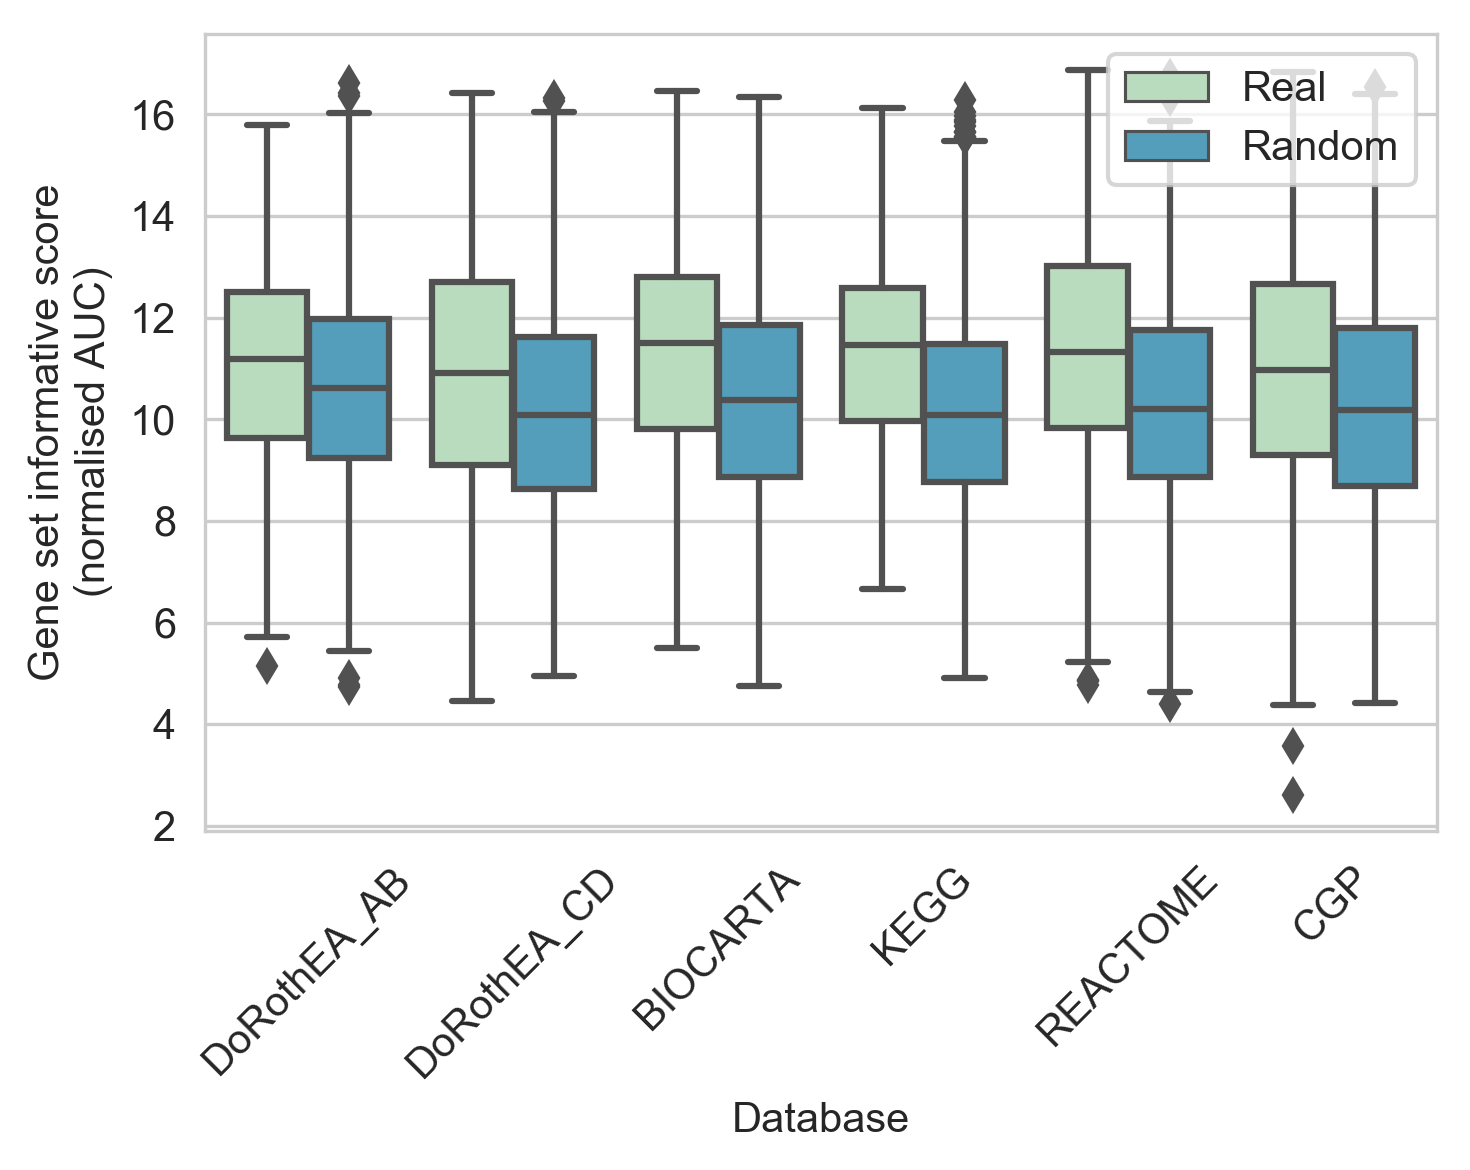

In [48]:
plot_informative_score(benchmark='tcga',add_abs=False,final_name='Fig3C')

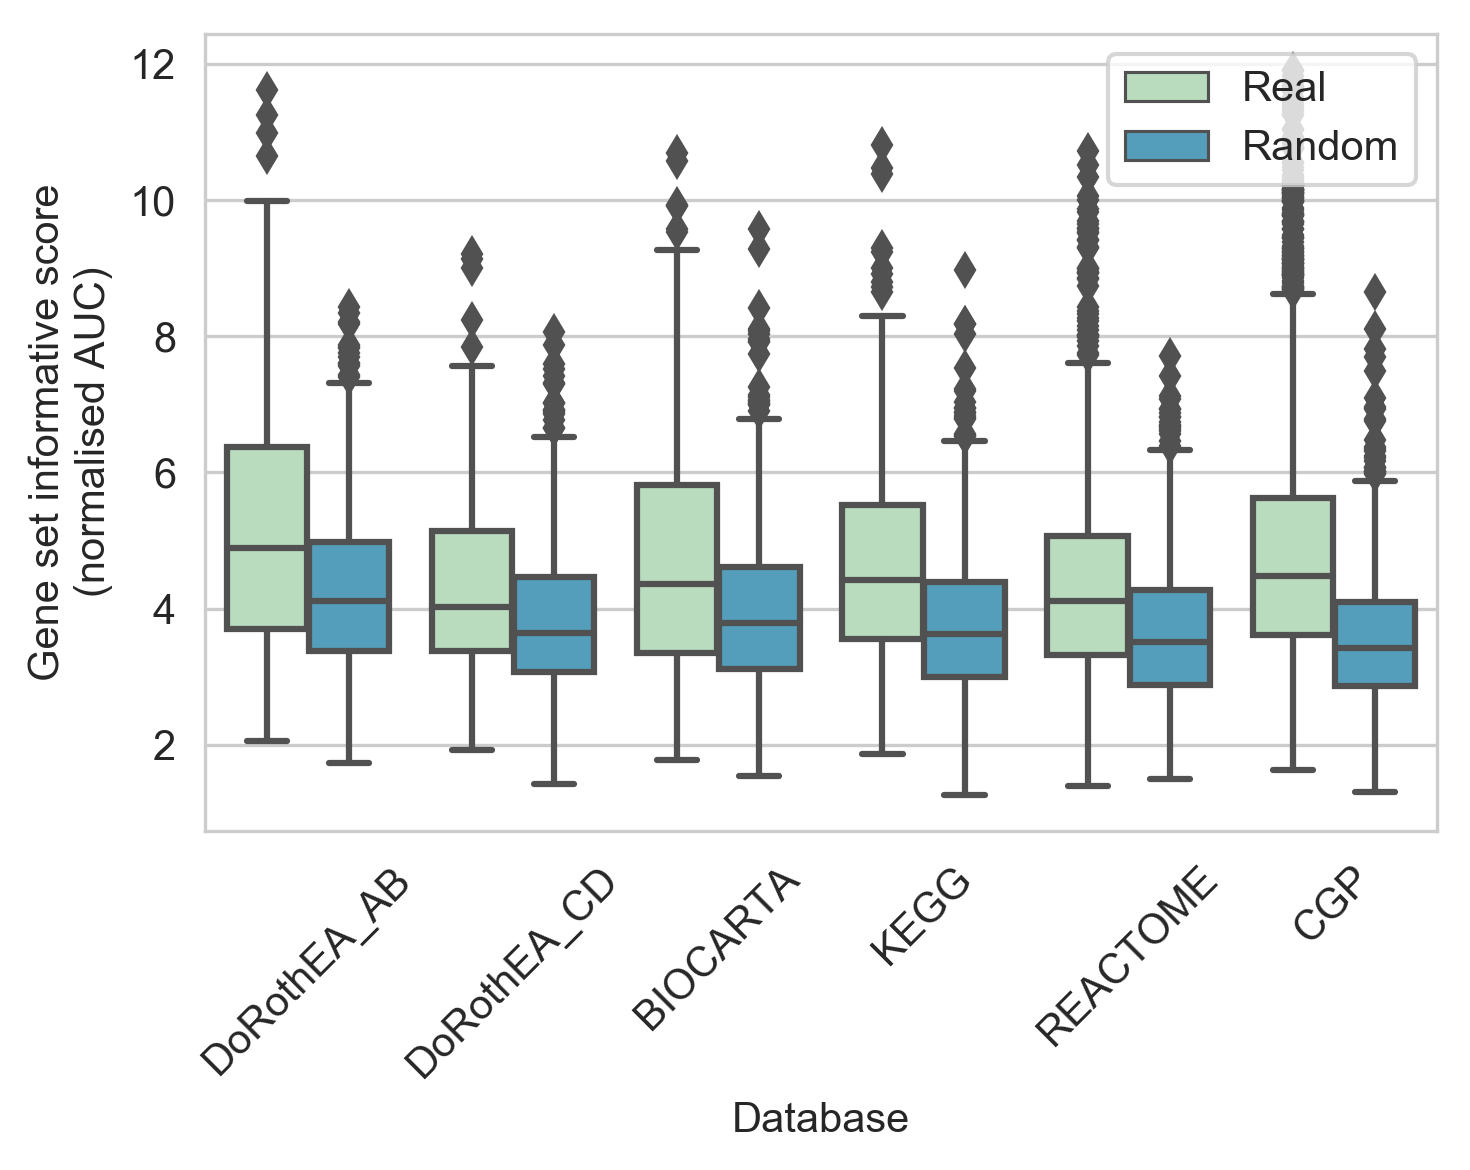

In [50]:
plot_informative_score(benchmark='progeny',add_abs=True,final_name='SFig4A')

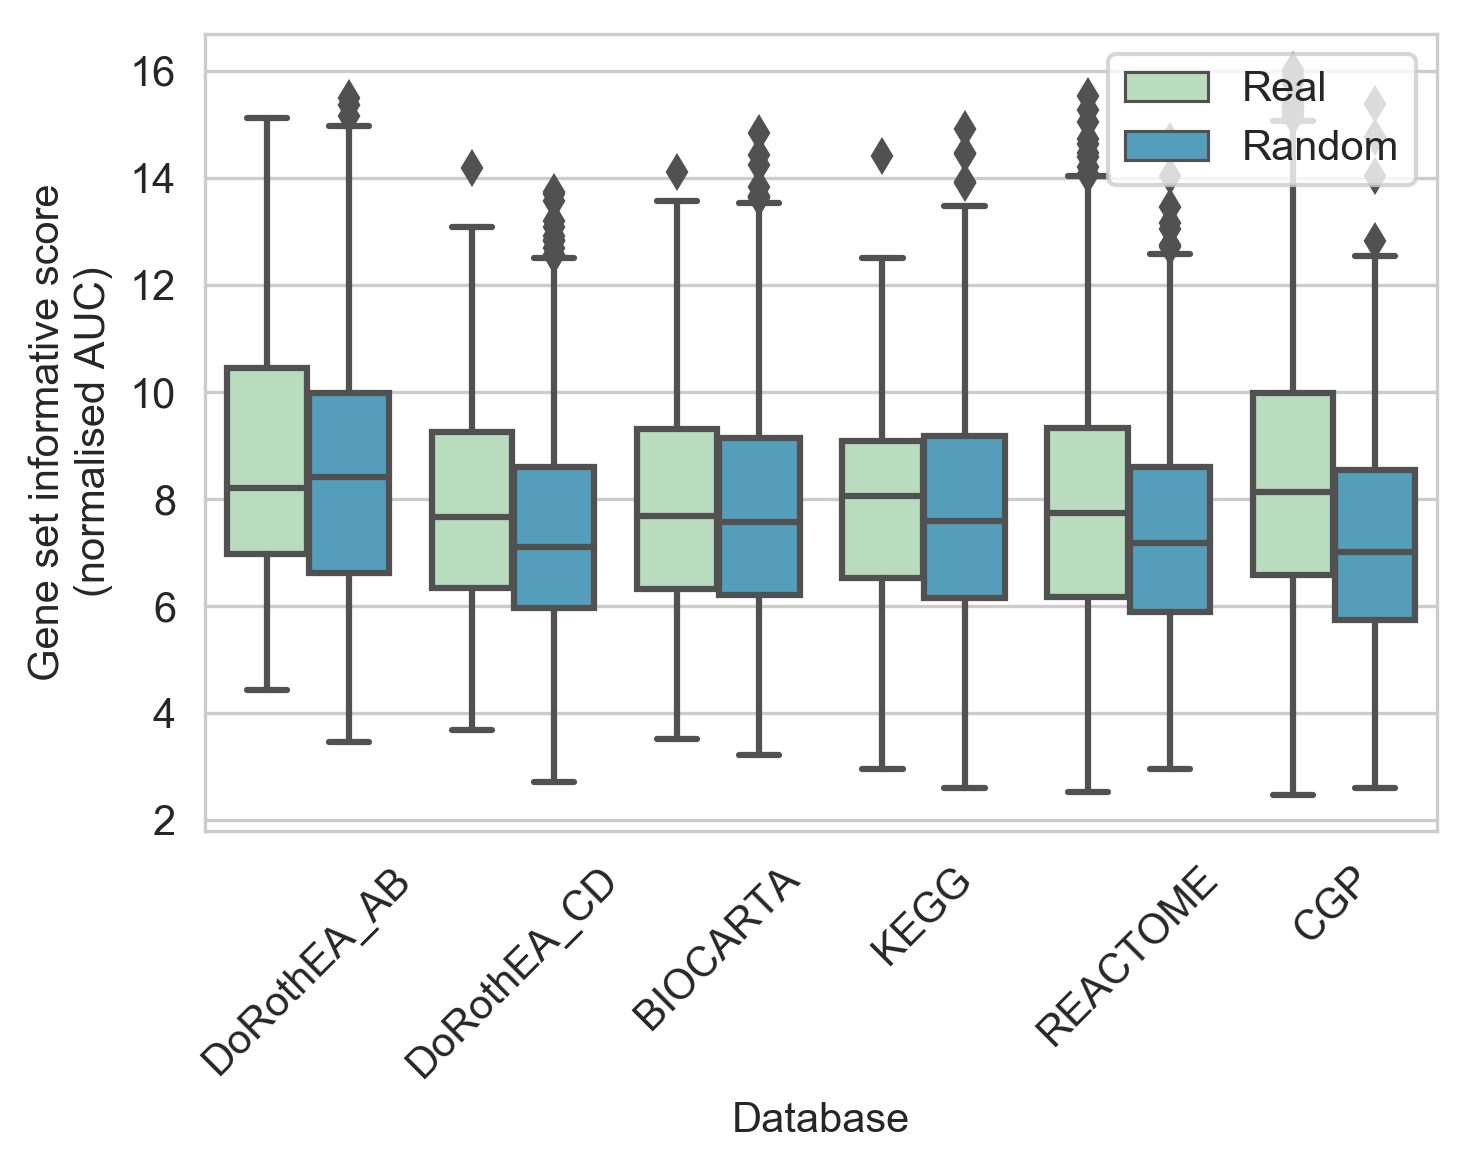

In [51]:
plot_informative_score(benchmark='tcga',add_abs=True,final_name='SFig4B')

In [3]:
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','BIOCARTA',
         'KEGG','REACTOME','CGP']
results=pd.DataFrame(columns=['Dataset','Rtype','r'])

In [4]:
for fname in datasets:
    data1=pd.read_csv('../results/benchmark/scores/progeny/single/'+fname+'_filtered_abs.csv',
                  sep=',',header=0,index_col=0).abs().max(1)
    data2=pd.read_csv('../results/benchmark/scores/gdsc/single/'+fname+'_filtered_abs.csv',
                      sep=',',header=0,index_col=0).abs().max(1)
    sets=list(set(data1.index)&set(data2.index))
    data1=data1[sets]
    data2=data2[sets]
    temp=pd.DataFrame(index=[len(results)],columns=results.columns)
    temp.loc[len(results)]=fname,'real',pcor(data1,data2)[0]
    results=pd.concat([results,temp])
results=results.sort_values(['Dataset','Rtype'])

In [9]:
results

Dataset Rtype         r
0  BEST_dorothea_AB  real  0.797089
1  BEST_dorothea_CD  real  0.384027
2          BIOCARTA  real    0.4464
5               CGP  real   0.71781
3              KEGG  real  0.524283
4          REACTOME  real  0.539995

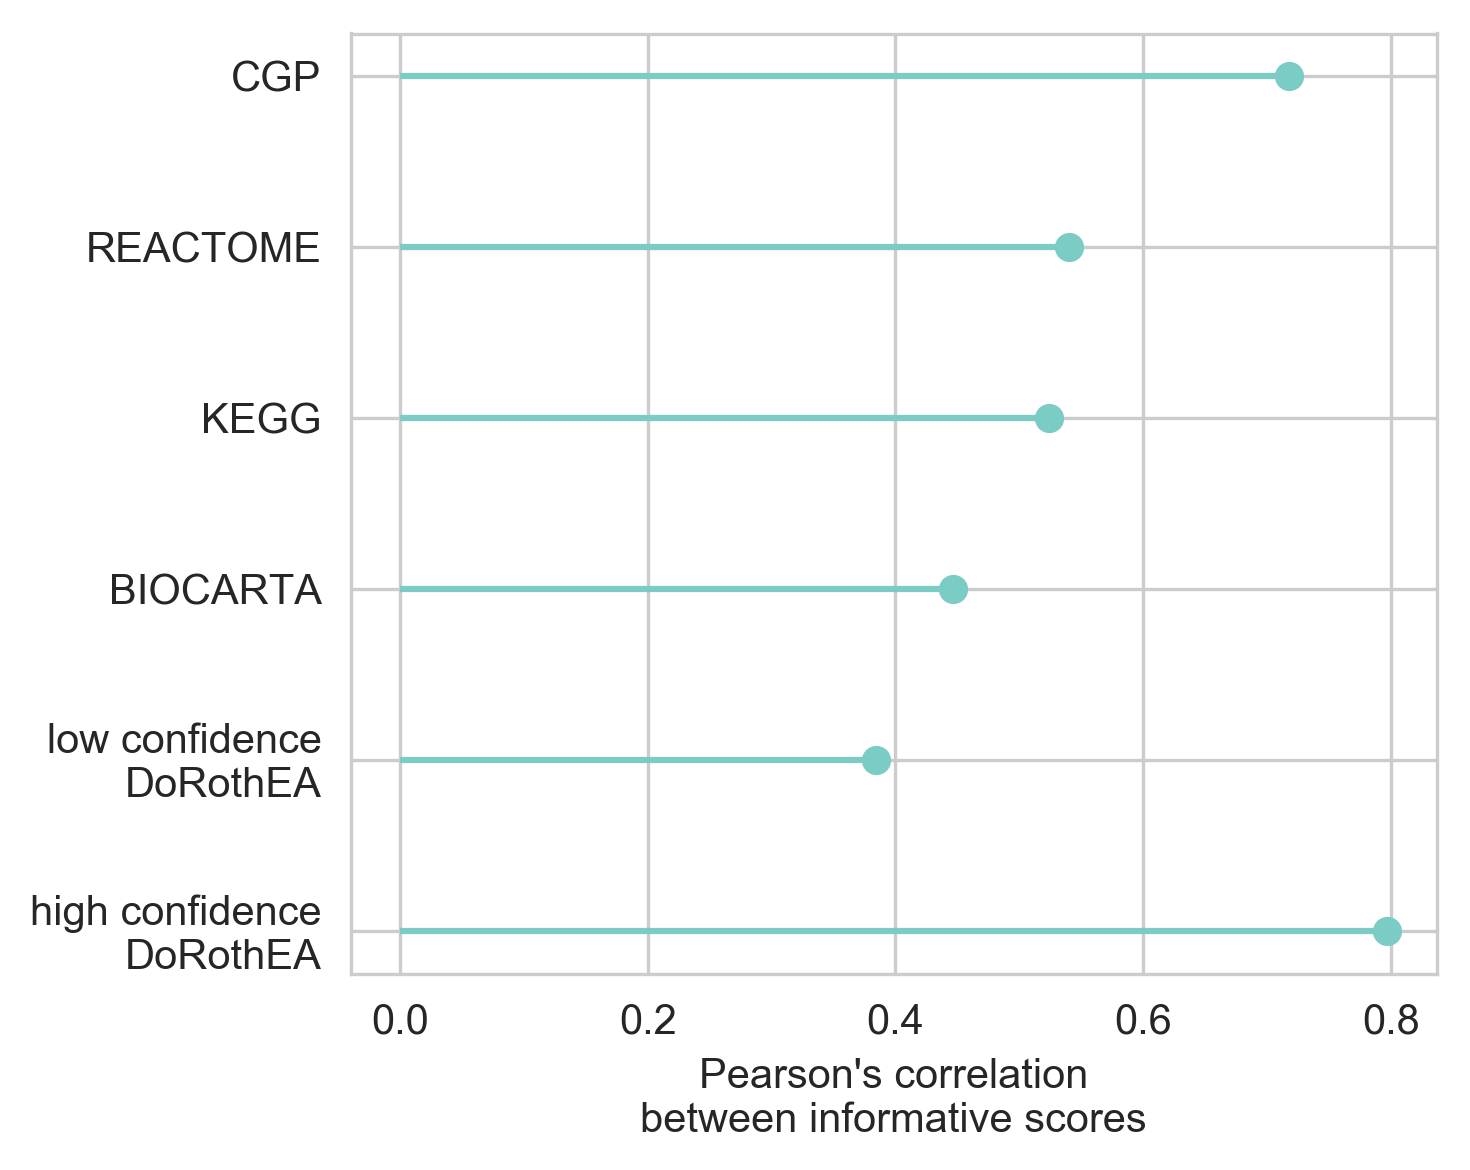

In [25]:
plt.figure(figsize=(5,4),dpi=300)
colors=sns.color_palette('GnBu',1)
plt.hlines(y=results.index, xmin=0, xmax=results['r'],colors=colors[0])
plt.plot(results['r'], results.index, "o",color=colors[0])
plt.xlabel("Pearson's correlation\nbetween informative scores")
plt.yticks(results.index,['high confidence\nDoRothEA','low confidence\nDoRothEA','BIOCARTA','CGP','KEGG','REACTOME'])
plt.tight_layout()
plt.savefig('../figures/raw/SFig4.pdf')

In [27]:
def plot_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type,name1,name2):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    colors=sns.color_palette('GnBu',2)
    f,axs=plt.subplots(1,2,figsize=(8,4),dpi=300)
    sns.regplot(similarity1,activity1,ax=axs[0],color=colors[0])
    axs[0].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name1,name2))
    axs[0].set_ylabel('Informative score of %s gene sets' % name1)

    sns.regplot(similarity2,activity2,ax=axs[1],color=colors[1])
    axs[1].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name2,name1))
    axs[1].set_ylabel('Informative score of %s gene sets' % name2)
    print(pcor(similarity1,activity1))
    print(pcor(similarity2,activity2))
    plt.tight_layout()

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.010514947338572106, 0.9135858866211439)
(0.33339568798299574, 1.2149958933631959e-08)


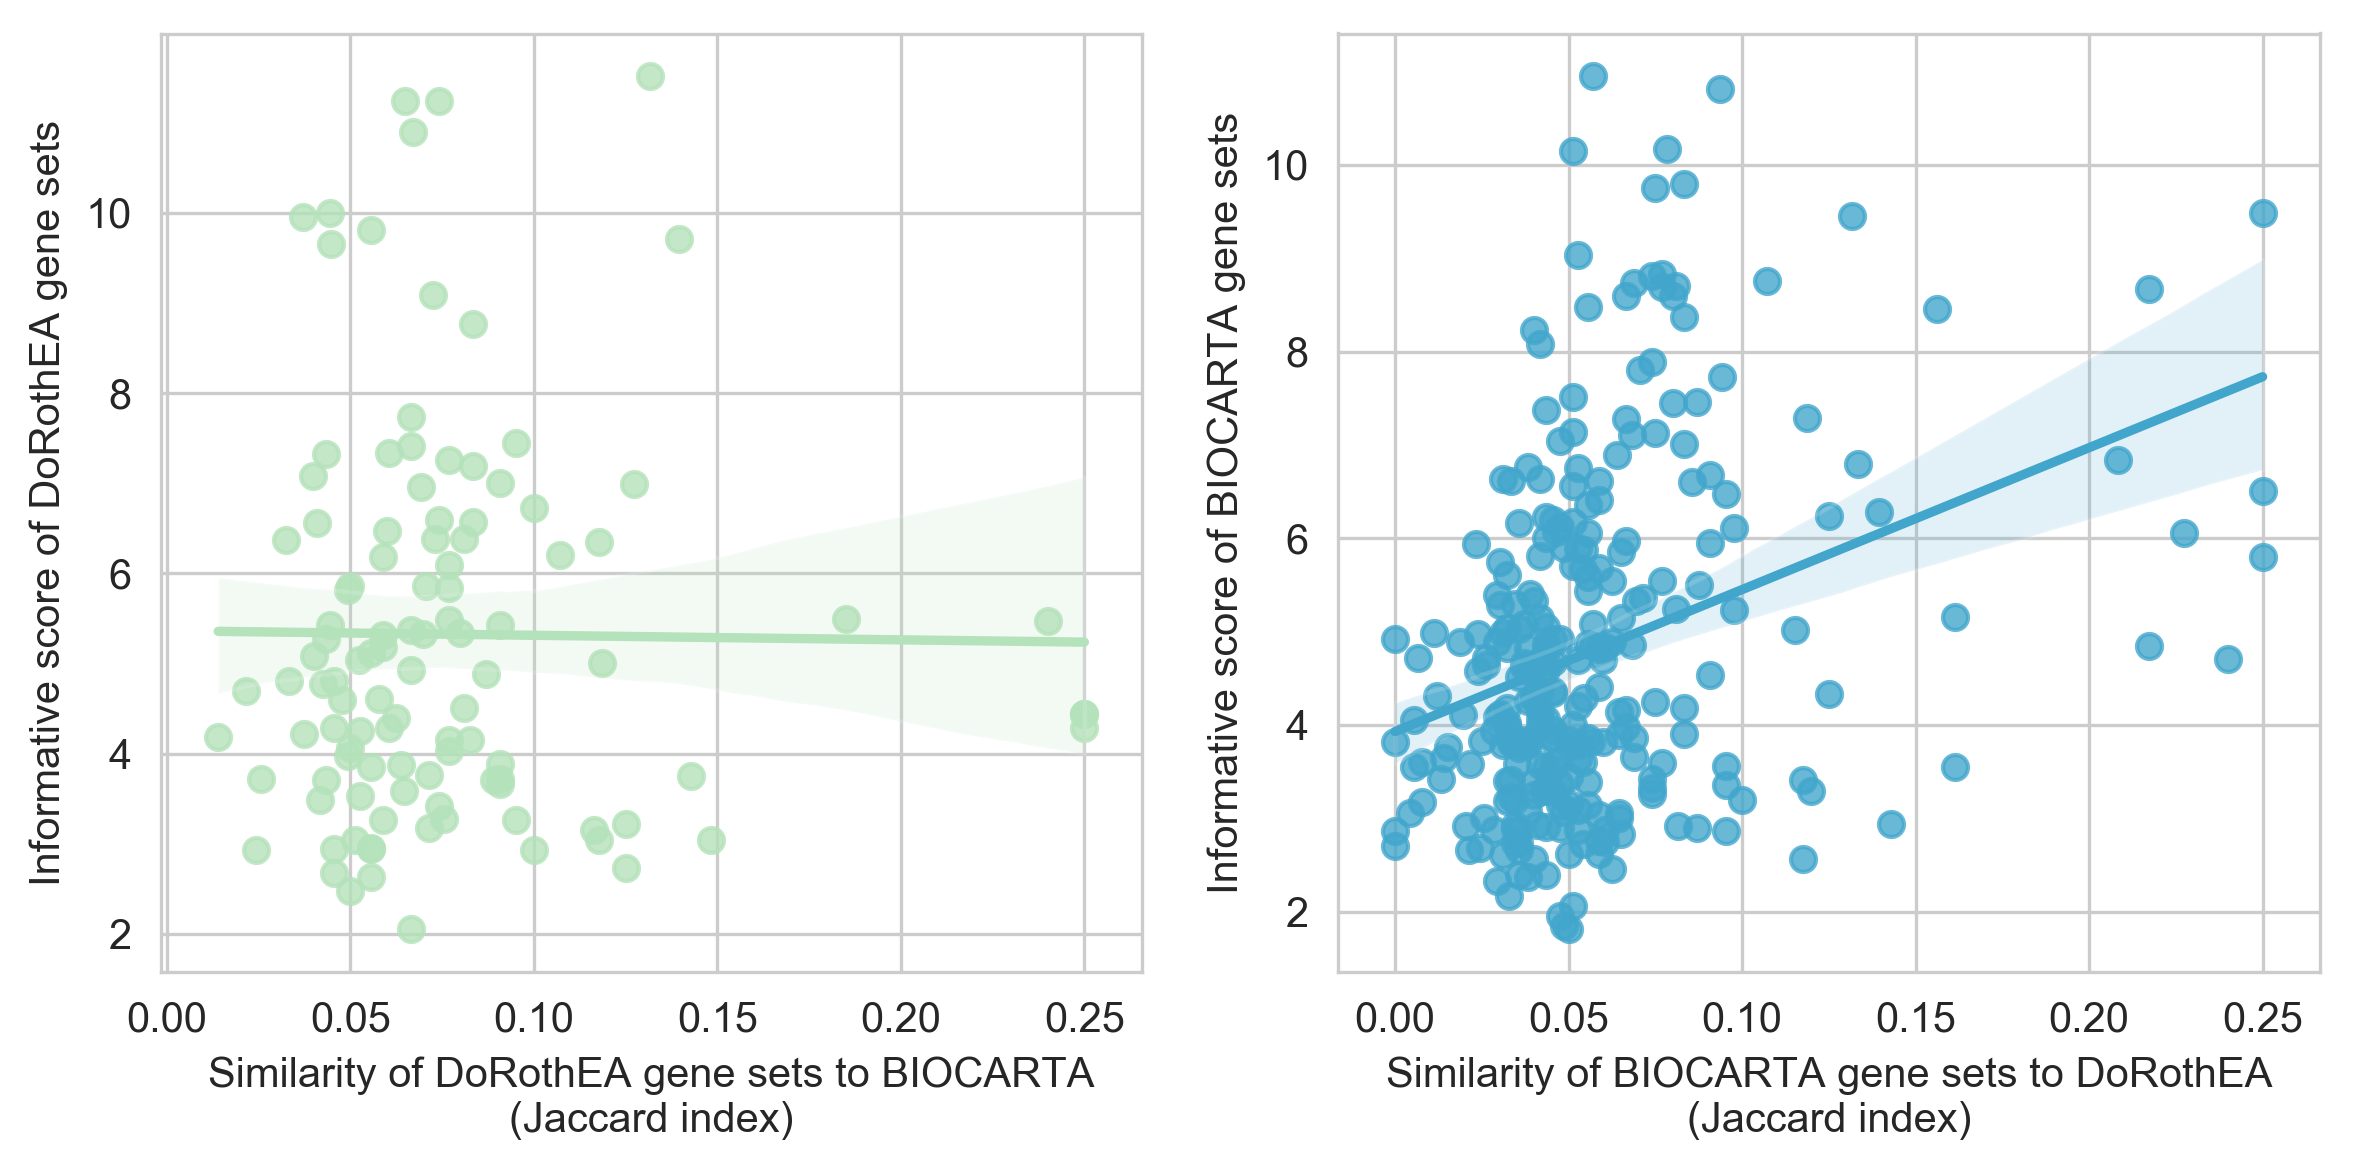

In [109]:
plot_correaltions('BEST_dorothea_AB','BIOCARTA','_abs','_filtered','progeny','jaccard',
                  'DoRothEA','BIOCARTA')
plt.savefig('../figures/raw/Fig4A.pdf')

In [120]:
def get_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    return pcor(similarity1,activity1)[0],pcor(similarity2,activity2)[0]

In [148]:
def analyse_pairwise_correaltions(abs_type='_abs',rnd_fil='_filtered',bname='progeny',sim_type='jaccard'):
    results=pd.DataFrame(columns=['data1','data2','r'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            if dname1<dname2:
                r1,r2=get_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type)
                temp=pd.DataFrame(index=range(2),columns=results.columns)
                temp.loc[0]=[dname1,dname2,r1]
                temp.loc[1]=[dname2,dname1,r2]
                results=pd.concat([results,temp])
    results.index=range(len(results.index)) 
    results['r']=results['r'].astype(float)
    fil=np.in1d(results['data2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results['Data driven gene set']=False
    results.loc[results.index[fil],'Data driven gene set']=True
    fil=np.in1d(results['data1'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results['data_driven_from']=0
    results.loc[results.index[fil],'data_driven_from']=1
    results.columns=['Similarity of','Similarity to','Correaltion between similarity\nand informative score',
                    'Data driven gene set','data_driven_from']
    results=results.sort_values(['Similarity to','Similarity of'])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('GnBu',6)
    #sns.boxplot(y='Correaltion between similarity\nand informative score',
    #            x='Data driven gene set',hue='Similarity to',data=results)
    sns.boxplot(y='Correaltion between similarity\nand informative score',whis=100,
                x='Similarity to',data=results)
    sns.swarmplot(y='Correaltion between similarity\nand informative score',color='k',
                x='Similarity to',data=results,)
    
    plt.xticks([0,1,2,3,4,5],['high confidence\nDoROthEA',
                             'low confidence\nDoRothEA',
                             'Biocarta',
                             'CGP',
                             'KEGG',
                             'Reactome'],rotation=45)
    plt.tight_layout()
    results.columns=['of','to','r','dd_to','dd_from']
    model = ols('r ~ of + dd_to',data=results).fit()
    print(sm.stats.anova_lm(model))
    print('')
    model = ols('r ~ to',data=results).fit()
    print(model.pvalues)
    print('')
    print(model.params)
    return results

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.108254  0.021651  1.474054  0.236679
dd_to      1.0  0.091508  0.091508  6.230162  0.020170
Residual  23.0  0.337822  0.014688       NaN       NaN

Intercept                 0.000053
to[T.BEST_dorothea_CD]    0.101053
to[T.BIOCARTA]            0.153158
to[T.CGP]                 0.864730
to[T.KEGG]                0.029217
to[T.REACTOME]            0.005332
dtype: float64

Intercept                 0.259826
to[T.BEST_dorothea_CD]   -0.127742
to[T.BIOCARTA]           -0.110506
to[T.CGP]                -0.012899
to[T.KEGG]               -0.173729
to[T.REACTOME]           -0.229498
dtype: float64


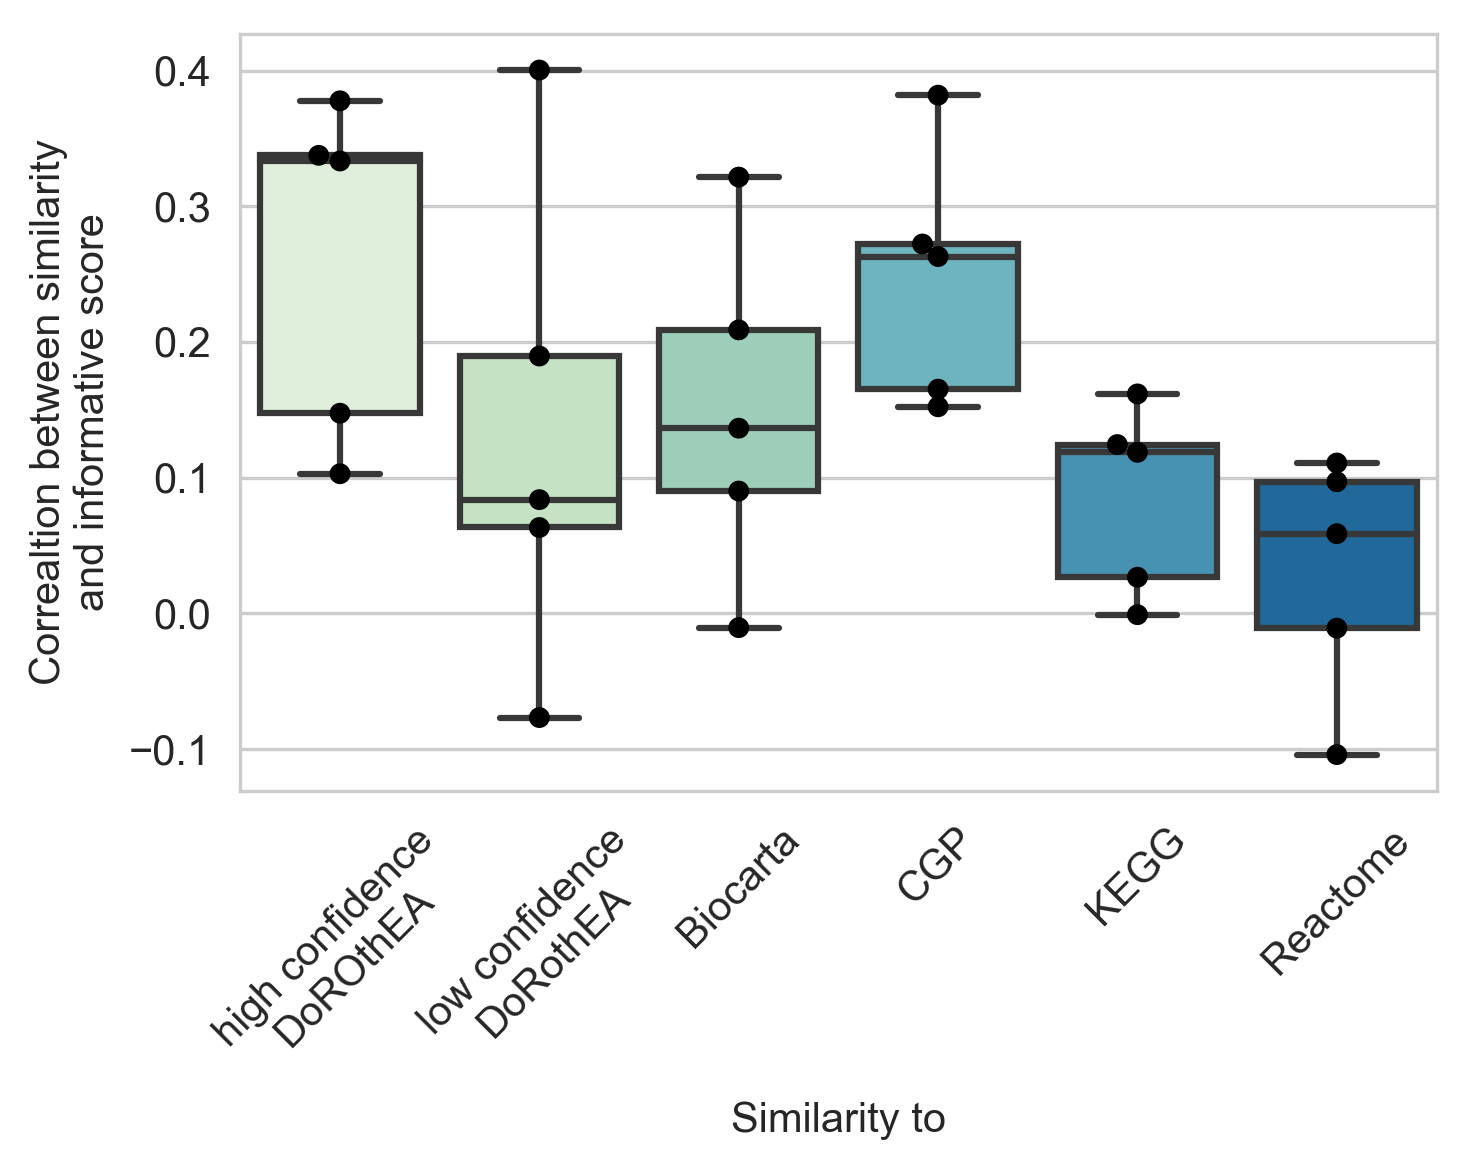

In [150]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='progeny',sim_type='jaccard')
plt.savefig('../figures/raw/Fig4B.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.201694  0.040339  2.917655  0.034970
dd_to      1.0  0.047078  0.047078  3.405075  0.077911
Residual  23.0  0.317993  0.013826       NaN       NaN

Intercept                 0.002384
to[T.BEST_dorothea_CD]    0.488029
to[T.BIOCARTA]            0.038510
to[T.CGP]                 0.018720
to[T.KEGG]                0.163918
to[T.REACTOME]            0.022101
dtype: float64

Intercept                 0.194410
to[T.BEST_dorothea_CD]   -0.057027
to[T.BIOCARTA]           -0.177296
to[T.CGP]                -0.204197
to[T.KEGG]               -0.116272
to[T.REACTOME]           -0.198142
dtype: float64


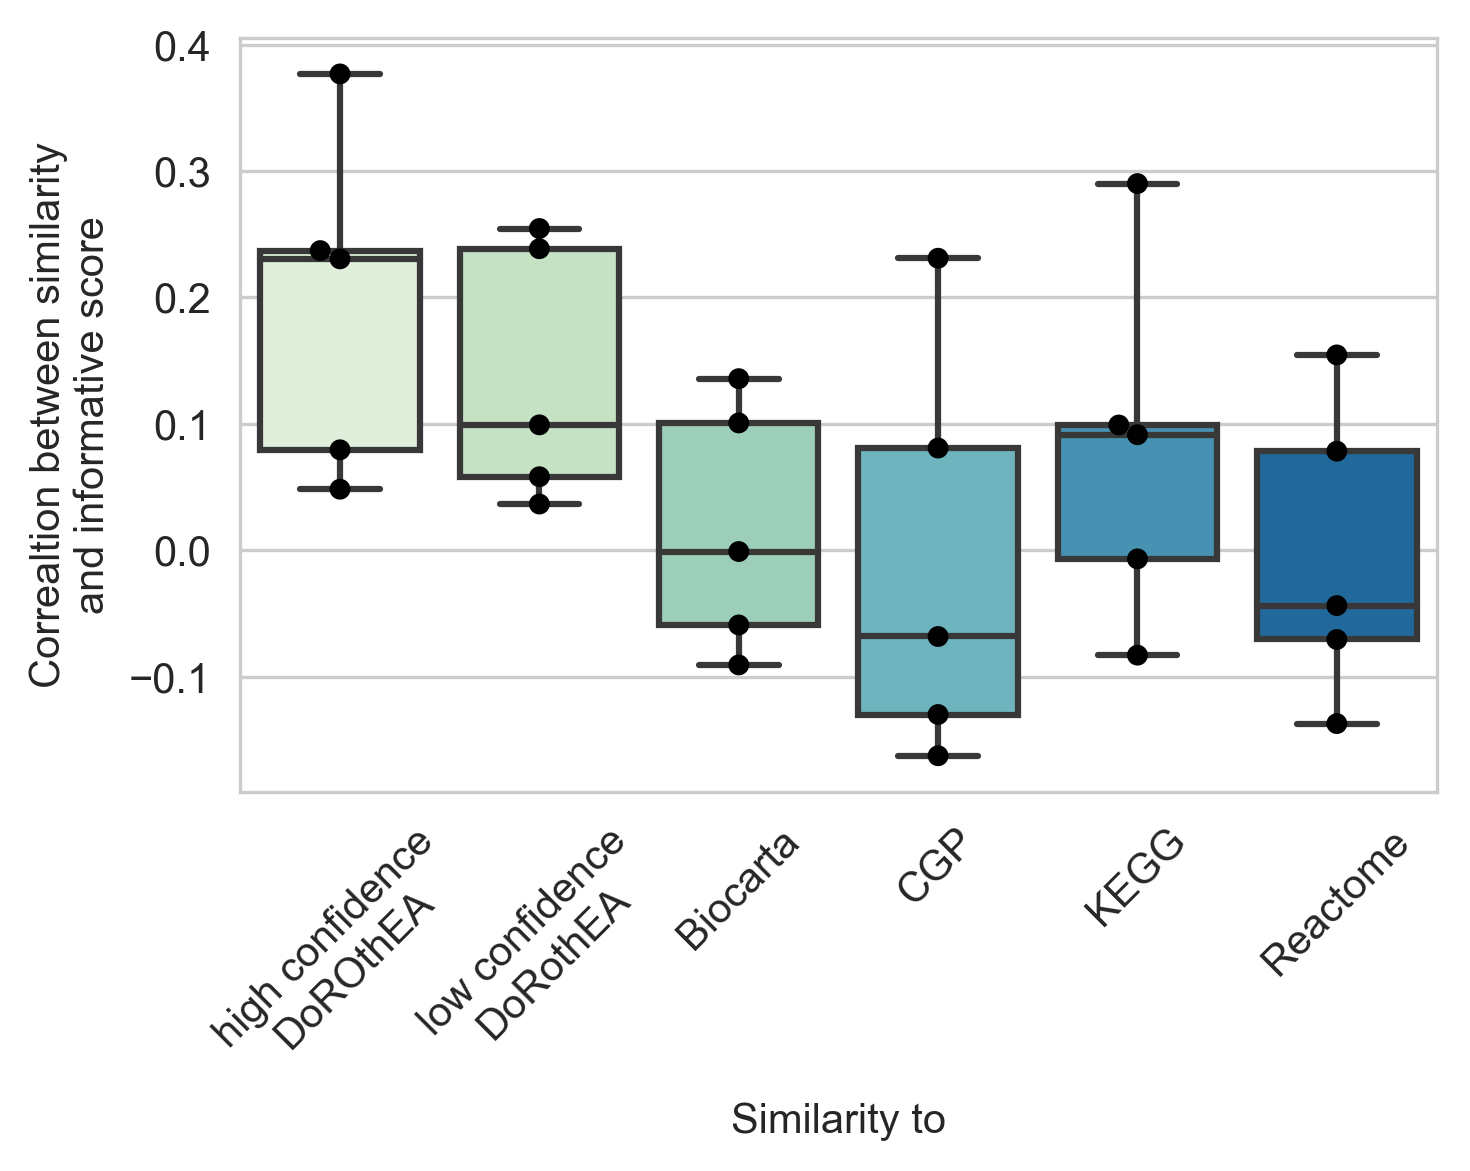

In [151]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='gdsc',sim_type='jaccard')
plt.savefig('../figures/raw/Fig4C.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.077017  0.015403  1.111900  0.381460
dd_to      1.0  0.083902  0.083902  6.056533  0.021784
Residual  23.0  0.318624  0.013853       NaN       NaN

Intercept                 6.790083e-07
to[T.BEST_dorothea_CD]    1.458904e-01
to[T.BIOCARTA]            5.215336e-01
to[T.CGP]                 5.759356e-01
to[T.KEGG]                3.376099e-03
to[T.REACTOME]            5.697377e-03
dtype: float64

Intercept                 0.316471
to[T.BEST_dorothea_CD]   -0.100914
to[T.BIOCARTA]           -0.043678
to[T.CGP]                -0.038074
to[T.KEGG]               -0.218425
to[T.REACTOME]           -0.203839
dtype: float64


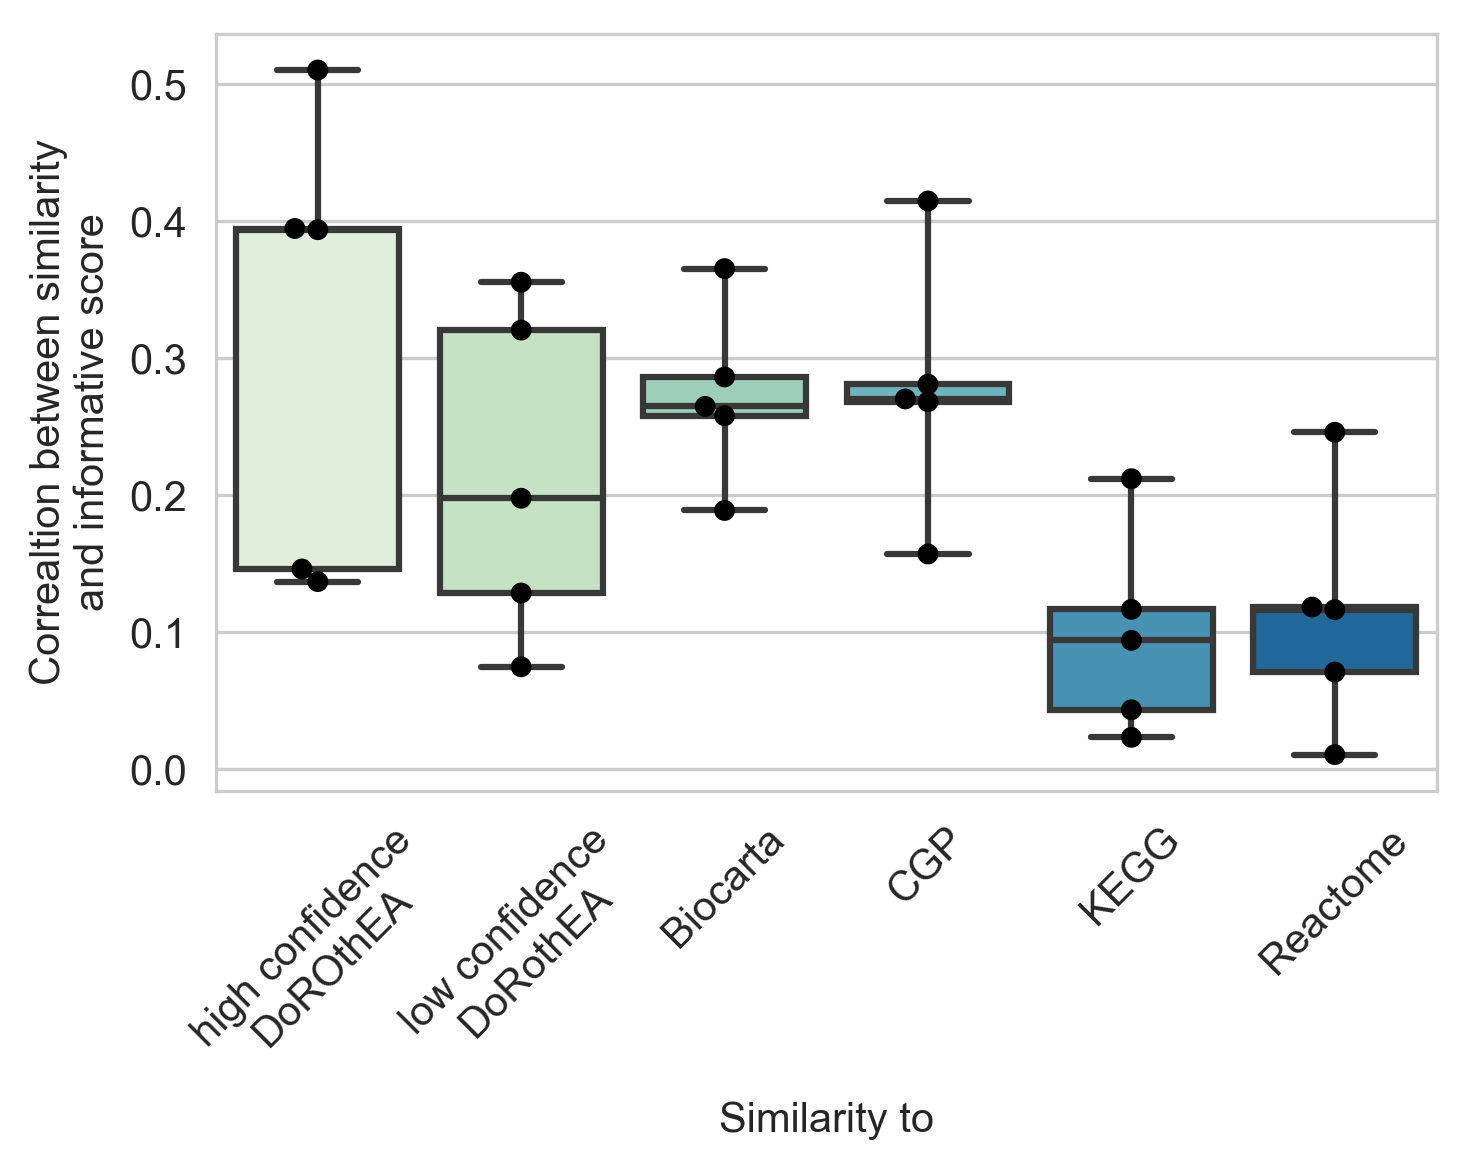

In [152]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='progeny',sim_type='overlap')
plt.savefig('../figures/raw/SFig6A.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.107250  0.021450  1.768922  0.159191
dd_to      1.0  0.035920  0.035920  2.962224  0.098657
Residual  23.0  0.278897  0.012126       NaN       NaN

Intercept                 0.011480
to[T.BEST_dorothea_CD]    0.410558
to[T.BIOCARTA]            0.399731
to[T.CGP]                 0.426423
to[T.KEGG]                0.469174
to[T.REACTOME]            0.079341
dtype: float64

Intercept                 0.140582
to[T.BEST_dorothea_CD]   -0.060831
to[T.BIOCARTA]           -0.062271
to[T.CGP]                 0.058764
to[T.KEGG]               -0.053419
to[T.REACTOME]           -0.133084
dtype: float64


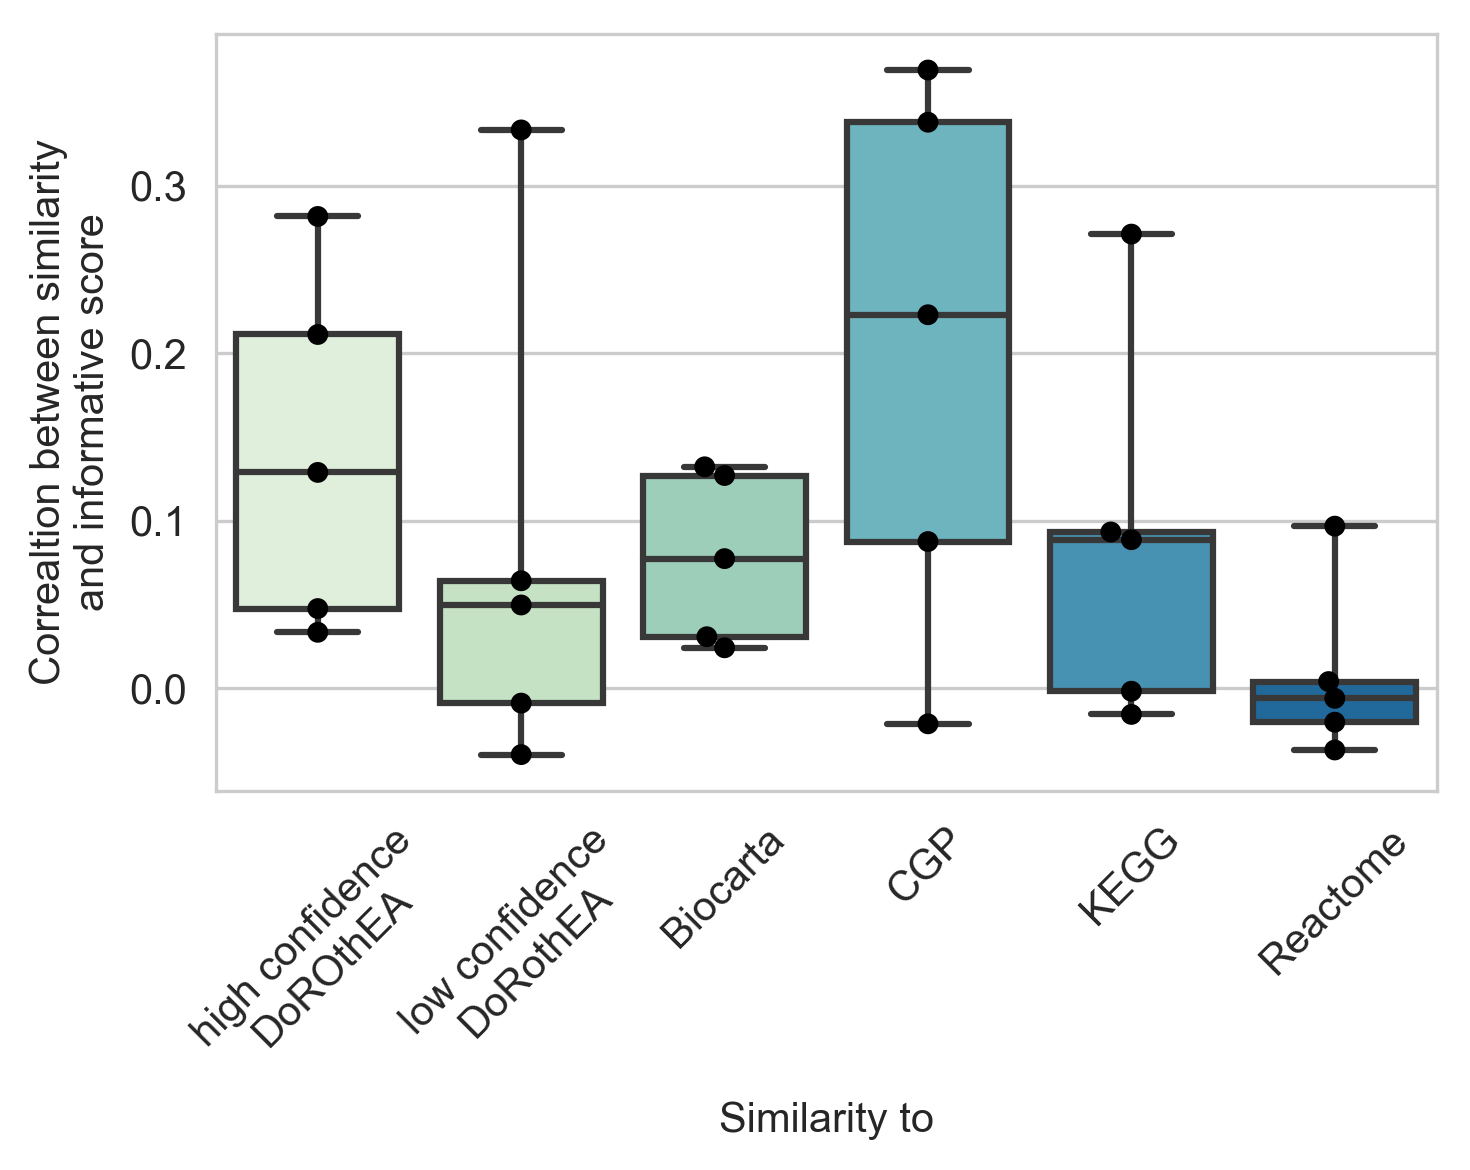

In [153]:
results=analyse_pairwise_correaltions(abs_type='',bname='progeny',sim_type='jaccard')
plt.savefig('../figures/raw/SFig6B.pdf')

            df    sum_sq   mean_sq         F   PR(>F)
of         5.0  0.079456  0.015891  1.776282  0.15762
dd_to      1.0  0.048896  0.048896  5.465447  0.02846
Residual  23.0  0.205765  0.008946       NaN      NaN

Intercept                 0.000011
to[T.BEST_dorothea_CD]    0.201111
to[T.BIOCARTA]            0.775569
to[T.CGP]                 0.488627
to[T.KEGG]                0.009825
to[T.REACTOME]            0.021707
dtype: float64

Intercept                 0.216350
to[T.BEST_dorothea_CD]   -0.072649
to[T.BIOCARTA]           -0.015936
to[T.CGP]                 0.038871
to[T.KEGG]               -0.155002
to[T.REACTOME]           -0.135696
dtype: float64


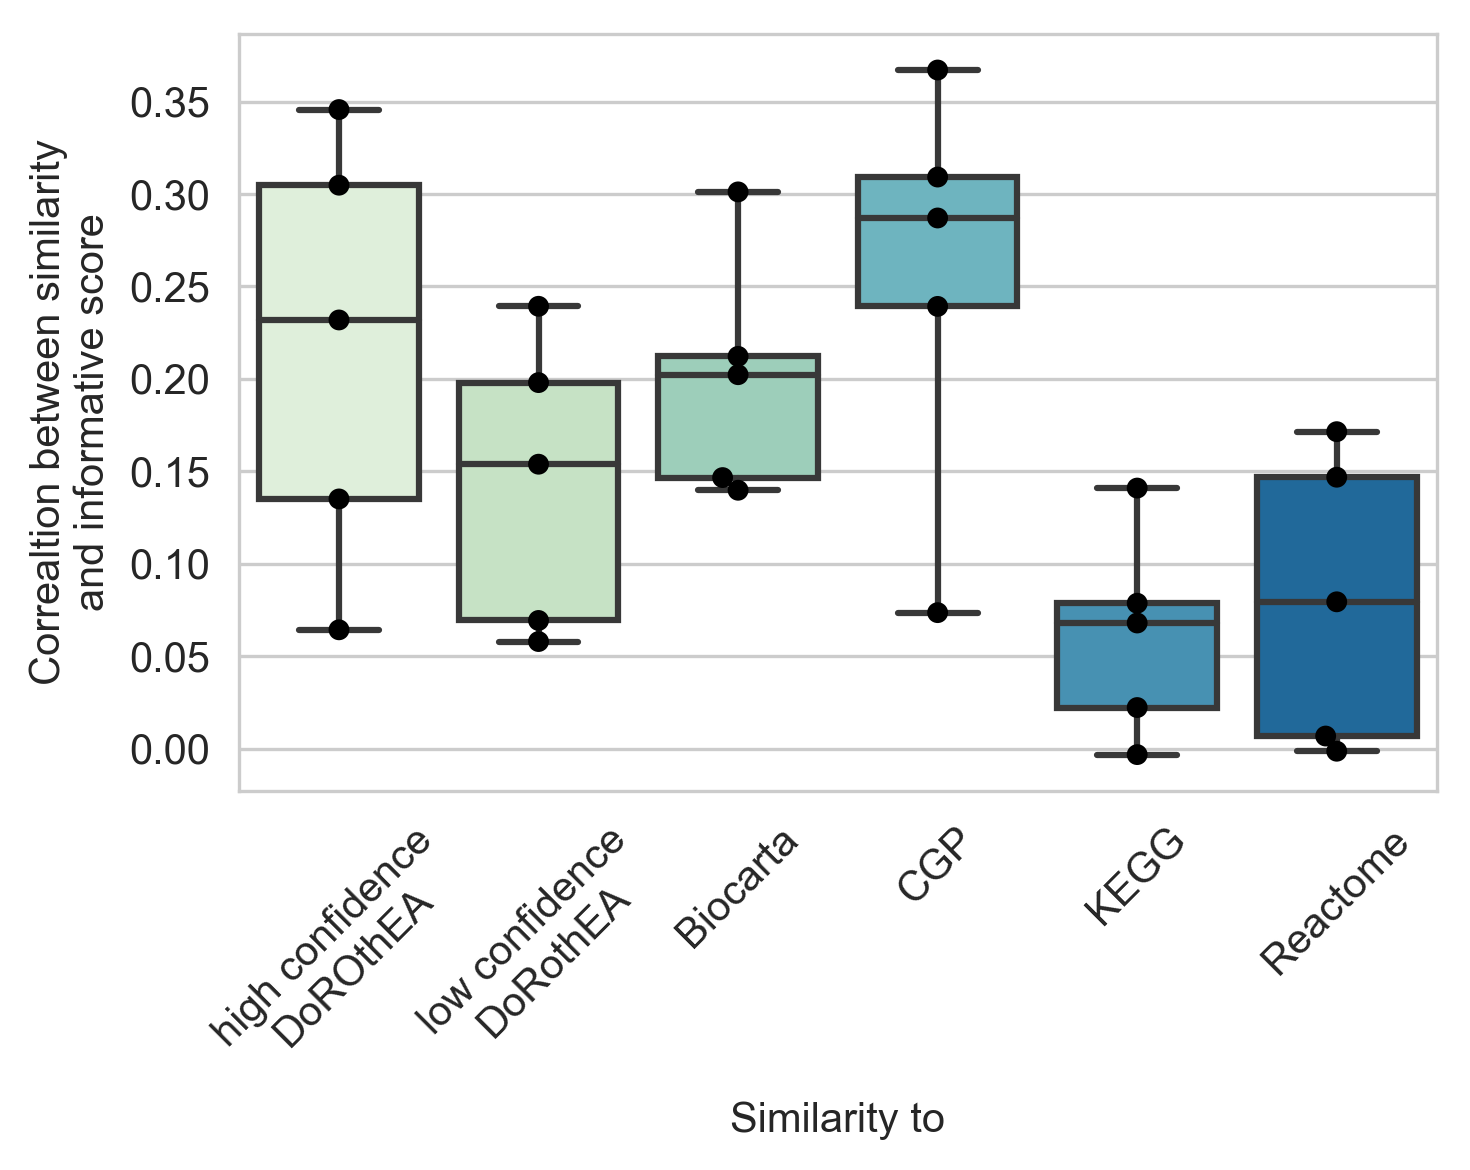

In [154]:
results=analyse_pairwise_correaltions(abs_type='',bname='progeny',sim_type='overlap')
plt.savefig('../figures/raw/SFig6C.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.152562  0.030512  2.741758  0.043824
dd_to      1.0  0.050847  0.050847  4.568960  0.043412
Residual  23.0  0.255961  0.011129       NaN       NaN

Intercept                 0.000616
to[T.BEST_dorothea_CD]    0.460654
to[T.BIOCARTA]            0.075047
to[T.CGP]                 0.039132
to[T.KEGG]                0.065345
to[T.REACTOME]            0.052692
dtype: float64

Intercept                 0.211831
to[T.BEST_dorothea_CD]   -0.057043
to[T.BIOCARTA]           -0.141573
to[T.CGP]                -0.165998
to[T.KEGG]               -0.146922
to[T.REACTOME]           -0.155060
dtype: float64


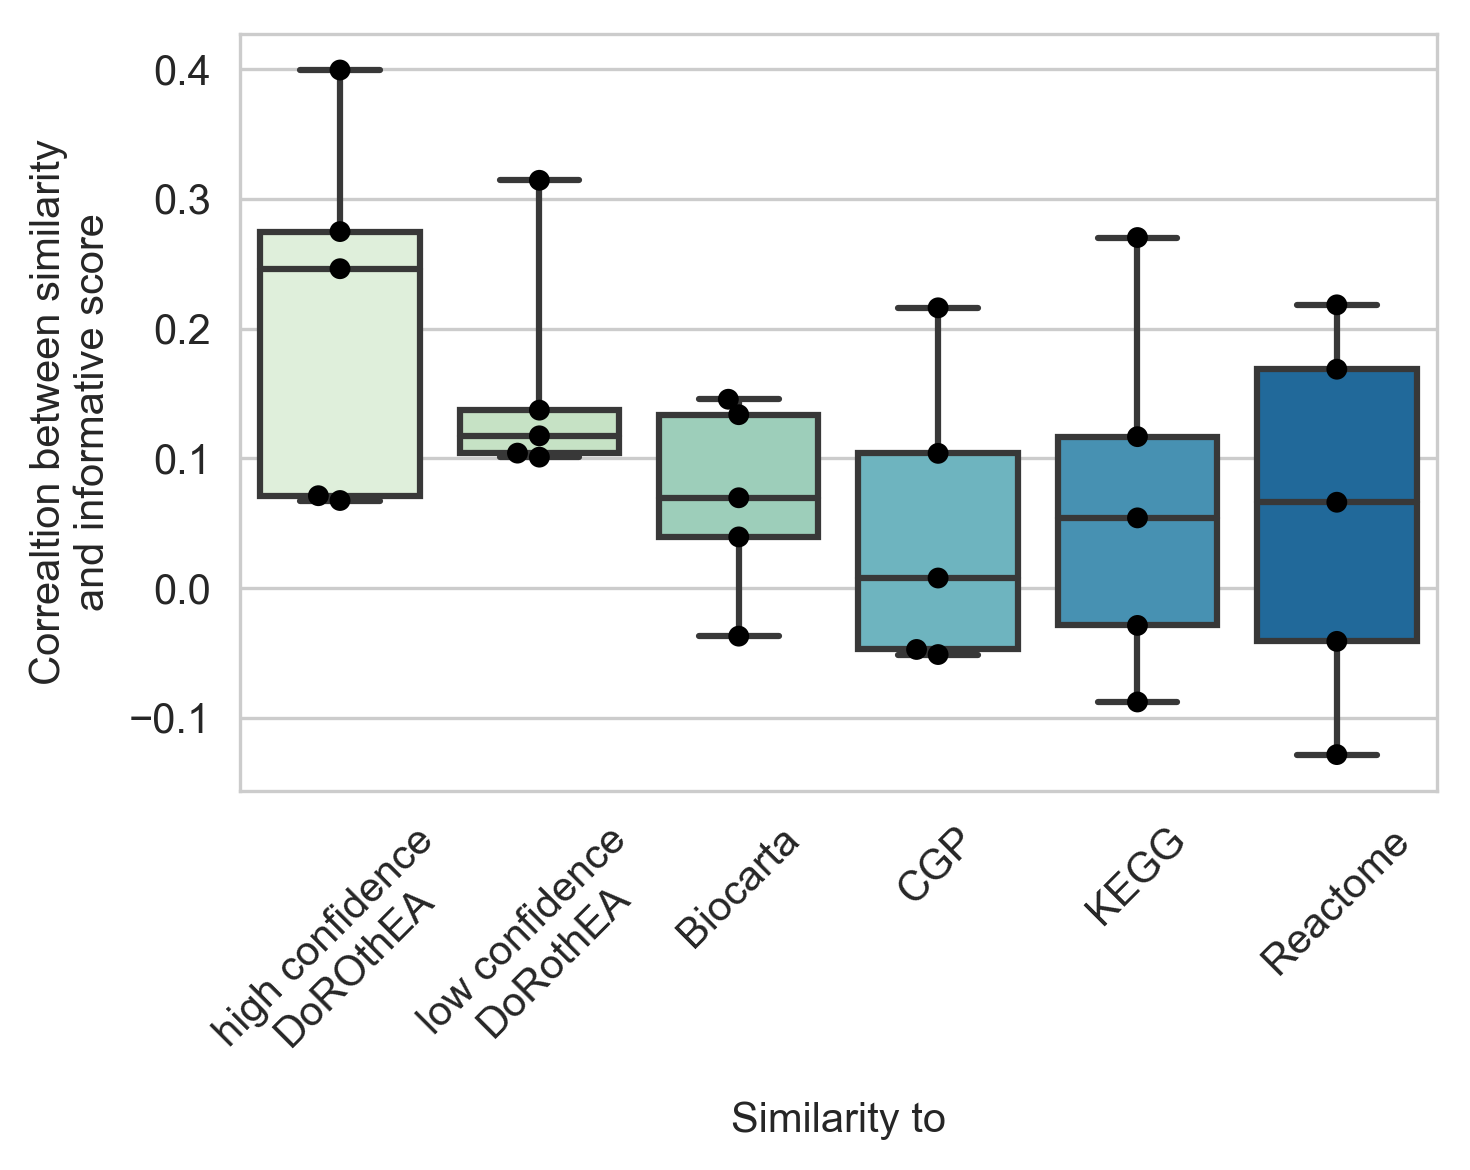

In [155]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='gdsc',sim_type='overlap')
plt.savefig('../figures/raw/SFig6D.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.140079  0.028016  4.838764  0.003612
dd_to      1.0  0.034005  0.034005  5.873180  0.023647
Residual  23.0  0.133167  0.005790       NaN       NaN

Intercept                 0.011084
to[T.BEST_dorothea_CD]    0.408276
to[T.BIOCARTA]            0.068727
to[T.CGP]                 0.195974
to[T.KEGG]                0.126438
to[T.REACTOME]            0.012046
dtype: float64

Intercept                 0.119508
to[T.BEST_dorothea_CD]   -0.051681
to[T.BIOCARTA]           -0.117019
to[T.CGP]                -0.081674
to[T.KEGG]               -0.097220
to[T.REACTOME]           -0.166791
dtype: float64


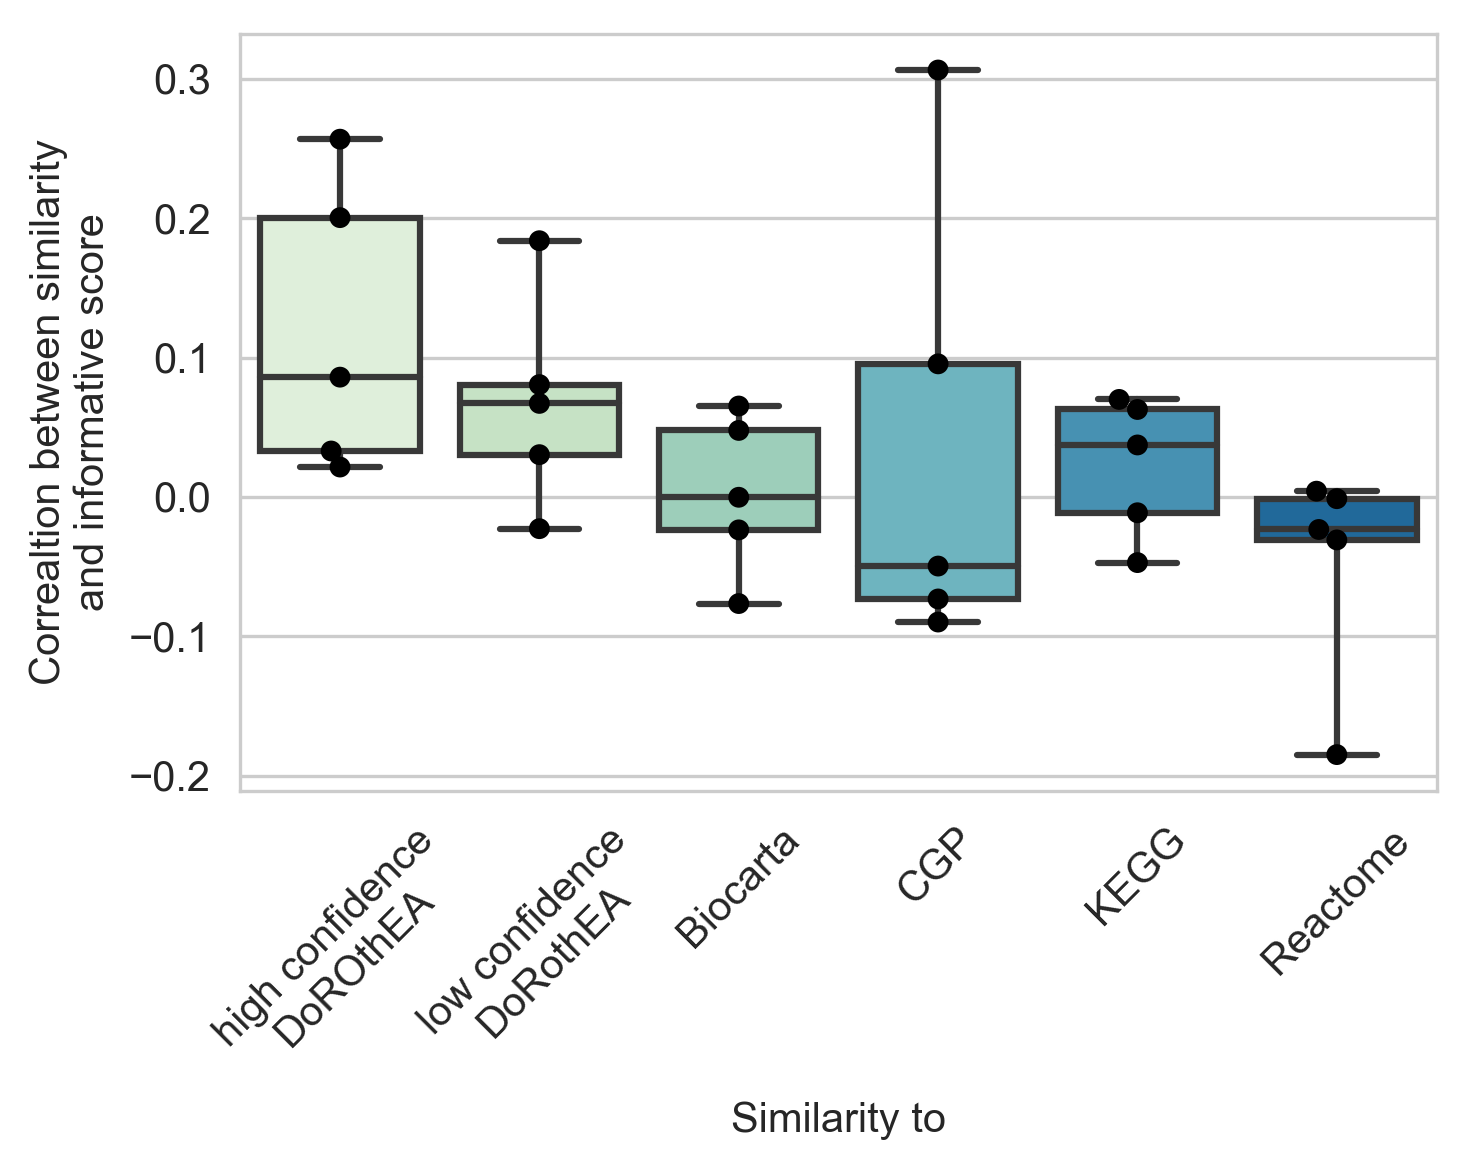

In [156]:
results=analyse_pairwise_correaltions(abs_type='',bname='gdsc',sim_type='jaccard')
plt.savefig('../figures/raw/SFig6E.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.074326  0.014865  2.328308  0.075273
dd_to      1.0  0.023156  0.023156  3.626955  0.069433
Residual  23.0  0.146844  0.006385       NaN       NaN

Intercept                 0.002756
to[T.BEST_dorothea_CD]    0.156766
to[T.BIOCARTA]            0.253358
to[T.CGP]                 0.123217
to[T.KEGG]                0.065872
to[T.REACTOME]            0.005153
dtype: float64

Intercept                 0.126361
to[T.BEST_dorothea_CD]   -0.078297
to[T.BIOCARTA]           -0.062685
to[T.CGP]                -0.085570
to[T.KEGG]               -0.103225
to[T.REACTOME]           -0.164860
dtype: float64


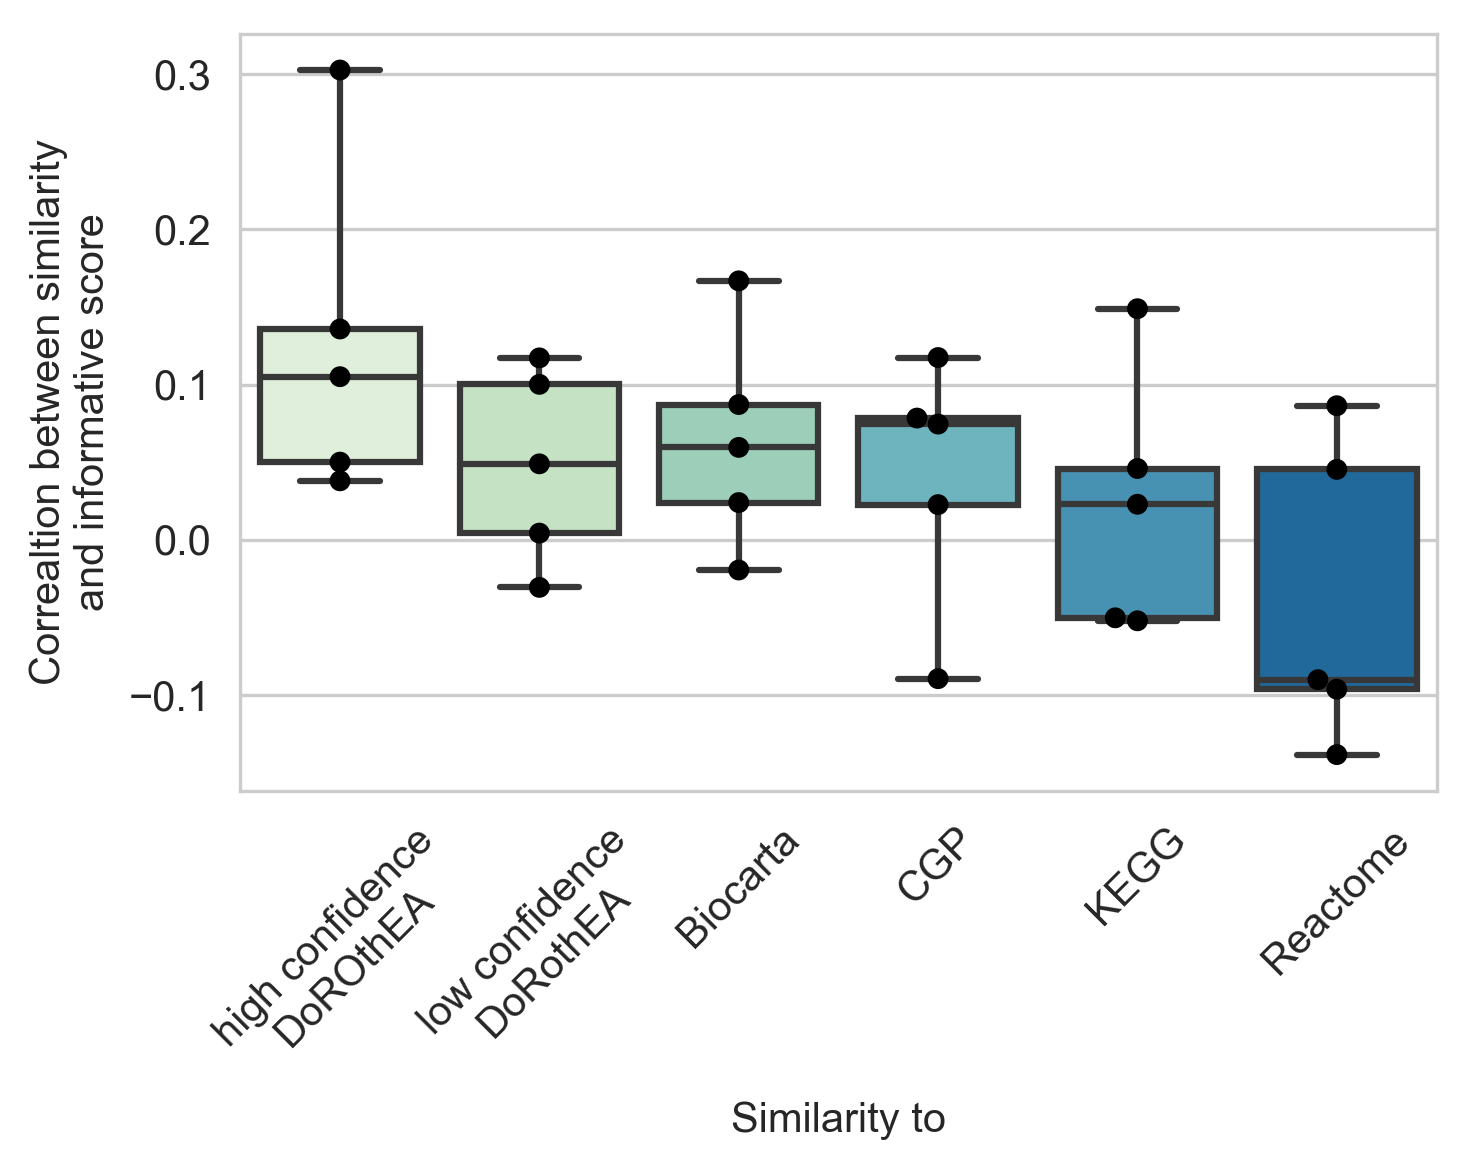

In [157]:
results=analyse_pairwise_correaltions(abs_type='',bname='gdsc',sim_type='overlap')
plt.savefig('../figures/raw/SFig6F.pdf')

In [295]:
def plot_overlap(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs'):
    good1=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname1,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname2,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname1,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname2,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
    
    row_index=pd.Series(range(len(score_overlap.index)),index=score_overlap.index)
    col_index=pd.Series(range(len(score_overlap.columns)),index=score_overlap.columns)
    score_overlap=score_overlap.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_1minus2.index)),index=score_1minus2.index)
    col_index=pd.Series(range(len(score_1minus2.columns)),index=score_1minus2.columns)
    score_1minus2=score_1minus2.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_2minus1.index)),index=score_2minus1.index)
    col_index=pd.Series(range(len(score_2minus1.columns)),index=score_2minus1.columns)
    score_2minus1=score_2minus1.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score1.index)),index=score1.index)
    col_index=pd.Series(range(len(score1.columns)),index=score1.columns)
    score1=score1.values[list(row_index[goods['Group']].values),list(col_index[goods[dname1]].values)]

    row_index=pd.Series(range(len(score2.index)),index=score2.index)
    col_index=pd.Series(range(len(score2.columns)),index=score2.columns)
    score2=score2.values[list(row_index[goods['Group']].values),list(col_index[goods[dname2]].values)]
    
    results=pd.DataFrame(index=range(len(score_overlap)))
    results[dname1]=score1
    results[dname2]=score2
    results[dname1+' & '+dname2]=score_overlap
    results[dname1+' - '+dname2]=score_1minus2
    results[dname2+' - '+dname1]=score_2minus1
    
    geneset1=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname1,sep=',',header=0,index_col=0)
    geneset2=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname2,sep=',',header=0,index_col=0)
    if dname1 < dname2:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname1,dname2),
                                   sep=',',header=0,index_col=0)
    else:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname2,dname1),
                                   sep=',',header=0,index_col=0)
    geneset_1minus2=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname1,dname2),
                                sep=',',header=0,index_col=0)
    geneset_2minus1=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname2,dname1),
                                sep=',',header=0,index_col=0)
    geneset1=geneset1['Set'].value_counts()
    geneset2=geneset2['Set'].value_counts()
    geneset_overlap=geneset_overlap['Set'].value_counts()
    geneset_1minus2=geneset_1minus2['Set'].value_counts()
    geneset_2minus1=geneset_2minus1['Set'].value_counts()
    geneset1=geneset1[goods[dname1]].values
    geneset2=geneset2[goods[dname2]].values
    geneset_overlap=geneset_overlap[goods['Name']].values
    geneset_1minus2=geneset_1minus2[goods['Name']].values
    geneset_2minus1=geneset_2minus1[goods['Name']].values
    results_genesets=pd.DataFrame(index=range(len(geneset_overlap)))
    results_genesets[dname1]=geneset1
    results_genesets[dname2]=geneset2
    results_genesets[dname1+' & '+dname2]=geneset_overlap
    results_genesets[dname1+' - '+dname2]=geneset_1minus2
    results_genesets[dname2+' - '+dname1]=geneset_2minus1
    #print(dname1,mwu(results[dname1],results[dname1+' - '+dname2]))
    print(dname1,np.median(results[dname1]),np.median(results[dname1+' - '+dname2]))
    
    #print(dname2,mwu(results[dname2],results[dname2+' - '+dname1]))
    print(dname2,np.median(results[dname2]),np.median(results[dname2+' - '+dname1]))
    #print(mwu(results[dname1+' - '+dname2],results[dname2+' - '+dname1]))
    #print(mwu(results[dname1],results[dname2]))
    #print(mwu(results_genesets[dname1+' - '+dname2],results_genesets[dname2+' - '+dname1]))
    results=pd.melt(results)
    results.columns=['Gene set','Informative score']
    results_genesets=pd.melt(results_genesets)
    results_genesets.columns=['Gene set','Size']
    return results

In [318]:
dname1='KEGG'
dname2='BIOCARTA'
results=plot_overlap(dname1=dname1,dname2=dname2,bname='progeny',atype='_abs')

KEGG 7.729304535307582 7.152062851307657
BIOCARTA 6.756481238224173 5.173939613042002


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


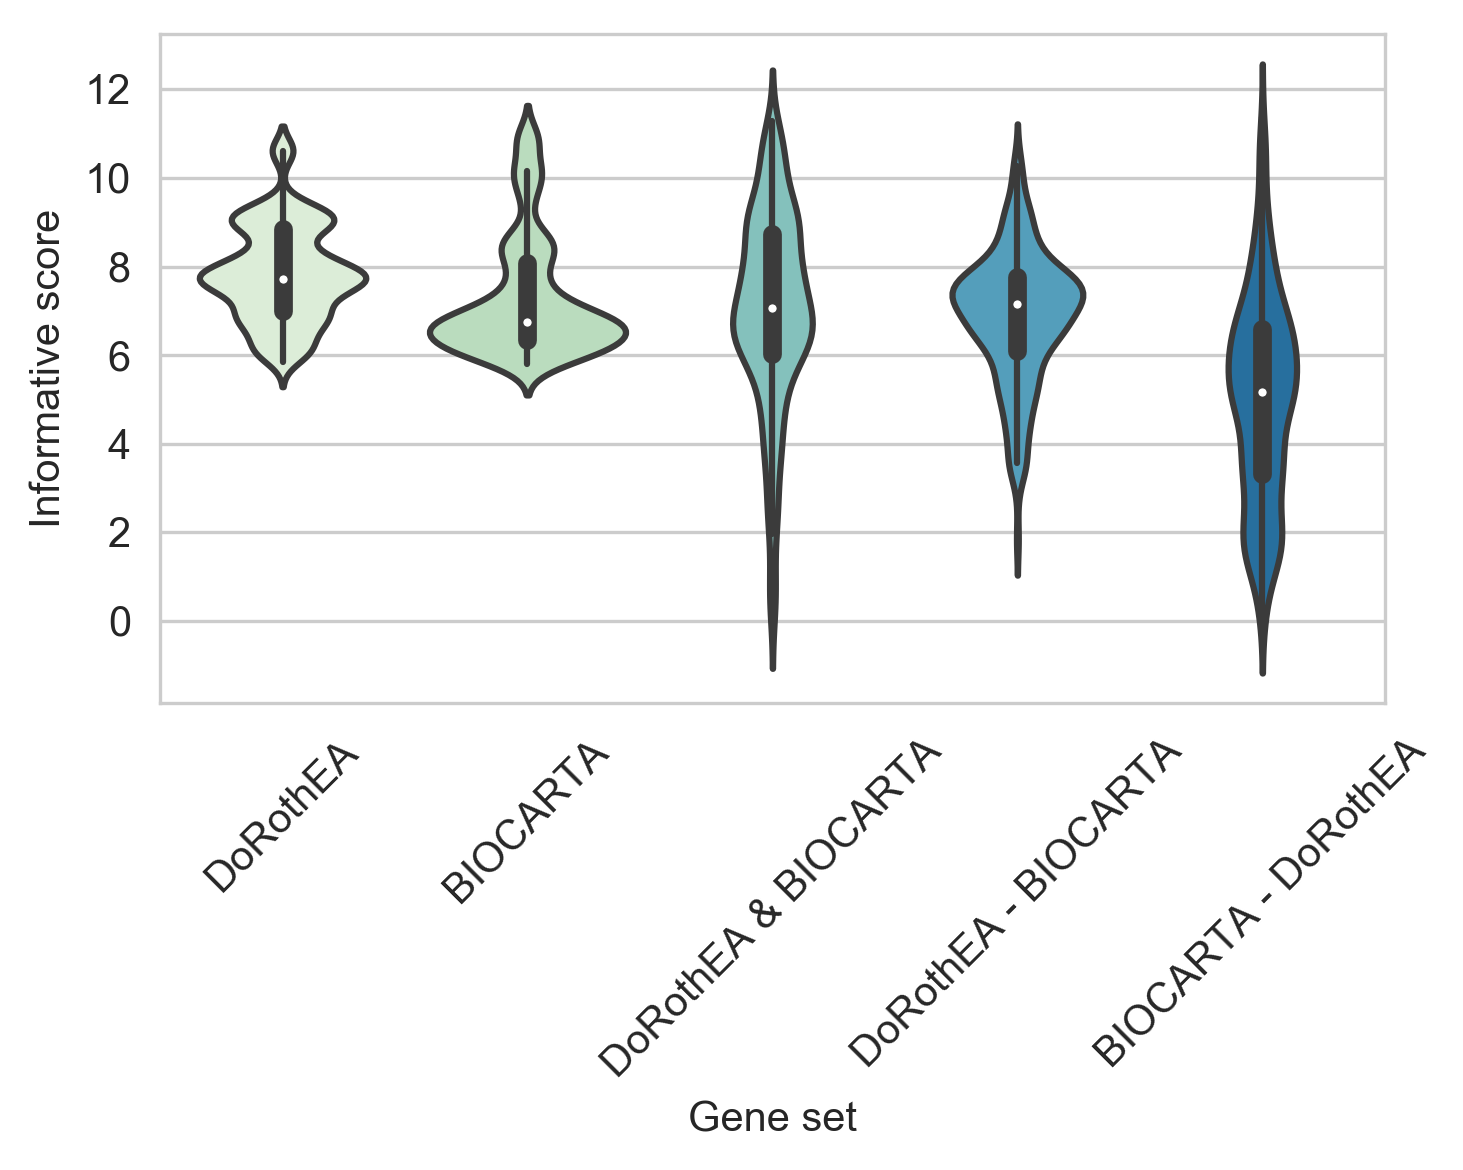

In [319]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',5)
sns.violinplot(x='Gene set',y='Informative score',data=results)
plt.xticks(rotation=45)
plt.xticks([0,1,2,3,4],['DoRothEA','BIOCARTA','DoRothEA & BIOCARTA','DoRothEA - BIOCARTA','BIOCARTA - DoRothEA'])
plt.tight_layout()
#plt.savefig('../figures/raw/Fig5A.pdf')

In [169]:
all_size=pd.DataFrame(columns=['Set','Size'])
all_scores=pd.DataFrame(columns=['Set','Score'])
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
for geneset in datasets:
    size=pd.read_csv('../results/genesets/single/csvs/'+geneset+'_filet.csv',sep=',',header=0,index_col=0)['Set'].value_counts()
    size=pd.DataFrame(size)
    size['X']=geneset
    size.columns=['Size','Set']
    size=size[['Set','Size']]
    all_size=pd.concat([all_size,size])
    score=pd.read_csv('../results/benchmark/z_scores/gdsc/single/'+geneset+'_random_abs.csv',
                   sep=',',header=0,index_col=0).abs().max()
    score=pd.DataFrame(score)
    score['X']=geneset
    score.columns=['Score','Set']
    score=score[['Set','Score']]
    all_scores=pd.concat([all_scores,score])
    
all_size=all_size.loc[all_scores.index]
all_size=all_size.iloc[::-1,]
all_scores=all_scores.iloc[::-1,]

In [171]:
all_size.shape

(35922, 2)

In [165]:
all_scores

Set     Score
0                  CGP  3.002567
1                  CGP  3.374517
2                  CGP  3.253608
3                  CGP  2.843326
4                  CGP  2.389046
5                  CGP  3.647304
6                  CGP  2.995878
7                  CGP  3.560483
8                  CGP  2.217538
9                  CGP  3.081587
10                 CGP  4.754409
11                 CGP  2.995457
12                 CGP  2.920755
13                 CGP  3.225673
14                 CGP  2.328431
15                 CGP  2.890245
16                 CGP  3.588360
17                 CGP  4.135149
18                 CGP  2.361411
19                 CGP  5.057007
20                 CGP  2.597402
21                 CGP  3.997346
22                 CGP  2.308530
23                 CGP  2.771645
24                 CGP  3.027858
25                 CGP  3.583650
26                 CGP  2.672161
27                 CGP  2.458475
28                 CGP  3.833433
29                 CGP  3.332584
...                ...       ...
5957  BEST_dorothea_AB  2.280909
5958  BEST_dorothea_AB  4.362438
5959  BEST_dorothea_AB  2.628363
5960  BEST_dorothea_AB  2.578474
5961  BEST_dorothea_AB  2.466852
5962  BEST_dorothea_AB  3.701910
5963  BEST_dorothea_AB  5.011236
5964  BEST_dorothea_AB  2.996652
5965  BEST_dorothea_AB  3.727124
5966  BEST_dorothea_AB  3.536603
5967  BEST_dorothea_AB  3.858628
5968  BEST_dorothea_AB  4.830510
5969  BEST_dorothea_AB  4.066158
5970  BEST_dorothea_AB  2.855447
5971  BEST_dorothea_AB  4.097982
5972  BEST_dorothea_AB  2.502788
5973  BEST_dorothea_AB  3.344196
5974  BEST_dorothea_AB  3.398798
5975  BEST_dorothea_AB  3.698031
5976  BEST_dorothea_AB  2.766409
5977  BEST_dorothea_AB  3.196114
5978  BEST_dorothea_AB  4.249926
5979  BEST_dorothea_AB  4.209625
5980  BEST_dorothea_AB  4.217673
5981  BEST_dorothea_AB  3.400231
5982  BEST_dorothea_AB  5.615192
5983  BEST_dorothea_AB  2.892326
5984  BEST_dorothea_AB  4.331812
5985  BEST_dorothea_AB  2.923553
5986  BEST_dorothea_AB  4.459027

[5987 rows x 2 columns]

In [167]:
all_scores['Size']=all_size['Size'].astype(float)
all_scores['logSize']=np.log10(all_scores['Size'])

ValueError: cannot reindex from a duplicate axis

In [164]:
model = ols('Score ~ Size + Set',data=all_scores).fit()

PatsyError: Error evaluating factor: NameError: name 'Size' is not defined
    Score ~ Size + Set
            ^^^^

In [29]:
model.pvalues

Intercept                  1.861948e-299
Set[T.BEST_dorothea_CD]     4.427169e-06
Set[T.BIOCARTA]             1.259985e-09
Set[T.CGP]                  4.003211e-05
Set[T.KEGG]                 8.586881e-06
Set[T.REACTOME]             6.958556e-13
Size                        9.525251e-14
dtype: float64

(0.18717852777388722, 5.315752974862208e-40)
CGP (0.18742466826163076, 1.3907096435330254e-23)
REACTOME (0.17067498362001235, 6.163748259733983e-10)
BIOCARTA (0.04019297351183162, 0.5045160152550738)
KEGG (0.15845033390698166, 0.03363137293126007)
BEST_dorothea_CD (0.092177980519195, 0.14779337509209656)
BEST_dorothea_AB (0.3240851636743959, 0.0005864299843948826)


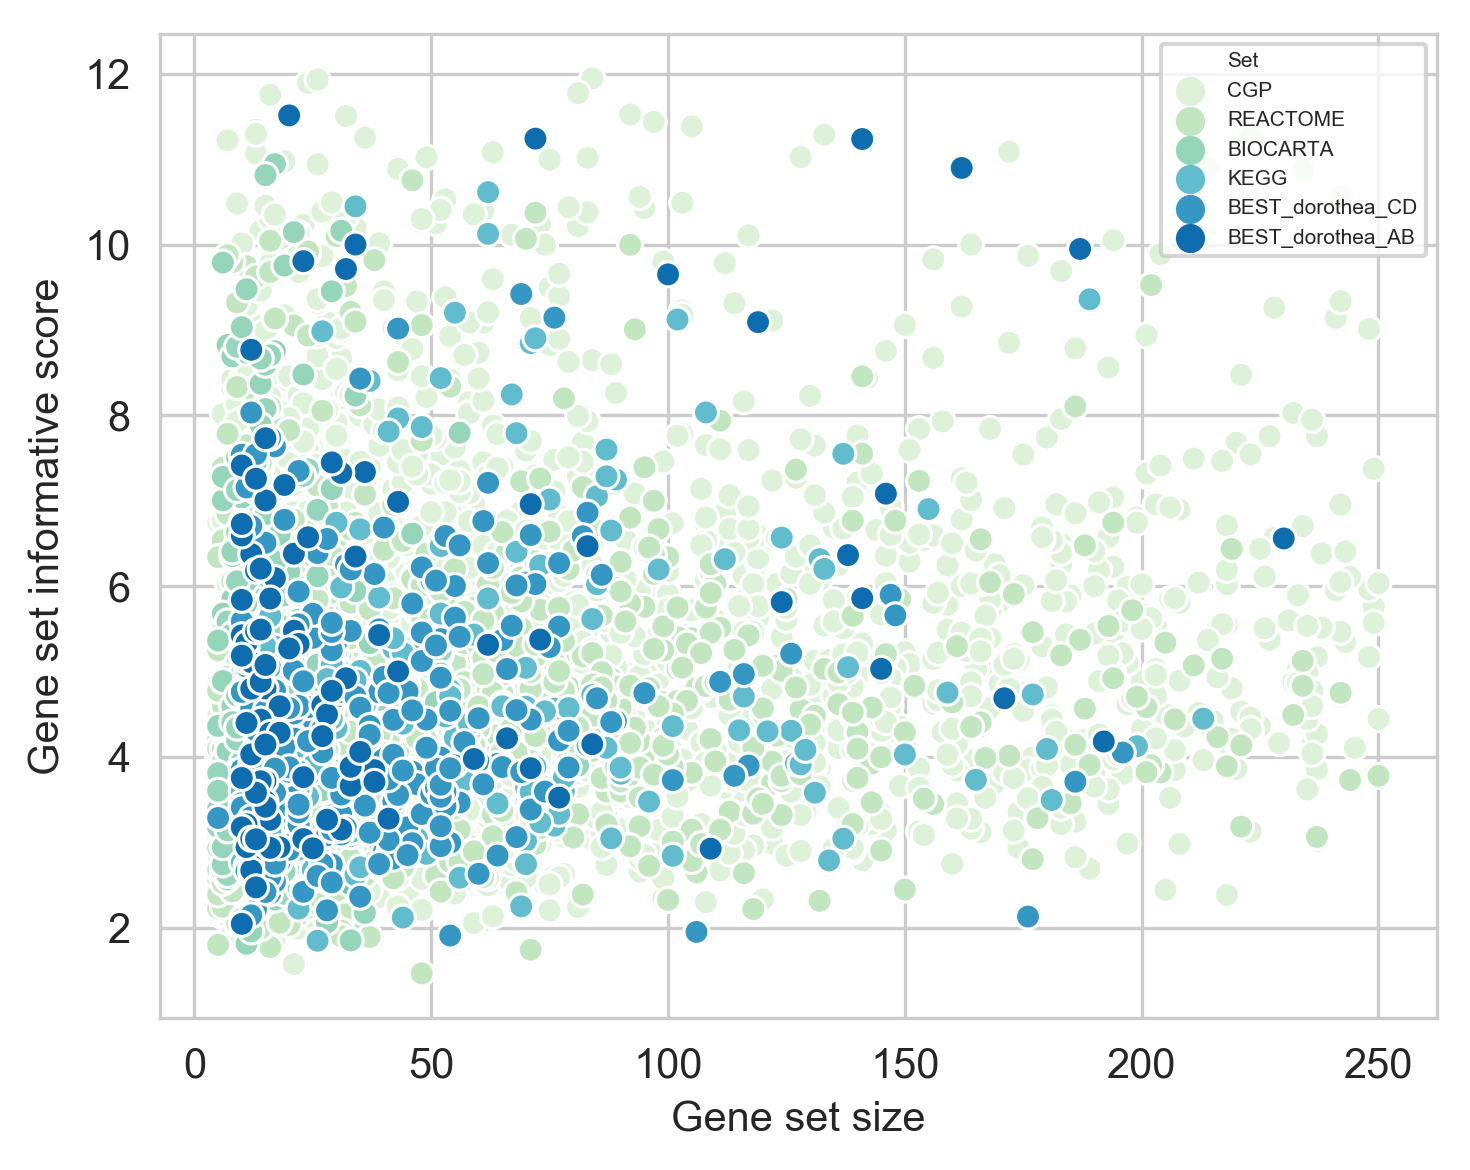

In [211]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',6)
sns.scatterplot(all_size['Size'],all_scores['Score'],hue=all_scores['Set'])
plt.xlabel('Gene set size')
plt.ylabel('Gene set informative score')
plt.legend(prop={"size":5})
print(pcor(all_size['Size'],all_scores['Score']))
for s in all_scores['Set'].unique():
    fil=all_scores['Set']==s
    print(s,pcor(all_size['Size'][fil],all_scores['Score'][fil]))
plt.tight_layout()
plt.savefig('../figures/raw/SFig7C.pdf')

In [190]:
def calc_overlap(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs'):
    good1=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname1,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname2,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname1,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname2,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
    
    row_index=pd.Series(range(len(score_overlap.index)),index=score_overlap.index)
    col_index=pd.Series(range(len(score_overlap.columns)),index=score_overlap.columns)
    score_overlap=score_overlap.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_1minus2.index)),index=score_1minus2.index)
    col_index=pd.Series(range(len(score_1minus2.columns)),index=score_1minus2.columns)
    score_1minus2=score_1minus2.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_2minus1.index)),index=score_2minus1.index)
    col_index=pd.Series(range(len(score_2minus1.columns)),index=score_2minus1.columns)
    score_2minus1=score_2minus1.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score1.index)),index=score1.index)
    col_index=pd.Series(range(len(score1.columns)),index=score1.columns)
    score1=score1.values[list(row_index[goods['Group']].values),list(col_index[goods[dname1]].values)]

    row_index=pd.Series(range(len(score2.index)),index=score2.index)
    col_index=pd.Series(range(len(score2.columns)),index=score2.columns)
    score2=score2.values[list(row_index[goods['Group']].values),list(col_index[goods[dname2]].values)]
    results=pd.DataFrame(index=range(len(score_overlap)))
    
    results[dname1]=score1
    results[dname2]=score2
    results[dname1+' & '+dname2]=score_overlap
    results[dname1+' - '+dname2]=score_1minus2
    results[dname2+' - '+dname1]=score_2minus1
    
    delta1= np.median(results[dname1+' - '+dname2]) - np.median(results[dname1])
    delta2= np.median(results[dname2+' - '+dname1]) - np.median(results[dname2])
    return delta1,delta2

In [191]:
def plot_median_info_score1(bname='progeny',atype='_abs',plotname='Fig5B'):
    results=pd.DataFrame(columns=['Set1','Set2','Score'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            if dname1 < dname2:
                s1,s2=calc_overlap(dname1,dname2,bname=bname,atype=atype)
                data=pd.DataFrame(index=range(len(results),len(results)+2),columns=results.columns)
                data['Set1']=[dname1,dname2]
                data['Set2']=[dname2,dname1]
                data['Score']=[s1,s2]
                results=pd.concat([results,data])
    results['Data_driven']=False
    fil=np.in1d(results['Set1'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results.loc[results.index[fil],'Data_driven']=True
    #fil=np.in1d(results['Set2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    #results=results[fil]
    results=results.sort_values('Set1')

    model = ols('Score ~ Set2 + Data_driven',data=results).fit()
    print(sm.stats.anova_lm(model))
    model = ols('Score ~ Set1',data=results).fit()
    print('')
    print(model.pvalues)
    plt.figure(figsize=(5,4),dpi=300)
    results.columns=['Remaining gene set','Set2','Score','Data_driven']
    sns.set_palette('GnBu',6)
    sns.boxplot(y='Score',x='Remaining gene set',data=results,whis=100)
    sns.swarmplot(y='Score',x='Remaining gene set',data=results,color='k')
    plt.xticks([0,1,2,3,4,5],['high confidence\nDoROthEA',
                             'low confidence\nDoRothEA',
                             'Biocarta',
                             'CGP',
                             'KEGG',
                             'Reactome'],rotation=45)
    plt.xlabel('Remaining gene set')
    plt.ylabel('Median informative score change')
    plt.tight_layout()
    if plotname:
        plt.savefig('../figures/raw/%s.pdf' % plotname)

In [192]:
def plot_median_info_score2(bname='progeny',atype='_abs',plotname='Fig5B'):
    results=pd.DataFrame(columns=['Set1','Set2','Score'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            if dname1 < dname2:
                s1,s2=calc_overlap(dname1,dname2,bname=bname,atype=atype)
                data=pd.DataFrame(index=range(len(results),len(results)+2),columns=results.columns)
                data['Set1']=[dname1,dname2]
                data['Set2']=[dname2,dname1]
                data['Score']=[s1,s2]
                results=pd.concat([results,data])
    results['Data_driven']=False
    fil=np.in1d(results['Set2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results.loc[results.index[fil],'Data_driven']=True
    #fil=np.in1d(results['Set2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    #results=results[fil]
    results=results.sort_values('Set2')

    model = ols('Score ~ Set1 + Data_driven',data=results).fit()
    print(sm.stats.anova_lm(model))
    model = ols('Score ~ Set2',data=results).fit()
    print('')
    print(model.pvalues)
    plt.figure(figsize=(5,4),dpi=300)
    results.columns=['Set1','Removed gene set','Score','Data_driven']
    sns.set_palette('GnBu',6)
    sns.boxplot(y='Score',x='Removed gene set',data=results,whis=100)
    sns.swarmplot(y='Score',x='Removed gene set',data=results,color='k')
    plt.xticks([0,1,2,3,4,5],['high confidence\nDoROthEA',
                             'low confidence\nDoRothEA',
                             'Biocarta',
                             'CGP',
                             'KEGG',
                             'Reactome'],rotation=45)
    plt.xlabel('Removed gene set')
    plt.ylabel('Median informative score change')
    plt.tight_layout()
    if plotname:
        plt.savefig('../figures/raw/%s.pdf' % plotname)

In [195]:
def calc_overlap_size(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs'):
    good1=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname1,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname2,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname1,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname2,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
    geneset1=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname1,sep=',',header=0,index_col=0)
    geneset2=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname2,sep=',',header=0,index_col=0)
    if dname1 < dname2:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname1,dname2),
                                   sep=',',header=0,index_col=0)
    else:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname2,dname1),
                                   sep=',',header=0,index_col=0)
    geneset_1minus2=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname1,dname2),
                                sep=',',header=0,index_col=0)
    geneset_2minus1=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname2,dname1),
                                sep=',',header=0,index_col=0)
    geneset1=geneset1['Set'].value_counts()
    geneset2=geneset2['Set'].value_counts()
    geneset_overlap=geneset_overlap['Set'].value_counts()
    geneset_1minus2=geneset_1minus2['Set'].value_counts()
    geneset_2minus1=geneset_2minus1['Set'].value_counts()
    geneset1=geneset1[goods[dname1]].values
    geneset2=geneset2[goods[dname2]].values
    geneset_overlap=geneset_overlap[goods['Name']].values
   
    geneset_1minus2=geneset_1minus2[goods['Name']].values
    geneset_2minus1=geneset_2minus1[goods['Name']].values
    results_genesets=pd.DataFrame(index=range(len(geneset_overlap)))
    
    results_genesets[dname1]=geneset1
    results_genesets[dname2]=geneset2
    results_genesets[dname1+' & '+dname2]=geneset_overlap
    results_genesets[dname1+' - '+dname2]=geneset_1minus2
    results_genesets[dname2+' - '+dname1]=geneset_2minus1
    delta1= (np.median(results_genesets[dname1+' - '+dname2]) - np.median(results_genesets[dname1])) / np.median(results_genesets[dname1])
    delta2= (np.median(results_genesets[dname2+' - '+dname1]) - np.median(results_genesets[dname2])) / np.median(results_genesets[dname2])
    return delta1,delta2

In [202]:
def plot_median_info_size1(bname='progeny',atype='_abs',plotname='Fig5B'):
    results=pd.DataFrame(columns=['Set1','Set2','Score'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            if dname1 < dname2:
                s1,s2=calc_overlap_size(dname1,dname2,bname=bname,atype=atype)
                data=pd.DataFrame(index=range(len(results),len(results)+2),columns=results.columns)
                data['Set1']=[dname1,dname2]
                data['Set2']=[dname2,dname1]
                data['Score']=[s1,s2]
                results=pd.concat([results,data])
    results['Data_driven']=False
    fil=np.in1d(results['Set1'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results.loc[results.index[fil],'Data_driven']=True
    #fil=np.in1d(results['Set2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    #results=results[fil]
    results=results.sort_values('Set1')
    results['Score']*=100
    model = ols('Score ~ Set2 + Data_driven',data=results).fit()
    print(sm.stats.anova_lm(model))
    model = ols('Score ~ Set1',data=results).fit()
    print('')
    print(model.pvalues)
    plt.figure(figsize=(5,4),dpi=300)
    results.columns=['Remaining gene set','Set2','Score','Data_driven']
    sns.set_palette('GnBu',6)
    sns.boxplot(y='Score',x='Remaining gene set',data=results,whis=100)
    sns.swarmplot(y='Score',x='Remaining gene set',data=results,color='k')
    plt.xticks([0,1,2,3,4,5],['high confidence\nDoROthEA',
                             'low confidence\nDoRothEA',
                             'Biocarta',
                             'CGP',
                             'KEGG',
                             'Reactome'],rotation=45)
    plt.xlabel('Remaining gene set')
    plt.ylabel('Median gene set size change (%)')
    plt.tight_layout()
    if plotname:
        plt.savefig('../figures/raw/%s.pdf' % plotname)

In [203]:
def plot_median_info_size2(bname='progeny',atype='_abs',plotname='Fig5B'):
    results=pd.DataFrame(columns=['Set1','Set2','Score'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            if dname1 < dname2:
                s1,s2=calc_overlap_size(dname1,dname2,bname=bname,atype=atype)
                data=pd.DataFrame(index=range(len(results),len(results)+2),columns=results.columns)
                data['Set1']=[dname1,dname2]
                data['Set2']=[dname2,dname1]
                data['Score']=[s1,s2]
                results=pd.concat([results,data])
    results['Data_driven']=False
    fil=np.in1d(results['Set2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results.loc[results.index[fil],'Data_driven']=True
    #fil=np.in1d(results['Set2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    #results=results[fil]
    results=results.sort_values('Set2')
    results['Score']*=100
    model = ols('Score ~ Set1 +Data_driven',data=results).fit()
    print(sm.stats.anova_lm(model))
    model = ols('Score ~ Set2',data=results).fit()
    print('')
    print(model.pvalues)
    plt.figure(figsize=(5,4),dpi=300)
    results.columns=['Set1','Removed gene set','Score','Data_driven']
    sns.set_palette('GnBu',6)
    sns.boxplot(y='Score',x='Removed gene set',data=results,whis=100)
    sns.swarmplot(y='Score',x='Removed gene set',data=results,color='k')
    plt.xticks([0,1,2,3,4,5],['high confidence\nDoROthEA',
                             'low confidence\nDoRothEA',
                             'Biocarta',
                             'CGP',
                             'KEGG',
                             'Reactome'],rotation=45)
    plt.xlabel('Removed gene set')
    plt.ylabel('Median gene set size change (%)')
    plt.tight_layout()
    if plotname:
        plt.savefig('../figures/raw/%s.pdf' % plotname)

               df    sum_sq   mean_sq          F    PR(>F)
Set2          5.0  3.275995  0.655199   4.925796  0.003286
Data_driven   1.0  1.713366  1.713366  12.881113  0.001551
Residual     23.0  3.059318  0.133014        NaN       NaN

Intercept                   0.257169
Set1[T.BEST_dorothea_CD]    0.043419
Set1[T.BIOCARTA]            0.000025
Set1[T.CGP]                 0.107638
Set1[T.KEGG]                0.012800
Set1[T.REACTOME]            0.018455
dtype: float64


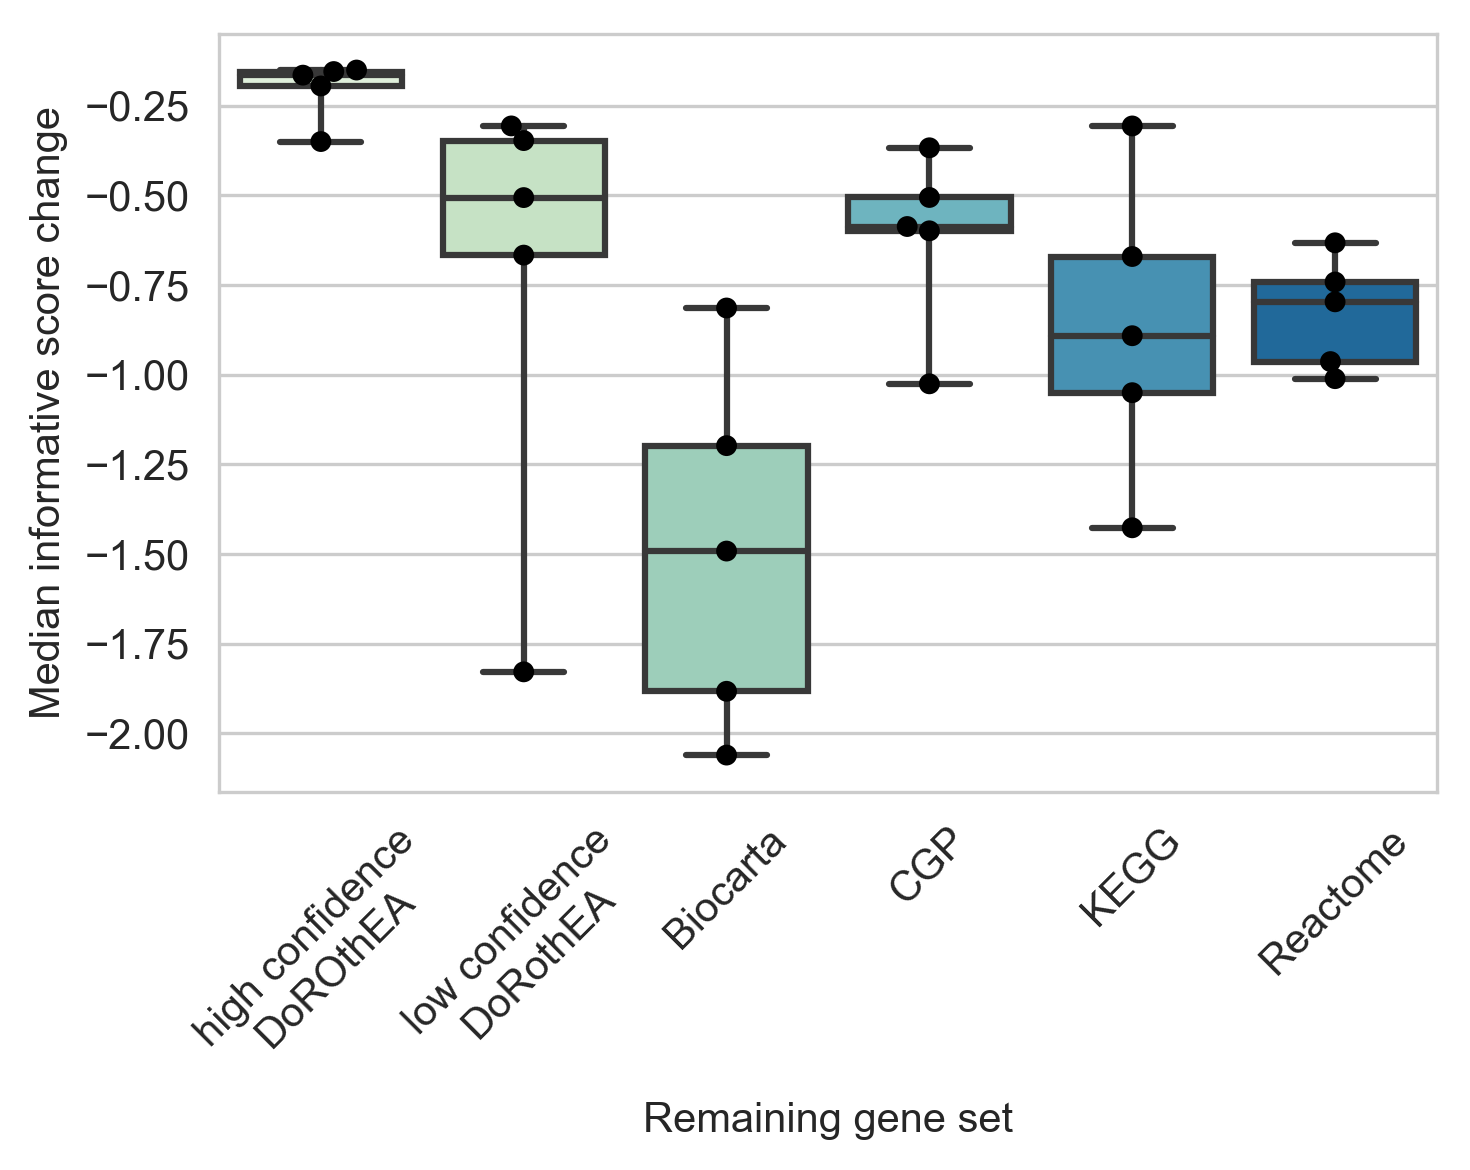

In [206]:
plot_median_info_score1(bname='progeny',atype='_abs',plotname='Fig5B')

               df    sum_sq   mean_sq         F    PR(>F)
Set1          5.0  4.372055  0.874411  6.529085  0.000646
Data_driven   1.0  0.596338  0.596338  4.452756  0.045930
Residual     23.0  3.080286  0.133925       NaN       NaN

Intercept                   1.298796e-07
Set2[T.BEST_dorothea_CD]    3.834416e-03
Set2[T.BIOCARTA]            2.380479e-03
Set2[T.CGP]                 5.822724e-02
Set2[T.KEGG]                1.120710e-02
Set2[T.REACTOME]            4.388203e-03
dtype: float64


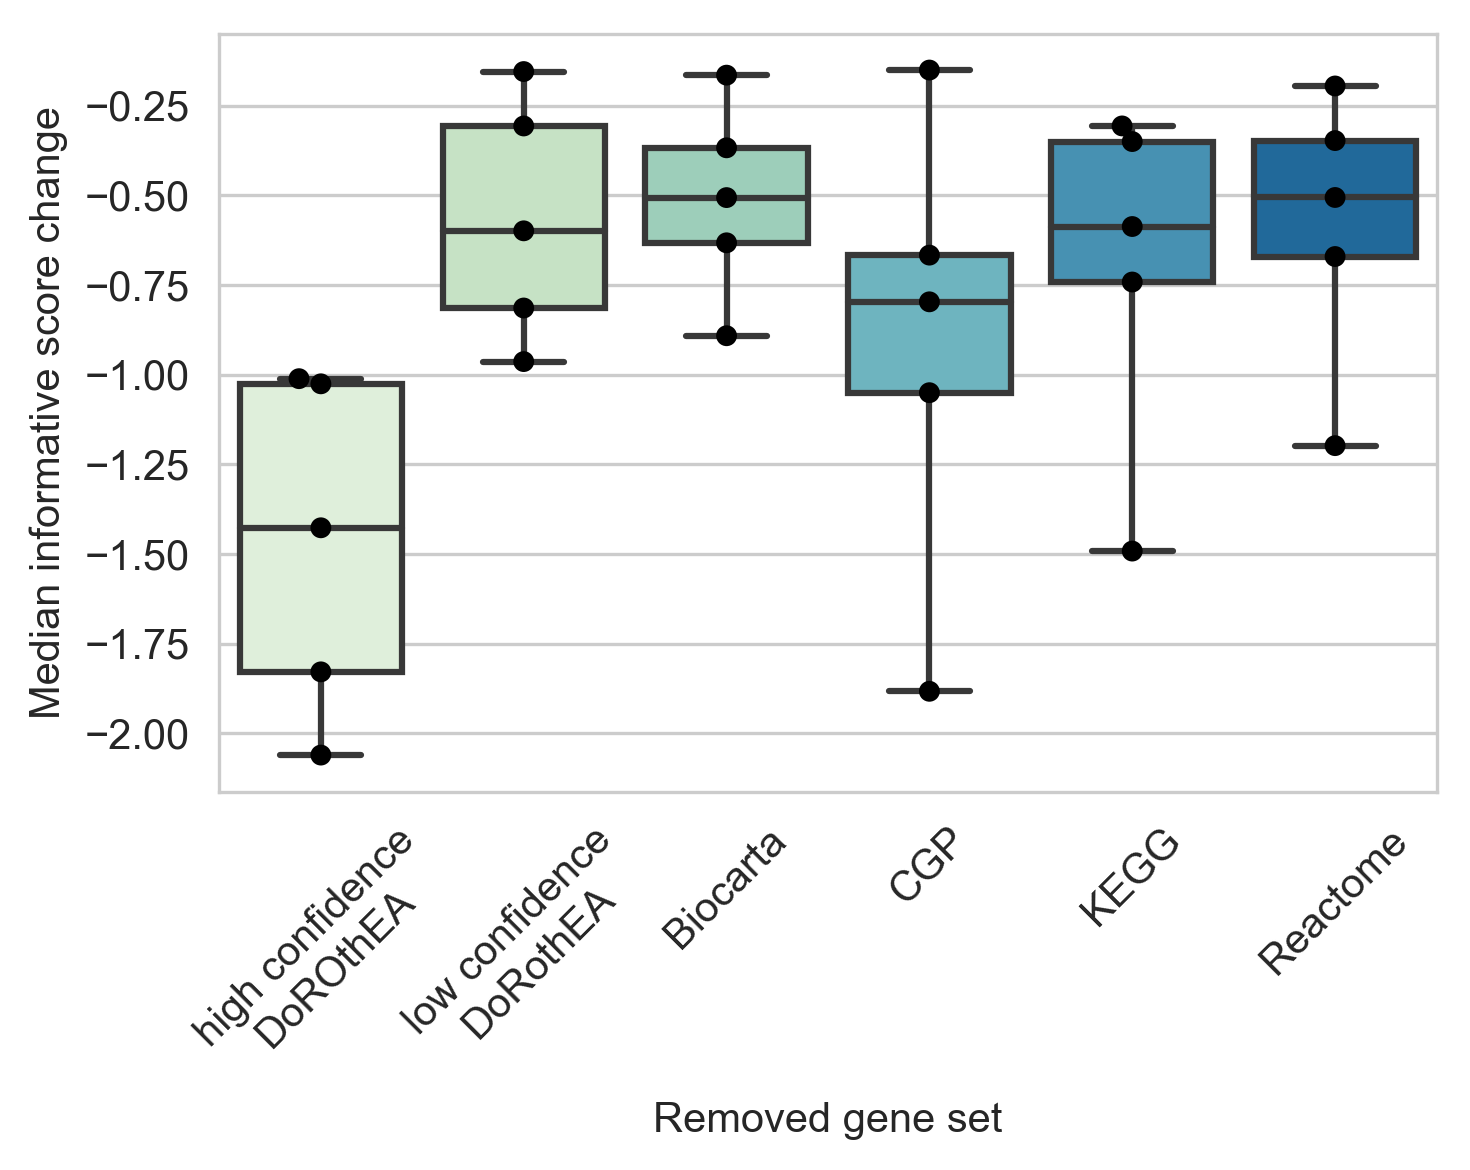

In [207]:
plot_median_info_score2(bname='progeny',atype='_abs',plotname='Fig5C')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


               df       sum_sq     mean_sq         F    PR(>F)
Set2          5.0  1218.933401  243.786680  1.681533  0.179085
Data_driven   1.0   328.828379  328.828379  2.268114  0.145672
Residual     23.0  3334.512242  144.978793       NaN       NaN

Intercept                   0.141311
Set1[T.BEST_dorothea_CD]    0.007706
Set1[T.BIOCARTA]            0.000356
Set1[T.CGP]                 0.798596
Set1[T.KEGG]                0.402456
Set1[T.REACTOME]            0.292273
dtype: float64


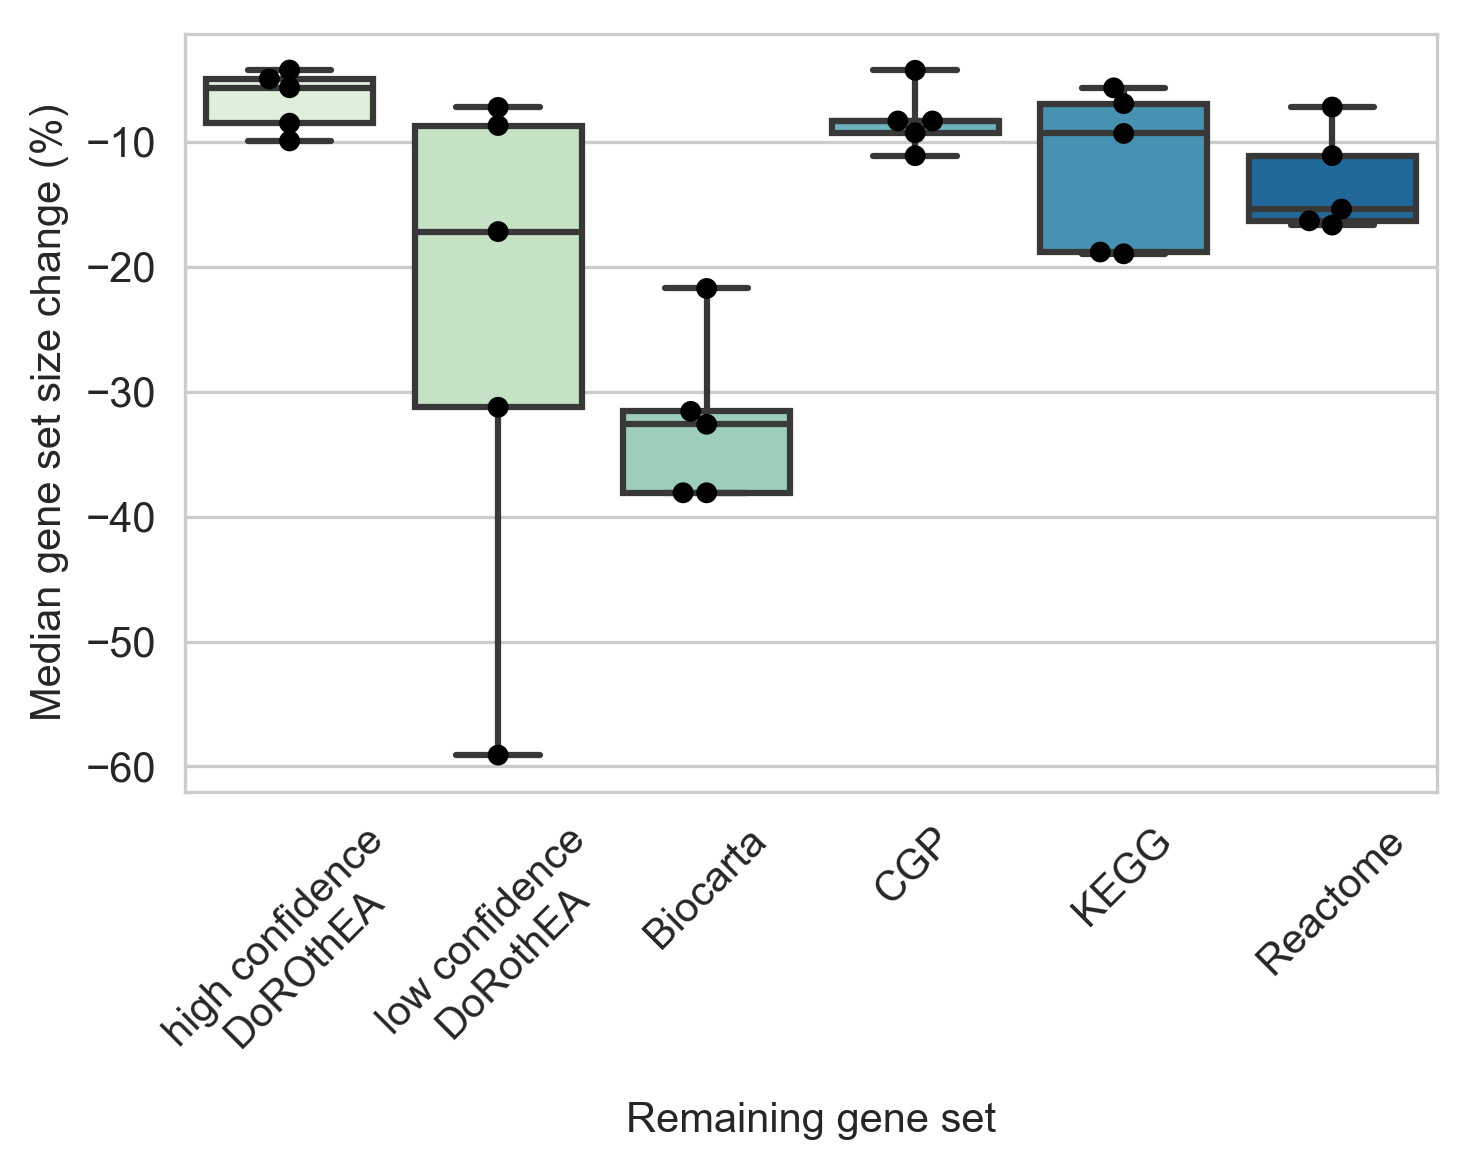

In [208]:
plot_median_info_size1(bname='progeny',atype='_abs',plotname='SFig7A')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


               df       sum_sq     mean_sq         F    PR(>F)
Set1          5.0  2577.093588  515.418718  5.365128  0.002061
Data_driven   1.0    95.609384   95.609384  0.995223  0.328850
Residual     23.0  2209.571049   96.068306       NaN       NaN

Intercept                   0.000581
Set2[T.BEST_dorothea_CD]    0.265468
Set2[T.BIOCARTA]            0.089438
Set2[T.CGP]                 0.153487
Set2[T.KEGG]                0.621202
Set2[T.REACTOME]            0.596486
dtype: float64


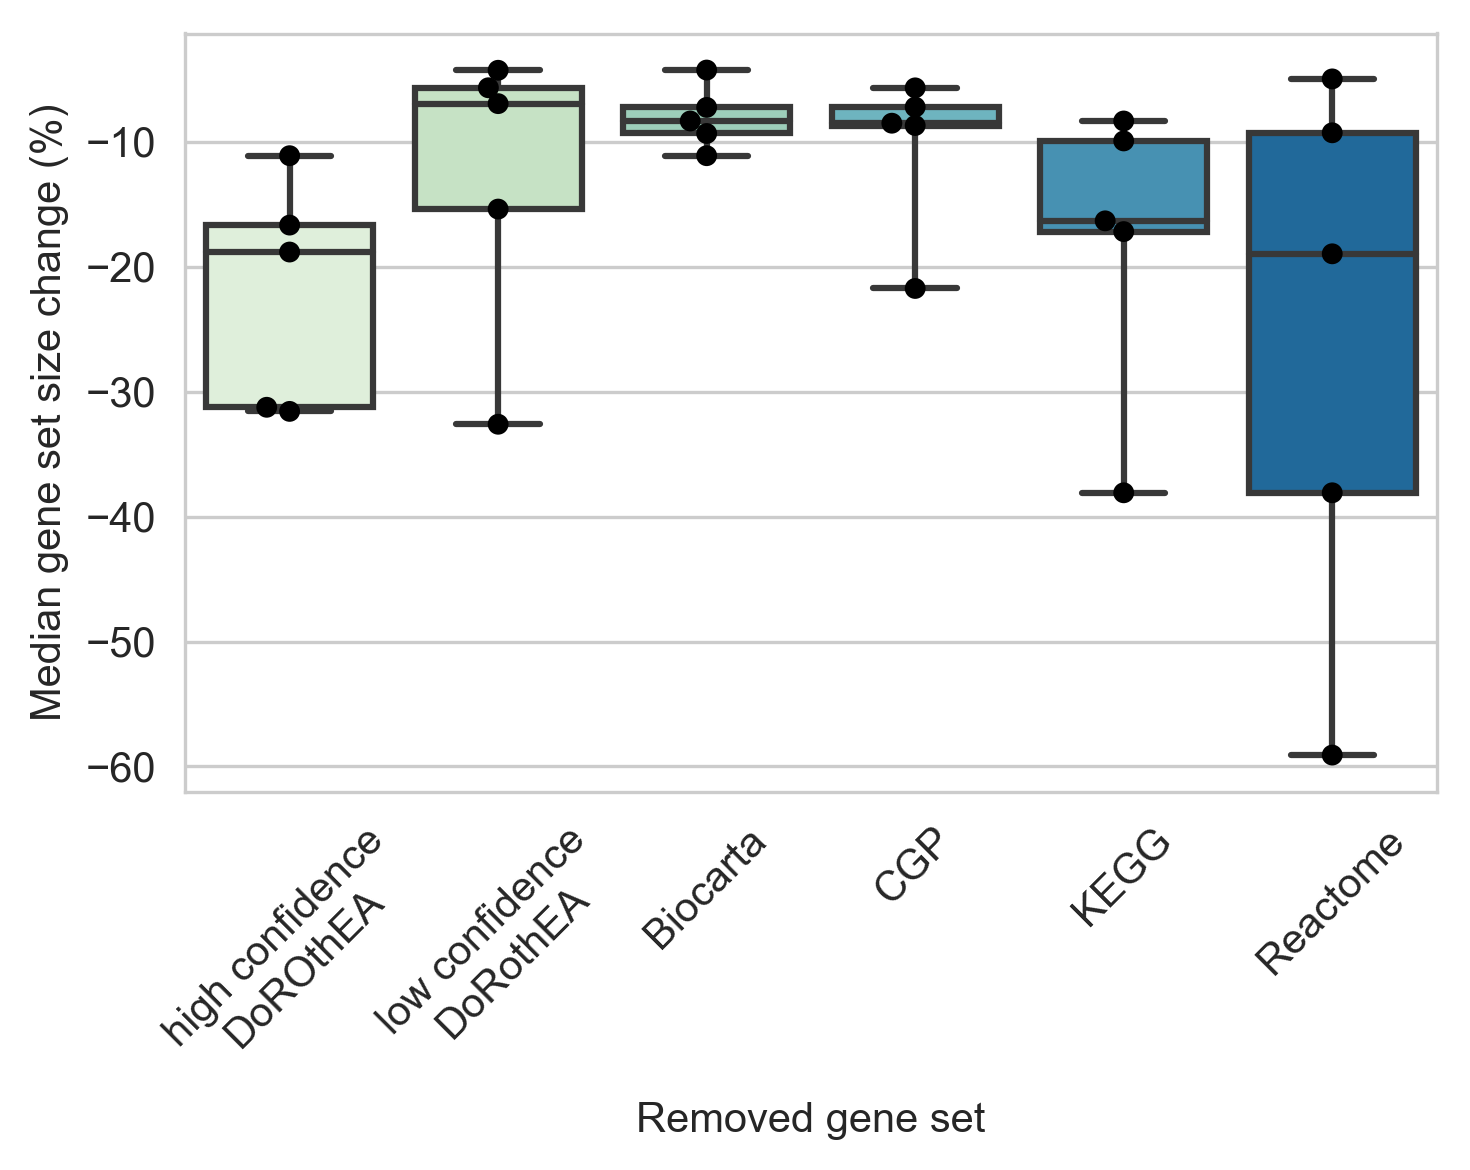

In [209]:
plot_median_info_size2(bname='progeny',atype='_abs',plotname='SFig7B')

               df   sum_sq   mean_sq         F    PR(>F)
Set2          5.0  0.59721  0.119442  0.743757  0.598772
Data_driven   1.0  0.08694  0.086940  0.541367  0.469304
Residual     23.0  3.69363  0.160593       NaN       NaN

Intercept                   0.036468
Set1[T.BEST_dorothea_CD]    0.025992
Set1[T.BIOCARTA]            0.056510
Set1[T.CGP]                 0.574440
Set1[T.KEGG]                0.592986
Set1[T.REACTOME]            0.467138
dtype: float64


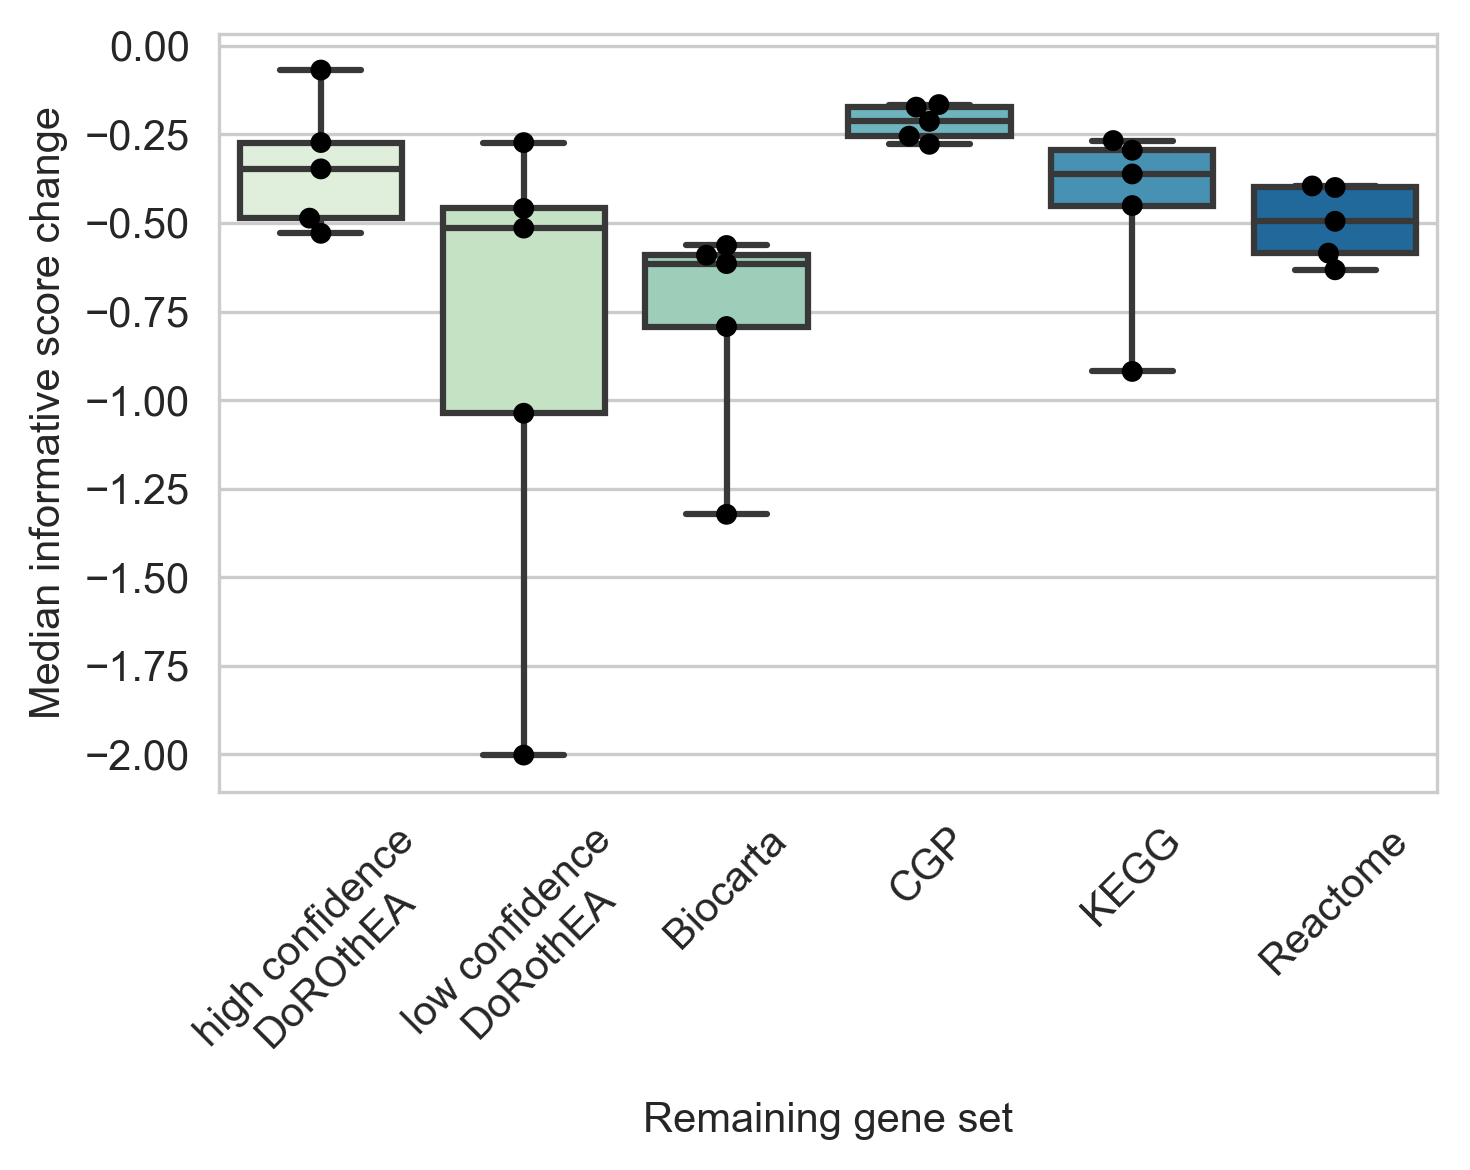

In [212]:
plot_median_info_score1(bname='gdsc',atype='_abs',plotname='SFig8A')

               df    sum_sq   mean_sq         F    PR(>F)
Set1          5.0  1.537419  0.307484  2.490861  0.060753
Data_driven   1.0  0.001131  0.001131  0.009166  0.924558
Residual     23.0  2.839229  0.123445       NaN       NaN

Intercept                   0.013146
Set2[T.BEST_dorothea_CD]    0.366085
Set2[T.BIOCARTA]            0.557939
Set2[T.CGP]                 0.791422
Set2[T.KEGG]                0.379066
Set2[T.REACTOME]            0.813116
dtype: float64


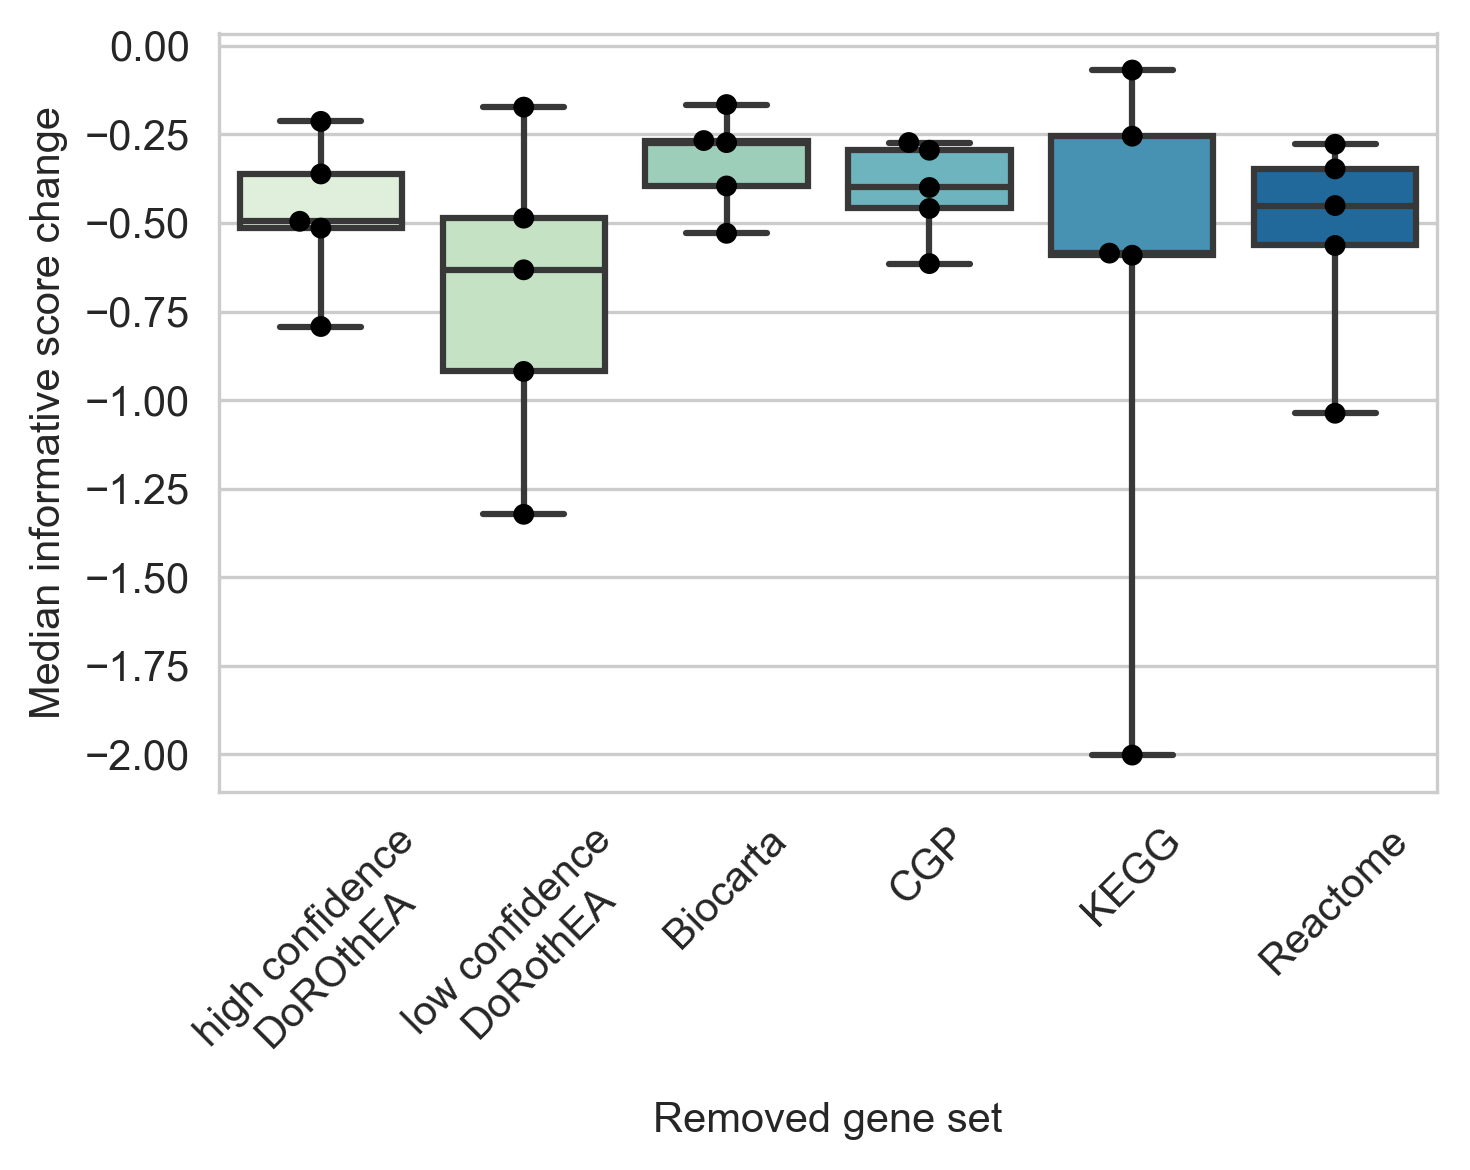

In [213]:
plot_median_info_score2(bname='gdsc',atype='_abs',plotname='SFig8B')

               df     sum_sq   mean_sq         F    PR(>F)
Set2          5.0   2.138434  0.427687  0.559944  0.729473
Data_driven   1.0   4.858741  4.858741  6.361249  0.019039
Residual     23.0  17.567466  0.763803       NaN       NaN

Intercept                   5.122270e-02
Set1[T.BEST_dorothea_CD]    5.806329e-01
Set1[T.BIOCARTA]            1.459799e-08
Set1[T.CGP]                 4.643388e-01
Set1[T.KEGG]                3.686726e-01
Set1[T.REACTOME]            3.211692e-01
dtype: float64


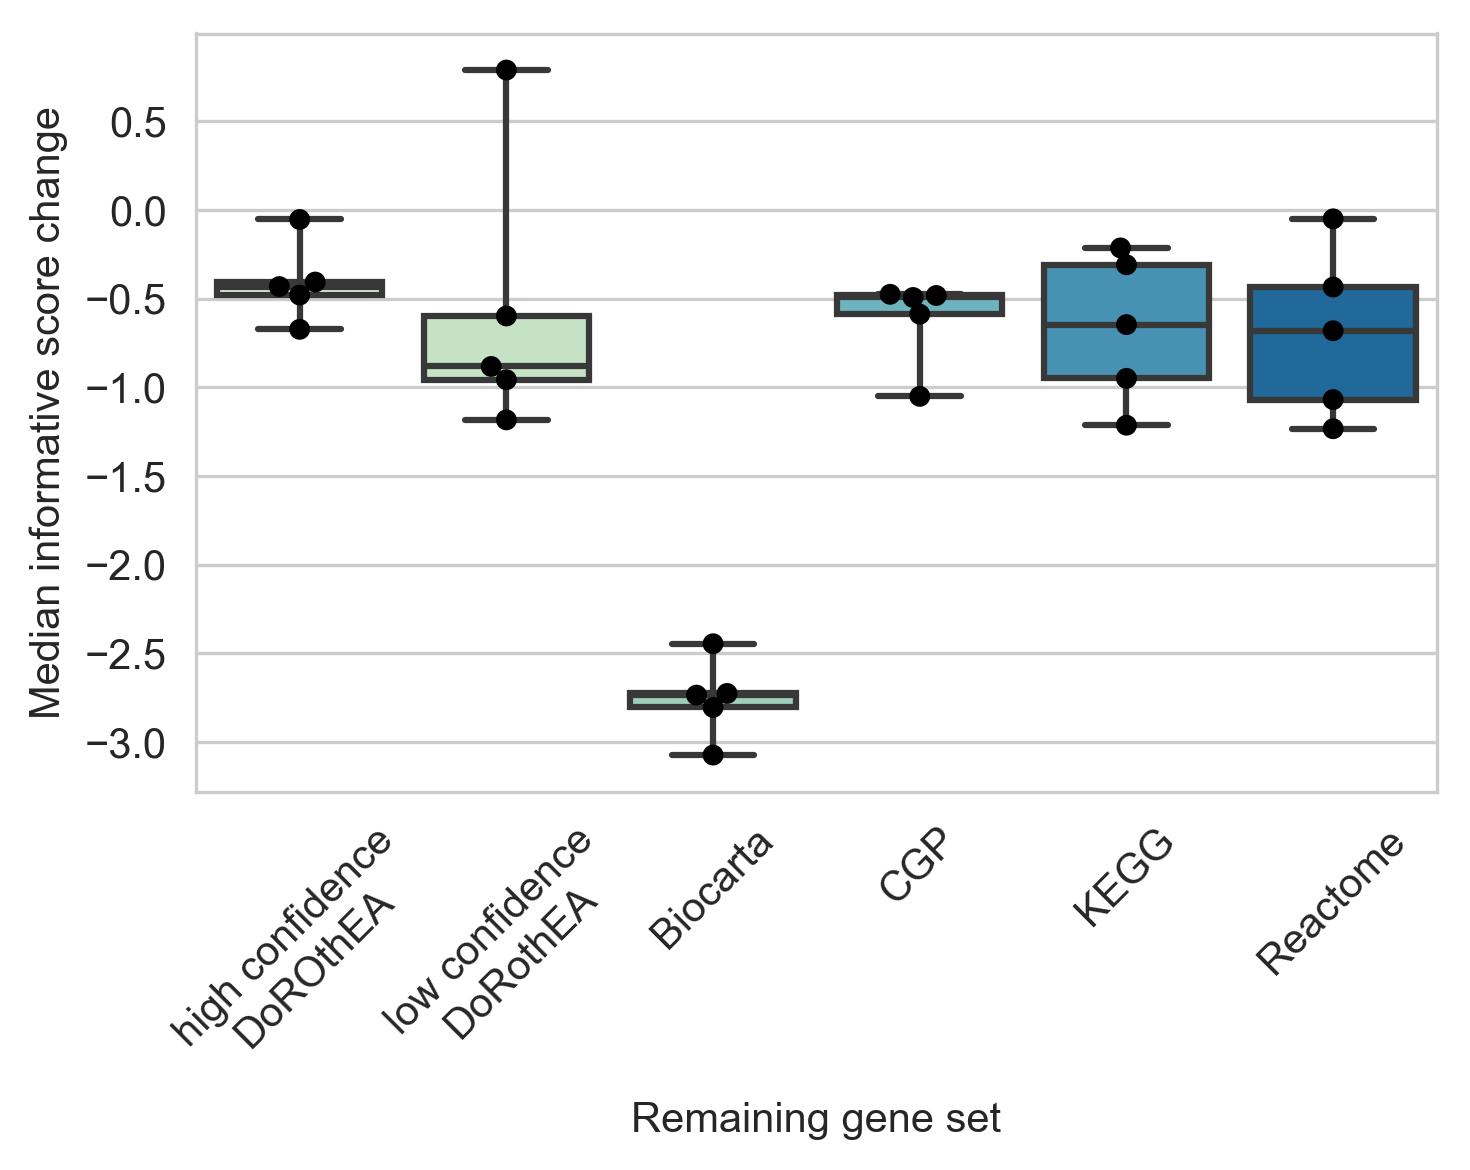

In [214]:
plot_median_info_score1(bname='progeny',atype='',plotname='SFig8C')

               df     sum_sq   mean_sq          F        PR(>F)
Set1          5.0  19.819582  3.963916  19.512600  1.363498e-07
Data_driven   1.0   0.072690  0.072690   0.357822  5.555636e-01
Residual     23.0   4.672369  0.203146        NaN           NaN

Intercept                   0.002954
Set2[T.BEST_dorothea_CD]    0.305350
Set2[T.BIOCARTA]            0.341122
Set2[T.CGP]                 0.519799
Set2[T.KEGG]                0.537364
Set2[T.REACTOME]            0.173451
dtype: float64


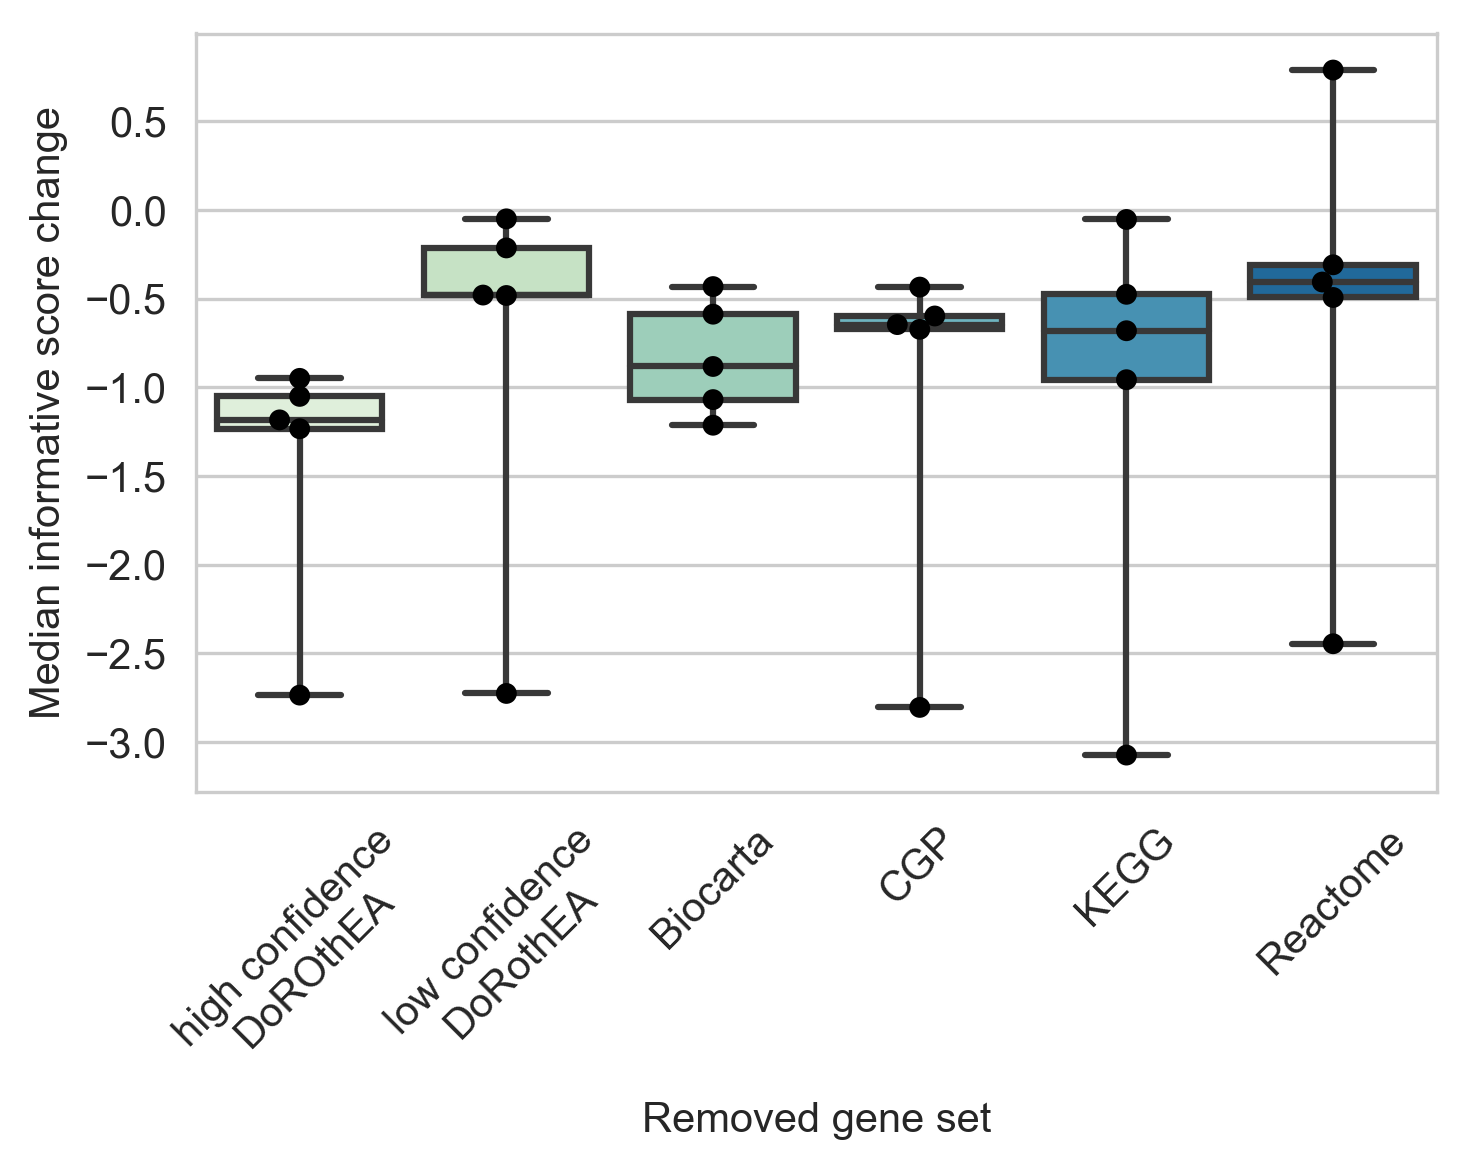

In [215]:
plot_median_info_score2(bname='progeny',atype='',plotname='SFig8D')

               df    sum_sq   mean_sq         F    PR(>F)
Set2          5.0  0.067621  0.013524  0.248643  0.936211
Data_driven   1.0  0.170756  0.170756  3.139343  0.089674
Residual     23.0  1.251026  0.054392       NaN       NaN

Intercept                   0.015328
Set1[T.BEST_dorothea_CD]    0.782510
Set1[T.BIOCARTA]            0.005908
Set1[T.CGP]                 0.354555
Set1[T.KEGG]                0.553957
Set1[T.REACTOME]            0.941104
dtype: float64


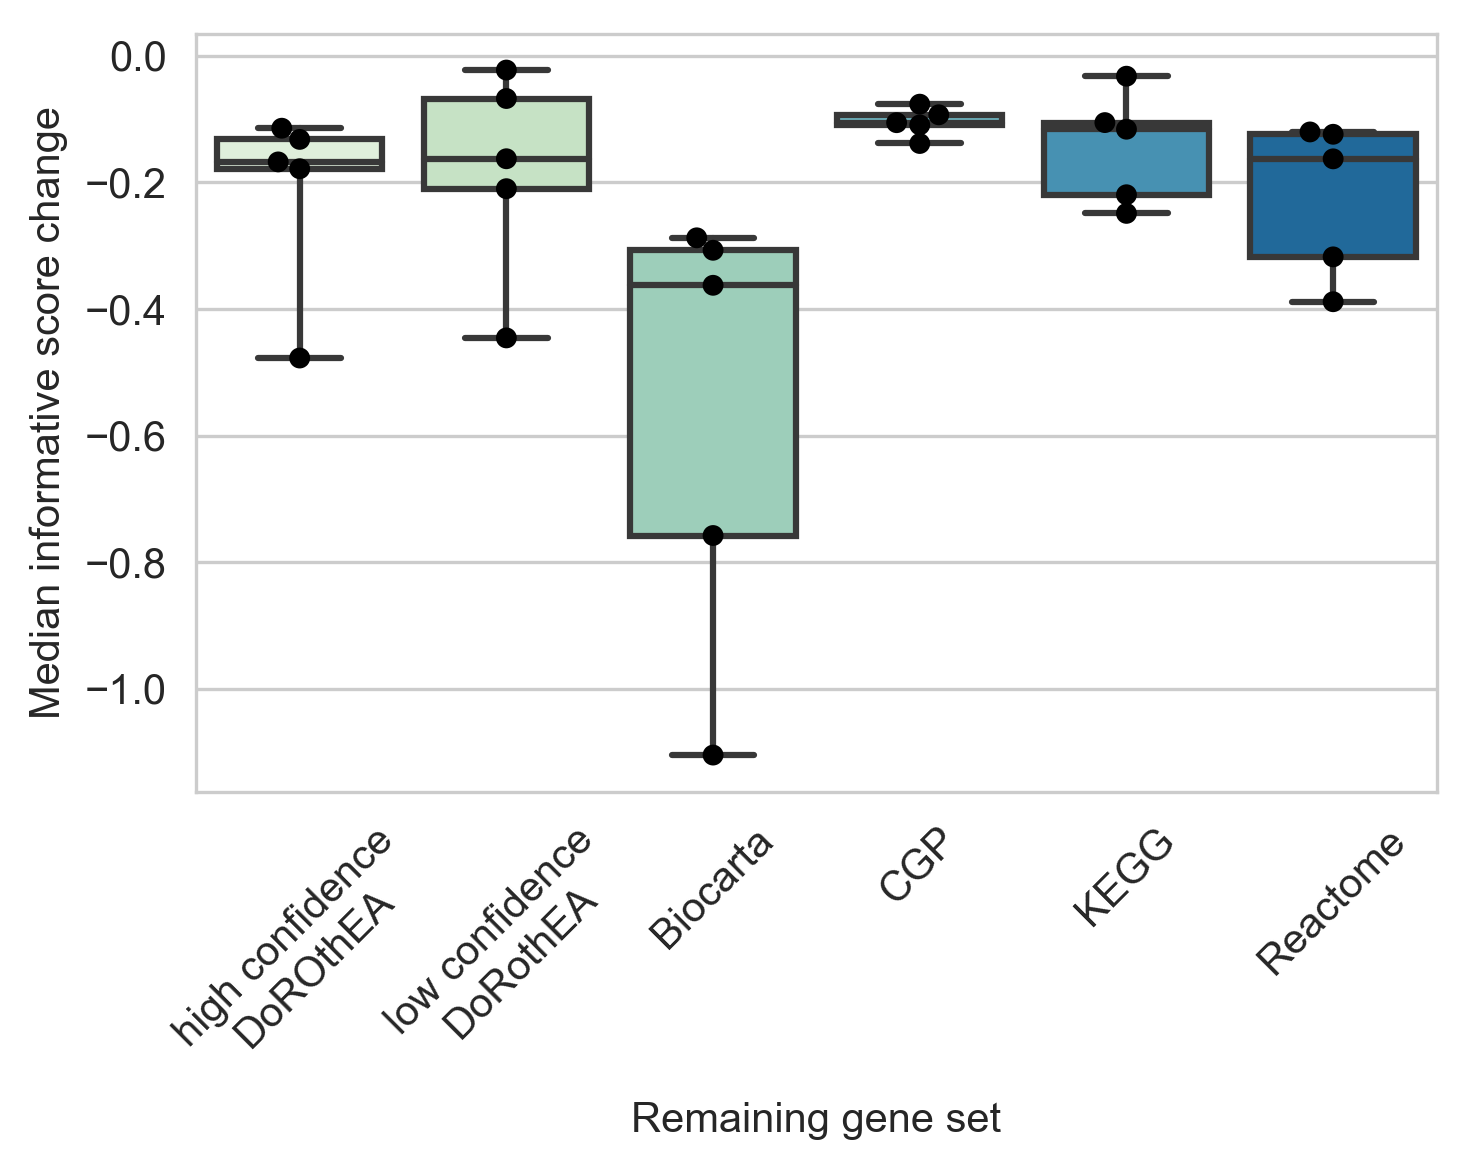

In [216]:
plot_median_info_score1(bname='gdsc',atype='',plotname='SFig8E')

               df    sum_sq   mean_sq        F    PR(>F)
Set1          5.0  0.683954  0.136791  4.00283  0.009281
Data_driven   1.0  0.019459  0.019459  0.56943  0.458143
Residual     23.0  0.785991  0.034174      NaN       NaN

Intercept                   0.043626
Set2[T.BEST_dorothea_CD]    0.680116
Set2[T.BIOCARTA]            0.874058
Set2[T.CGP]                 0.625008
Set2[T.KEGG]                0.743128
Set2[T.REACTOME]            0.871232
dtype: float64


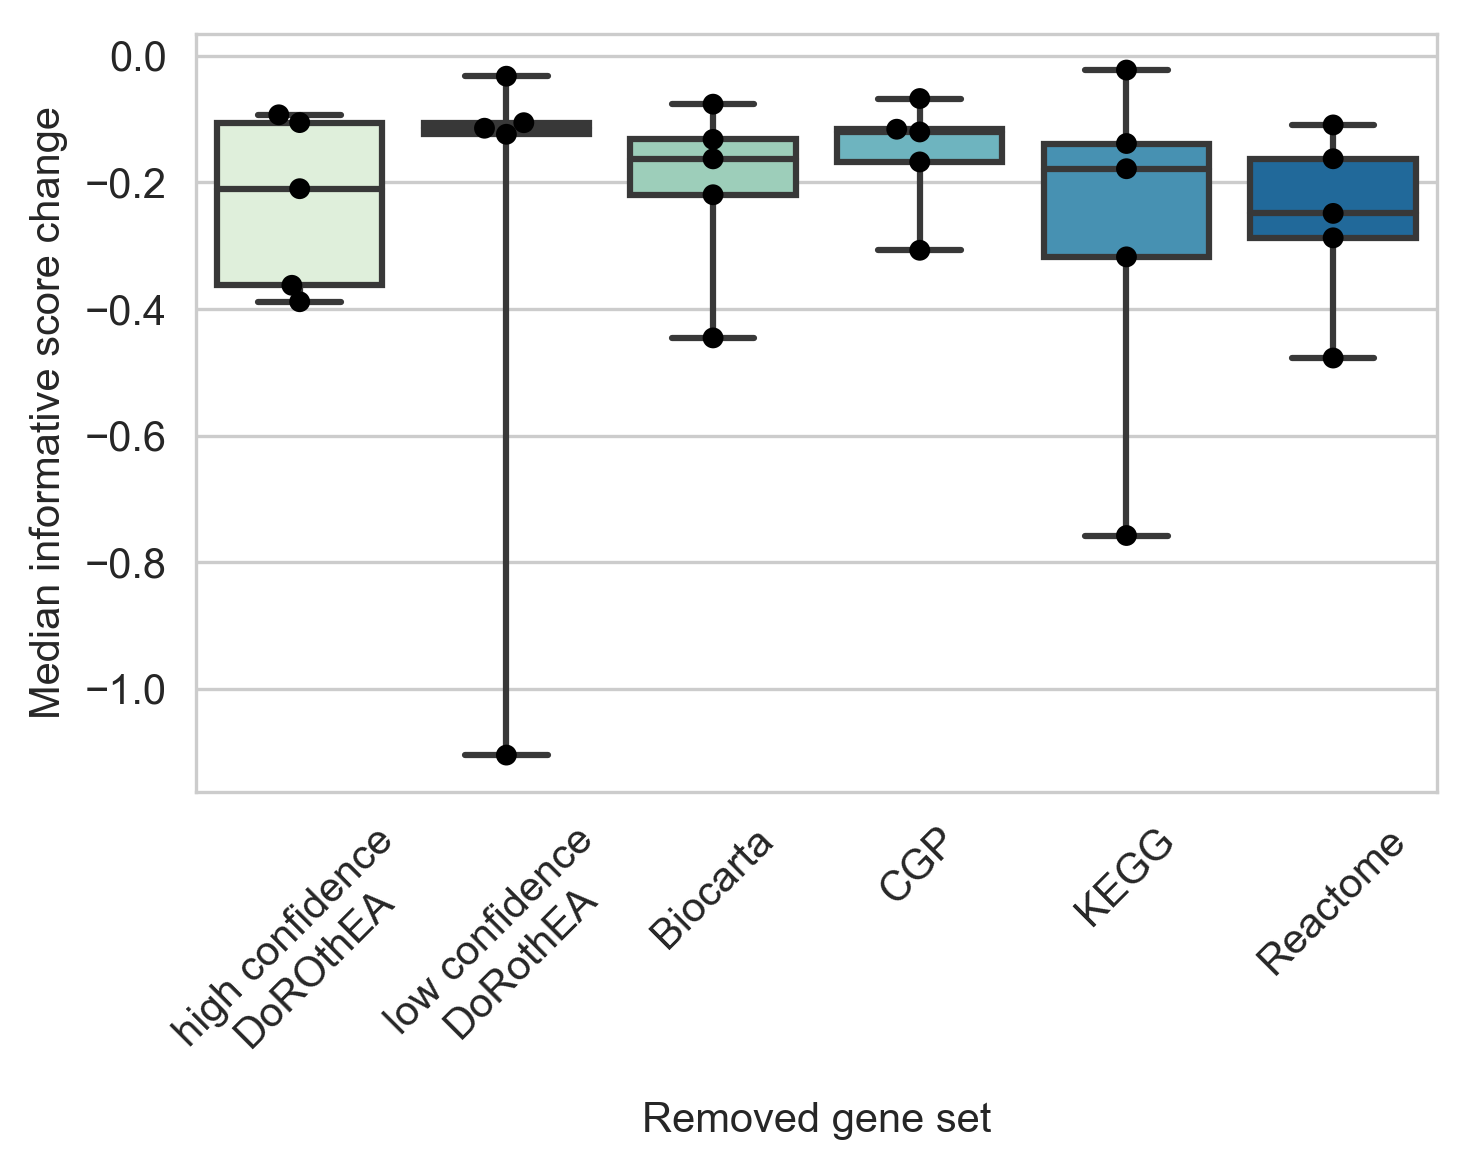

In [217]:
plot_median_info_score2(bname='gdsc',atype='',plotname='SFig8F')

In [229]:
def calc_everything(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs'):
    good1=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname1,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname2,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname1,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname2,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
    
    row_index=pd.Series(range(len(score_overlap.index)),index=score_overlap.index)
    col_index=pd.Series(range(len(score_overlap.columns)),index=score_overlap.columns)
    score_overlap=score_overlap.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_1minus2.index)),index=score_1minus2.index)
    col_index=pd.Series(range(len(score_1minus2.columns)),index=score_1minus2.columns)
    score_1minus2=score_1minus2.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_2minus1.index)),index=score_2minus1.index)
    col_index=pd.Series(range(len(score_2minus1.columns)),index=score_2minus1.columns)
    score_2minus1=score_2minus1.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score1.index)),index=score1.index)
    col_index=pd.Series(range(len(score1.columns)),index=score1.columns)
    score1=score1.values[list(row_index[goods['Group']].values),list(col_index[goods[dname1]].values)]

    row_index=pd.Series(range(len(score2.index)),index=score2.index)
    col_index=pd.Series(range(len(score2.columns)),index=score2.columns)
    score2=score2.values[list(row_index[goods['Group']].values),list(col_index[goods[dname2]].values)]
    results=pd.DataFrame(index=range(len(score_overlap)))
    
    results[dname1]=score1
    results[dname2]=score2
    results[dname1+' & '+dname2]=score_overlap
    results[dname1+' - '+dname2]=score_1minus2
    results[dname2+' - '+dname1]=score_2minus1
    
    geneset1=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname1,sep=',',header=0,index_col=0)
    geneset2=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname2,sep=',',header=0,index_col=0)
    if dname1 < dname2:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname1,dname2),
                                   sep=',',header=0,index_col=0)
    else:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname2,dname1),
                                   sep=',',header=0,index_col=0)
    geneset_1minus2=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname1,dname2),
                                sep=',',header=0,index_col=0)
    geneset_2minus1=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname2,dname1),
                                sep=',',header=0,index_col=0)
    geneset1=geneset1['Set'].value_counts()
    geneset2=geneset2['Set'].value_counts()
    geneset_overlap=geneset_overlap['Set'].value_counts()
    geneset_1minus2=geneset_1minus2['Set'].value_counts()
    geneset_2minus1=geneset_2minus1['Set'].value_counts()
    geneset1=geneset1[goods[dname1]].values
    geneset2=geneset2[goods[dname2]].values
    geneset_overlap=geneset_overlap[goods['Name']].values
   
    geneset_1minus2=geneset_1minus2[goods['Name']].values
    geneset_2minus1=geneset_2minus1[goods['Name']].values
    results_genesets=pd.DataFrame(index=range(len(geneset_overlap)))
    
    results_genesets[dname1]=geneset1
    results_genesets[dname2]=geneset2
    results_genesets[dname1+' & '+dname2]=geneset_overlap
    results_genesets[dname1+' - '+dname2]=geneset_1minus2
    results_genesets[dname2+' - '+dname1]=geneset_2minus1
    
    score1= results[dname1+' - '+dname2] 
    score2= results[dname2+' - '+dname1]
    
    size1= results_genesets[dname1]
    size2= results_genesets[dname2]
    
    return score1,score2,size1,size2

In [266]:
results=pd.DataFrame(columns=['Remaining','Removed','Score','Size_orig','Size_rem'])
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
for dname1 in datasets:
    for dname2 in datasets:
        print(dname1,dname2)
        if dname1<dname2:
            score1,score2,size1,size2=calc_everything(dname1,dname2,bname='gdsc',atype='_abs')
            results1=pd.DataFrame(index=range(len(score1)))
            results1['Remaining']=dname1
            results1['Removed']=dname2
            results1['Score']=score1
            results1['Size_orig']=size1
            results1['Size_rem']=size2

            results2=pd.DataFrame(index=range(len(score2)))
            results2['Remaining']=dname2
            results2['Removed']=dname1
            results2['Score']=score2
            results2['Size_orig']=size2
            results2['Size_rem']=size1

            results=pd.concat([results,results1,results2])

BEST_dorothea_AB BEST_dorothea_AB
BEST_dorothea_AB BEST_dorothea_CD
BEST_dorothea_AB KEGG
BEST_dorothea_AB BIOCARTA
BEST_dorothea_AB REACTOME
BEST_dorothea_AB CGP
BEST_dorothea_CD BEST_dorothea_AB
BEST_dorothea_CD BEST_dorothea_CD
BEST_dorothea_CD KEGG
BEST_dorothea_CD BIOCARTA
BEST_dorothea_CD REACTOME
BEST_dorothea_CD CGP
KEGG BEST_dorothea_AB
KEGG BEST_dorothea_CD
KEGG KEGG
KEGG BIOCARTA
KEGG REACTOME
KEGG CGP
BIOCARTA BEST_dorothea_AB
BIOCARTA BEST_dorothea_CD
BIOCARTA KEGG
BIOCARTA BIOCARTA
BIOCARTA REACTOME
BIOCARTA CGP
REACTOME BEST_dorothea_AB
REACTOME BEST_dorothea_CD
REACTOME KEGG
REACTOME BIOCARTA
REACTOME REACTOME
REACTOME CGP
CGP BEST_dorothea_AB
CGP BEST_dorothea_CD
CGP KEGG


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


CGP BIOCARTA
CGP REACTOME
CGP CGP


In [267]:
results['Size_orig']=results['Size_orig'].astype(float)
results['Size_rem']=results['Size_rem'].astype(float)

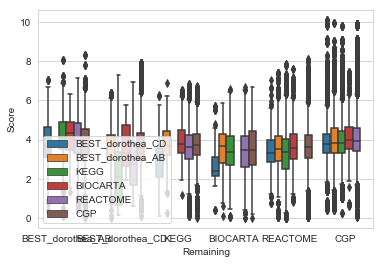

In [268]:
sns.boxplot(hue='Removed',y='Score',x='Remaining',data=results)
plt.legend()

In [269]:
model=ols('Score ~ Remaining + Removed + Size_rem + Size_orig',data=results).fit()

In [271]:
model.params

Intercept                        3.447681
Remaining[T.BEST_dorothea_CD]   -0.301254
Remaining[T.BIOCARTA]           -0.176412
Remaining[T.CGP]                 0.163874
Remaining[T.KEGG]               -0.259068
Remaining[T.REACTOME]           -0.316537
Removed[T.BEST_dorothea_CD]     -0.224650
Removed[T.BIOCARTA]              0.269202
Removed[T.CGP]                   0.140494
Removed[T.KEGG]                 -0.128493
Removed[T.REACTOME]              0.049427
Size_rem                         0.000537
Size_orig                        0.003357
dtype: float64

In [259]:
pcor(results['Size_orig'],results['Score'])

(0.1934713862064652, 1.9712576926410307e-212)

In [76]:
results1=pd.DataFrame(index=range(len(score1)))
results1['From']='BEST_dorothea_AB'
results1['To']='BIOCARTA'
results1['Score']=score1
results1['Size']=size1

results2=pd.DataFrame(index=range(len(score2)))
results2['From']='BIOCARTA'
results2['To']='BEST_dorothea_AB'
results2['Score']=score2
results2['Size']=size2

results=pd.concat([results1,results2])

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


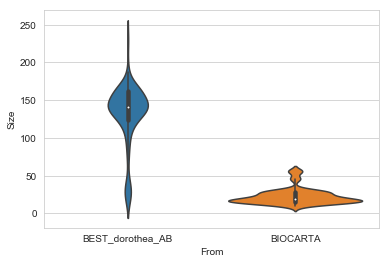

In [80]:
sns.violinplot(y='Size',x='From',data=results)

In [81]:
model=ols('Score ~ From + Size',data=results).fit()

In [83]:
model.pvalues

Intercept           7.244722e-03
From[T.BIOCARTA]    3.707807e-11
Size                1.659241e-01
dtype: float64